# Открываем и смотрим

In [83]:
import pandas as pd
from dython.nominal import associations
import tqdm
import pandas as pd
import numpy as np
import os
import pickle 
from pickle import dump
from xgboost import DMatrix
from lightgbm import Dataset
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from runALLGB import Booster
from runALLGB import LgbBooster
from runALLGB import CatBooster
from sklearn.datasets import make_classification

In [32]:
df = pd.read_csv('data_classification_train.csv')
test_df =  pd.read_csv('data_classification_test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115386 entries, 0 to 115385
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          115386 non-null  int64  
 1   is_fraud                115386 non-null  int64  
 2   transaction_date_int    115386 non-null  int64  
 3   transaction_amount      115386 non-null  float64
 4   product_type            115386 non-null  object 
 5   pay_system              115253 non-null  object 
 6   card_type               115258 non-null  object 
 7   purchaser_email_domain  104625 non-null  object 
 8   recipient_email_domain  104979 non-null  object 
 9   system_version          61974 non-null   object 
 10  browser_type            112218 non-null  object 
 11  screen_params           58543 non-null   object 
 12  device_type             112651 non-null  object 
 13  device_info             94887 non-null   object 
dtypes: float64(1), int64

In [5]:
df.head()

,transaction_id,is_fraud,transaction_date_int,transaction_amount,product_type,pay_system,card_type,purchaser_email_domain,recipient_email_domain,system_version,browser_type,screen_params,device_type,device_info
0,3353799,0,9124771,25.000,S,mastercard,debit,NaN,NaN,Android,chrome 63.0,2560x1440,mobile,NaN
1,3377766,0,9817339,50.000,R,mastercard,debit,gmail.com,gmail.com,Windows 8.1,ie 11.0 for desktop,1920x1080,desktop,Trident/7.0
2,3515620,0,13904033,230.181,C,mastercard,credit,gmail.com,gmail.com,NaN,ie 11.0 for desktop,NaN,desktop,Trident/7.0
3,3486268,0,13098338,300.000,R,visa,credit,anonymous.com,anonymous.com,NaN,chrome 65.0,NaN,desktop,Windows
4,3100104,0,2211510,100.000,R,visa,credit,icloud.com,mac.com,Mac OS X 10_13_2,safari generic,2560x1600,desktop,MacOS


In [6]:
df['is_fraud'].value_counts()

0    106332
1      9054
Name: is_fraud, dtype: int64

In [7]:
df[df['is_fraud']==1].sample(10)

,transaction_id,is_fraud,transaction_date_int,transaction_amount,product_type,pay_system,card_type,purchaser_email_domain,recipient_email_domain,system_version,browser_type,screen_params,device_type,device_info
107129,2991863,1,170239,103.197,C,mastercard,debit,hotmail.com,hotmail.com,NaN,chrome 61.0,NaN,desktop,Windows
42598,3085538,1,1986491,150.000,H,visa,credit,msn.com,anonymous.com,Windows 10,chrome 63.0,1366x768,desktop,Windows
41165,3542177,1,14673917,26.129,C,mastercard,debit,hotmail.com,hotmail.com,NaN,chrome 66.0 for android,NaN,mobile,SM-G955F Build/R16NW
63981,3114468,1,2525719,72.875,C,visa,debit,gmail.com,gmail.com,NaN,chrome 63.0,NaN,desktop,Windows
71309,3312878,1,8032117,9.063,C,mastercard,credit,yahoo.com,yahoo.com,NaN,chrome 64.0 for android,NaN,mobile,Lenovo PB2-650Y Build/MRA58K
96857,3347222,1,8933428,44.227,C,mastercard,credit,outlook.com,outlook.com,NaN,chrome 64.0 for android,NaN,mobile,SM-J500M Build/LMY48B
108012,3127553,1,2884570,40.000,H,visa,debit,anonymous.com,mail.com,Windows 10,firefox 57.0,1366x768,desktop,Windows
98183,3018556,1,777057,13.759,C,visa,debit,NaN,NaN,NaN,chrome 62.0 for android,NaN,mobile,E5506 Build/29.1.A.0.101
19781,3307928,1,7978510,32.023,C,visa,debit,gmail.com,gmail.com,NaN,chrome 64.0,NaN,desktop,Windows
65631,3012962,1,669423,79.029,C,visa,debit,hotmail.com,hotmail.com,NaN,chrome 62.0,NaN,desktop,Windows


<AxesSubplot:>

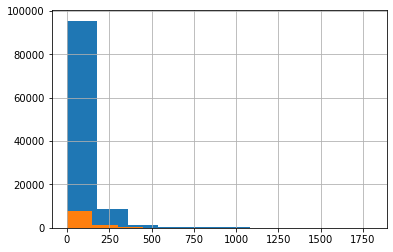

In [15]:
df[df['is_fraud']==0]['transaction_amount'].hist()
df[df['is_fraud']==1]['transaction_amount'].hist()

<AxesSubplot:>

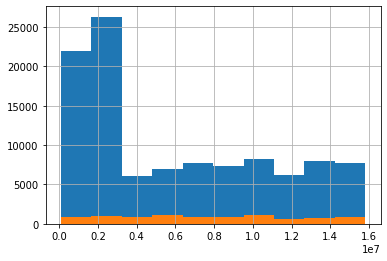

In [16]:
df[df['is_fraud']==0]['transaction_date_int'].hist()
df[df['is_fraud']==1]['transaction_date_int'].hist()

In [17]:
df['transaction_date_int'].min() #86506
df['transaction_date_int'].max() #15811030

86506

<AxesSubplot:>

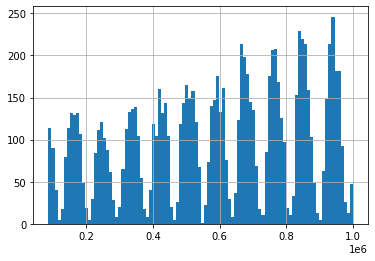

In [29]:
df[(df['transaction_date_int'] > 85000) &(df['transaction_date_int'] < 1000000)]['transaction_date_int'].hist(bins=100)

#±100 000 = 1 день
#значит это секунды с какого-то момента

<AxesSubplot:>

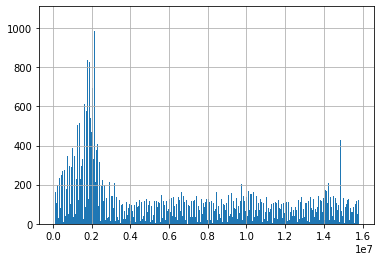

In [31]:
df['transaction_date_int'].hist(bins=1000)

##  Создаем дополнительные признаки

In [ ]:
# amount is round?
#категория час
#категория день
#категория неделя
#категория месяц
# заказов за последнее н времени?
# был ли идентичный заказ

In [37]:
all_data = pd.concat([df,test_df], ignore_index = True)

In [58]:
all_data['hour'] = ((all_data['transaction_date_int']/(60*60) )%24).round()
all_data['week_day'] = ((all_data['transaction_date_int']/(60*60)*24 )%7).round()
all_data['month_day'] = ((all_data['transaction_date_int']/(60*60)*24 )%30).round()#в месяце будет 30 дней
all_data['month'] = ((all_data['transaction_date_int']/((60*60)*24)*30)%12).round()

In [68]:
hourly =[]
ten_min =[]
thirty_min =[]
two_hour =[]
five_hour =[]
#shitcoding:)

for time in all_data['transaction_date_int']:
    hour = len(all_data[(all_data['transaction_date_int']<time)&(all_data['transaction_date_int']>time - 60*60)])
    hourly.append(hour)
    
    ten = len(all_data[(all_data['transaction_date_int']<time)&(all_data['transaction_date_int']>time - 60*10)])
    ten_min.append(ten)
    
    thir = len(all_data[(all_data['transaction_date_int']<time)&(all_data['transaction_date_int']>time - 60*30)])
    thirty_min.append(thir)
    
    two_h =  len(all_data[(all_data['transaction_date_int']<time)&(all_data['transaction_date_int']>time - 60*120)])
    two_hour.append(two_h)
    
    five_h = len(all_data[(all_data['transaction_date_int']<time)&(all_data['transaction_date_int']>time - 60*300)])
    five_hour.append(five_h)


In [69]:
all_data['is_round'] =all_data['transaction_amount'].apply(lambda x: 1 if round(x)==x else 0)

In [71]:
all_data['hourly_n'] = hourly
all_data['ten_min_n'] = ten_min
all_data['thirty_min_n'] = thirty_min
all_data['two_hour_n'] = two_hour
all_data['five_hour_n'] = five_hour

In [73]:
all_data.columns

Index(['transaction_id', 'is_fraud', 'transaction_date_int',
       'transaction_amount', 'product_type', 'pay_system', 'card_type',
       'purchaser_email_domain', 'recipient_email_domain', 'system_version',
       'browser_type', 'screen_params', 'device_type', 'device_info', 'hour',
       'month_day', 'week_day', 'month', 'is_round', 'hourly_n', 'ten_min_n',
       'thirty_min_n', 'two_hour_n', 'five_hour_n'],
      dtype='object')

In [74]:
num_features = ['transaction_date_int','transaction_amount','hourly_n','ten_min_n',
       'thirty_min_n', 'two_hour_n', 'five_hour_n']

cat_features = ['product_type', 'pay_system', 'card_type',
       'purchaser_email_domain', 'recipient_email_domain', 'system_version',
       'browser_type', 'screen_params', 'device_type', 'device_info', 'hour',
       'month_day', 'week_day', 'month', 'is_round']

In [78]:
for col in cat_features:
    all_data[col]=all_data[col].astype(str)

/home/jupyteruser/.local/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


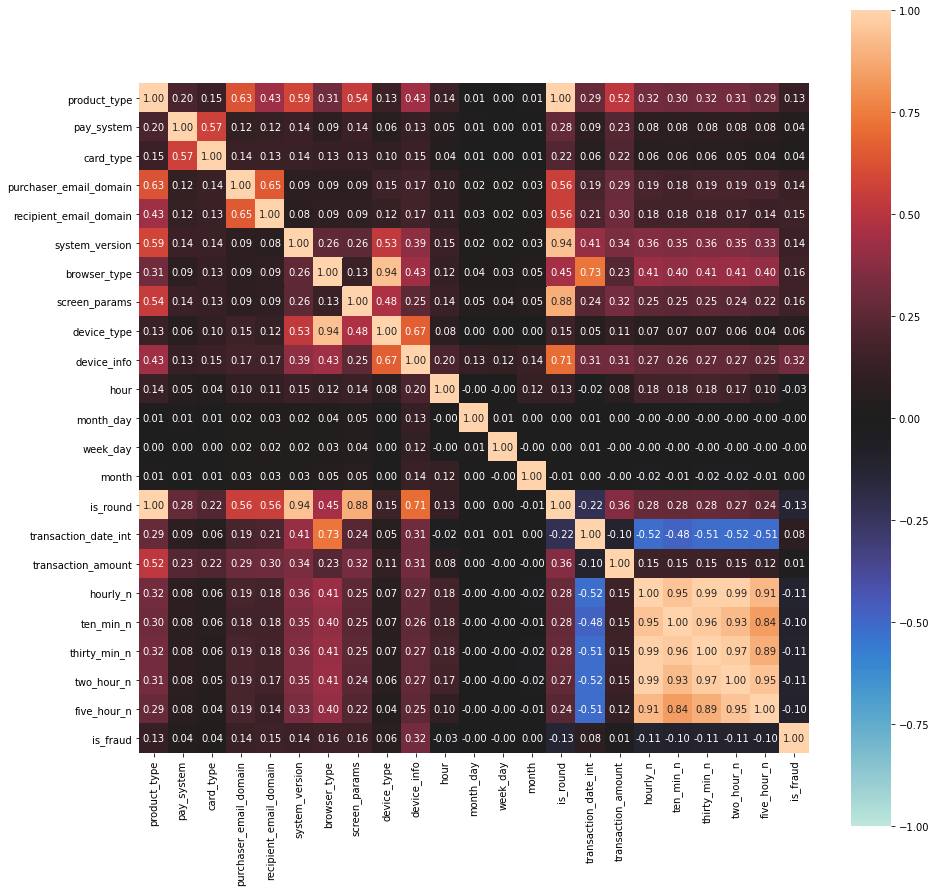

In [77]:
associations(all_data[cat_features+num_features+['is_fraud']], figsize=(15, 15))
None

## Предсказываем

In [81]:
train_df = all_data[~all_data['is_fraud'].isna()]
test = all_data[all_data['is_fraud'].isna()]

In [84]:
train, valid = train_test_split(train_df, test_size=0.1, random_state=42)

train shape (103847, 24) val shape (11539, 24) test shape (28847, 23) 

Returned df without changing.Label df is empty, df contains label
Returned df without changing.Label df is empty, df contains label


0:	learn: 0.5906533	test: 0.5906511	test1: 0.5897445	test2: 0.5903067	best: 0.5903067 (0)	total: 34.5ms	remaining: 3m 26s
1:	learn: 0.5136267	test: 0.5136268	test1: 0.5117379	test2: 0.5130687	best: 0.5130687 (1)	total: 71.9ms	remaining: 3m 35s
2:	learn: 0.4520592	test: 0.4515206	test1: 0.4492278	test2: 0.4508654	best: 0.4508654 (2)	total: 108ms	remaining: 3m 35s
3:	learn: 0.4035576	test: 0.4026394	test1: 0.3996591	test2: 0.4019604	best: 0.4019604 (3)	total: 140ms	remaining: 3m 30s
4:	learn: 0.3708403	test: 0.3700793	test1: 0.3668364	test2: 0.3694269	best: 0.3694269 (4)	total: 158ms	remaining: 3m 9s
5:	learn: 0.3438080	test: 0.3428868	test1: 0.3394436	test2: 0.3423712	best: 0.3423712 (5)	total: 210ms	remaining: 3m 29s
6:	learn: 0.3192537	test: 0.3185272	test1: 0.3149725	test2: 0.31755

68:	learn: 0.1745752	test: 0.1398612	test1: 0.1611425	test2: 0.1652207	best: 0.1652207 (68)	total: 4.32s	remaining: 6m 11s
69:	learn: 0.1742622	test: 0.1395592	test1: 0.1608385	test2: 0.1649429	best: 0.1649429 (69)	total: 4.41s	remaining: 6m 14s
70:	learn: 0.1739772	test: 0.1392401	test1: 0.1606524	test2: 0.1646717	best: 0.1646717 (70)	total: 4.47s	remaining: 6m 13s
71:	learn: 0.1737578	test: 0.1389749	test1: 0.1605124	test2: 0.1644610	best: 0.1644610 (71)	total: 4.54s	remaining: 6m 13s
72:	learn: 0.1731395	test: 0.1372261	test1: 0.1596225	test2: 0.1635180	best: 0.1635180 (72)	total: 4.62s	remaining: 6m 15s
73:	learn: 0.1728748	test: 0.1370203	test1: 0.1594310	test2: 0.1632896	best: 0.1632896 (73)	total: 4.67s	remaining: 6m 14s
74:	learn: 0.1727546	test: 0.1369268	test1: 0.1593935	test2: 0.1632087	best: 0.1632087 (74)	total: 4.72s	remaining: 6m 13s
75:	learn: 0.1725146	test: 0.1367328	test1: 0.1592182	test2: 0.1630382	best: 0.1630382 (75)	total: 4.78s	remaining: 6m 12s
76:	learn: 0.172

137:	learn: 0.1615200	test: 0.1207333	test1: 0.1495460	test2: 0.1534688	best: 0.1534688 (137)	total: 8.14s	remaining: 5m 45s
138:	learn: 0.1613812	test: 0.1206227	test1: 0.1494855	test2: 0.1533862	best: 0.1533862 (138)	total: 8.18s	remaining: 5m 45s
139:	learn: 0.1611807	test: 0.1204569	test1: 0.1493720	test2: 0.1532068	best: 0.1532068 (139)	total: 8.23s	remaining: 5m 44s
140:	learn: 0.1609328	test: 0.1195132	test1: 0.1490255	test2: 0.1528041	best: 0.1528041 (140)	total: 8.29s	remaining: 5m 44s
141:	learn: 0.1608435	test: 0.1194348	test1: 0.1489747	test2: 0.1527668	best: 0.1527668 (141)	total: 8.34s	remaining: 5m 44s
142:	learn: 0.1607504	test: 0.1193771	test1: 0.1489362	test2: 0.1527332	best: 0.1527332 (142)	total: 8.39s	remaining: 5m 43s
143:	learn: 0.1607278	test: 0.1193785	test1: 0.1489400	test2: 0.1527219	best: 0.1527219 (143)	total: 8.45s	remaining: 5m 43s
144:	learn: 0.1606313	test: 0.1191261	test1: 0.1488513	test2: 0.1526122	best: 0.1526122 (144)	total: 8.51s	remaining: 5m 43s


205:	learn: 0.1543479	test: 0.1124156	test1: 0.1441200	test2: 0.1483947	best: 0.1483947 (205)	total: 11.8s	remaining: 5m 33s
206:	learn: 0.1542787	test: 0.1123943	test1: 0.1441082	test2: 0.1483962	best: 0.1483947 (205)	total: 11.9s	remaining: 5m 33s
207:	learn: 0.1541786	test: 0.1119896	test1: 0.1439298	test2: 0.1482073	best: 0.1482073 (207)	total: 12s	remaining: 5m 33s
208:	learn: 0.1540851	test: 0.1119230	test1: 0.1439101	test2: 0.1481707	best: 0.1481707 (208)	total: 12s	remaining: 5m 33s
209:	learn: 0.1538974	test: 0.1111165	test1: 0.1435451	test2: 0.1478758	best: 0.1478758 (209)	total: 12.1s	remaining: 5m 33s
210:	learn: 0.1538456	test: 0.1108958	test1: 0.1434971	test2: 0.1478062	best: 0.1478062 (210)	total: 12.2s	remaining: 5m 33s
211:	learn: 0.1537842	test: 0.1108589	test1: 0.1434952	test2: 0.1477817	best: 0.1477817 (211)	total: 12.2s	remaining: 5m 33s
212:	learn: 0.1537440	test: 0.1108421	test1: 0.1435002	test2: 0.1477568	best: 0.1477568 (212)	total: 12.3s	remaining: 5m 33s
213:

273:	learn: 0.1493405	test: 0.1063806	test1: 0.1411220	test2: 0.1453891	best: 0.1453891 (273)	total: 15.7s	remaining: 5m 28s
274:	learn: 0.1493197	test: 0.1063795	test1: 0.1411200	test2: 0.1453905	best: 0.1453891 (273)	total: 15.8s	remaining: 5m 28s
275:	learn: 0.1492338	test: 0.1063298	test1: 0.1410956	test2: 0.1453381	best: 0.1453381 (275)	total: 15.9s	remaining: 5m 28s
276:	learn: 0.1492238	test: 0.1063255	test1: 0.1410824	test2: 0.1453298	best: 0.1453298 (276)	total: 15.9s	remaining: 5m 28s
277:	learn: 0.1491583	test: 0.1062593	test1: 0.1410055	test2: 0.1452888	best: 0.1452888 (277)	total: 16s	remaining: 5m 28s
278:	learn: 0.1491147	test: 0.1062320	test1: 0.1409711	test2: 0.1452728	best: 0.1452728 (278)	total: 16s	remaining: 5m 28s
279:	learn: 0.1490938	test: 0.1062324	test1: 0.1409717	test2: 0.1452615	best: 0.1452615 (279)	total: 16.1s	remaining: 5m 28s
280:	learn: 0.1490325	test: 0.1062113	test1: 0.1409807	test2: 0.1452544	best: 0.1452544 (280)	total: 16.1s	remaining: 5m 28s
281:

339:	learn: 0.1453135	test: 0.1029909	test1: 0.1389244	test2: 0.1434091	best: 0.1434091 (339)	total: 19.4s	remaining: 5m 23s
340:	learn: 0.1452434	test: 0.1027785	test1: 0.1388565	test2: 0.1433659	best: 0.1433659 (340)	total: 19.5s	remaining: 5m 24s
341:	learn: 0.1451793	test: 0.1027391	test1: 0.1388557	test2: 0.1433508	best: 0.1433508 (341)	total: 19.6s	remaining: 5m 23s
342:	learn: 0.1450726	test: 0.1026592	test1: 0.1387927	test2: 0.1432633	best: 0.1432633 (342)	total: 19.6s	remaining: 5m 23s
343:	learn: 0.1450432	test: 0.1026410	test1: 0.1387708	test2: 0.1432584	best: 0.1432584 (343)	total: 19.7s	remaining: 5m 23s
344:	learn: 0.1449849	test: 0.1025936	test1: 0.1387380	test2: 0.1432428	best: 0.1432428 (344)	total: 19.7s	remaining: 5m 23s
345:	learn: 0.1449288	test: 0.1025586	test1: 0.1387024	test2: 0.1432587	best: 0.1432428 (344)	total: 19.8s	remaining: 5m 23s
346:	learn: 0.1448944	test: 0.1025546	test1: 0.1387057	test2: 0.1432579	best: 0.1432428 (344)	total: 19.9s	remaining: 5m 23s


406:	learn: 0.1409261	test: 0.0949439	test1: 0.1356389	test2: 0.1406082	best: 0.1406082 (406)	total: 23.2s	remaining: 5m 19s
407:	learn: 0.1408999	test: 0.0949258	test1: 0.1356146	test2: 0.1405984	best: 0.1405984 (407)	total: 23.3s	remaining: 5m 19s
408:	learn: 0.1408587	test: 0.0947716	test1: 0.1355593	test2: 0.1405502	best: 0.1405502 (408)	total: 23.3s	remaining: 5m 19s
409:	learn: 0.1408086	test: 0.0947498	test1: 0.1355393	test2: 0.1405384	best: 0.1405384 (409)	total: 23.4s	remaining: 5m 19s
410:	learn: 0.1407392	test: 0.0946934	test1: 0.1355332	test2: 0.1405468	best: 0.1405384 (409)	total: 23.5s	remaining: 5m 19s
411:	learn: 0.1407320	test: 0.0946953	test1: 0.1355389	test2: 0.1405463	best: 0.1405384 (409)	total: 23.5s	remaining: 5m 19s
412:	learn: 0.1406744	test: 0.0945287	test1: 0.1354241	test2: 0.1404639	best: 0.1404639 (412)	total: 23.6s	remaining: 5m 18s
413:	learn: 0.1406193	test: 0.0944966	test1: 0.1354086	test2: 0.1404481	best: 0.1404481 (413)	total: 23.6s	remaining: 5m 18s


472:	learn: 0.1378700	test: 0.0889073	test1: 0.1339053	test2: 0.1390797	best: 0.1390768 (470)	total: 26.9s	remaining: 5m 14s
473:	learn: 0.1378359	test: 0.0888965	test1: 0.1338975	test2: 0.1390714	best: 0.1390714 (473)	total: 27s	remaining: 5m 14s
474:	learn: 0.1377927	test: 0.0888652	test1: 0.1339158	test2: 0.1390642	best: 0.1390642 (474)	total: 27s	remaining: 5m 14s
475:	learn: 0.1377239	test: 0.0886297	test1: 0.1338323	test2: 0.1390150	best: 0.1390150 (475)	total: 27.1s	remaining: 5m 14s
476:	learn: 0.1376371	test: 0.0885611	test1: 0.1338014	test2: 0.1389525	best: 0.1389525 (476)	total: 27.2s	remaining: 5m 14s
477:	learn: 0.1375466	test: 0.0885412	test1: 0.1337935	test2: 0.1389335	best: 0.1389335 (477)	total: 27.2s	remaining: 5m 14s
478:	learn: 0.1373784	test: 0.0884087	test1: 0.1336994	test2: 0.1388846	best: 0.1388846 (478)	total: 27.3s	remaining: 5m 14s
479:	learn: 0.1372992	test: 0.0883698	test1: 0.1336733	test2: 0.1388576	best: 0.1388576 (479)	total: 27.3s	remaining: 5m 14s
480:

542:	learn: 0.1342321	test: 0.0861129	test1: 0.1321025	test2: 0.1375898	best: 0.1375898 (542)	total: 30.8s	remaining: 5m 9s
543:	learn: 0.1341664	test: 0.0860809	test1: 0.1320865	test2: 0.1375596	best: 0.1375596 (543)	total: 30.9s	remaining: 5m 9s
544:	learn: 0.1341232	test: 0.0860599	test1: 0.1320790	test2: 0.1375311	best: 0.1375311 (544)	total: 30.9s	remaining: 5m 9s
545:	learn: 0.1340738	test: 0.0860551	test1: 0.1320587	test2: 0.1375370	best: 0.1375311 (544)	total: 31s	remaining: 5m 9s
546:	learn: 0.1340138	test: 0.0860199	test1: 0.1320539	test2: 0.1375279	best: 0.1375279 (546)	total: 31.1s	remaining: 5m 9s
547:	learn: 0.1339011	test: 0.0859328	test1: 0.1320094	test2: 0.1374740	best: 0.1374740 (547)	total: 31.1s	remaining: 5m 9s
548:	learn: 0.1338422	test: 0.0858773	test1: 0.1319292	test2: 0.1374554	best: 0.1374554 (548)	total: 31.2s	remaining: 5m 9s
549:	learn: 0.1337860	test: 0.0858281	test1: 0.1318586	test2: 0.1374272	best: 0.1374272 (549)	total: 31.2s	remaining: 5m 9s
550:	learn

611:	learn: 0.1314850	test: 0.0842263	test1: 0.1308468	test2: 0.1366753	best: 0.1366753 (611)	total: 34.6s	remaining: 5m 4s
612:	learn: 0.1314743	test: 0.0842242	test1: 0.1308365	test2: 0.1366820	best: 0.1366753 (611)	total: 34.6s	remaining: 5m 4s
613:	learn: 0.1314610	test: 0.0842247	test1: 0.1308419	test2: 0.1366837	best: 0.1366753 (611)	total: 34.7s	remaining: 5m 4s
614:	learn: 0.1314258	test: 0.0842156	test1: 0.1308218	test2: 0.1366880	best: 0.1366753 (611)	total: 34.7s	remaining: 5m 3s
615:	learn: 0.1313200	test: 0.0841461	test1: 0.1307238	test2: 0.1366341	best: 0.1366341 (615)	total: 34.8s	remaining: 5m 3s
616:	learn: 0.1312775	test: 0.0841304	test1: 0.1307168	test2: 0.1366136	best: 0.1366136 (616)	total: 34.8s	remaining: 5m 3s
617:	learn: 0.1312733	test: 0.0841355	test1: 0.1307185	test2: 0.1366121	best: 0.1366121 (617)	total: 34.9s	remaining: 5m 3s
618:	learn: 0.1311674	test: 0.0827378	test1: 0.1305442	test2: 0.1364279	best: 0.1364279 (618)	total: 35s	remaining: 5m 4s
619:	learn

680:	learn: 0.1285728	test: 0.0811496	test1: 0.1296480	test2: 0.1356563	best: 0.1356563 (680)	total: 38.5s	remaining: 5m
681:	learn: 0.1285538	test: 0.0811437	test1: 0.1296452	test2: 0.1356651	best: 0.1356563 (680)	total: 38.5s	remaining: 5m
682:	learn: 0.1285019	test: 0.0811164	test1: 0.1296659	test2: 0.1356737	best: 0.1356563 (680)	total: 38.6s	remaining: 5m
683:	learn: 0.1283969	test: 0.0810571	test1: 0.1296873	test2: 0.1356825	best: 0.1356563 (680)	total: 38.6s	remaining: 5m
684:	learn: 0.1283228	test: 0.0809993	test1: 0.1296304	test2: 0.1356382	best: 0.1356382 (684)	total: 38.7s	remaining: 5m
685:	learn: 0.1283015	test: 0.0809970	test1: 0.1296298	test2: 0.1356339	best: 0.1356339 (685)	total: 38.7s	remaining: 5m
686:	learn: 0.1282804	test: 0.0809809	test1: 0.1296203	test2: 0.1356242	best: 0.1356242 (686)	total: 38.8s	remaining: 5m
687:	learn: 0.1282704	test: 0.0809862	test1: 0.1296171	test2: 0.1356329	best: 0.1356242 (686)	total: 38.9s	remaining: 4m 59s
688:	learn: 0.1282075	test: 

748:	learn: 0.1257857	test: 0.0793937	test1: 0.1291284	test2: 0.1349364	best: 0.1349348 (747)	total: 42.2s	remaining: 4m 55s
749:	learn: 0.1257667	test: 0.0793809	test1: 0.1291338	test2: 0.1349482	best: 0.1349348 (747)	total: 42.3s	remaining: 4m 55s
750:	learn: 0.1257553	test: 0.0793752	test1: 0.1291276	test2: 0.1349541	best: 0.1349348 (747)	total: 42.3s	remaining: 4m 55s
751:	learn: 0.1257363	test: 0.0793670	test1: 0.1291165	test2: 0.1349441	best: 0.1349348 (747)	total: 42.4s	remaining: 4m 55s
752:	learn: 0.1257086	test: 0.0793604	test1: 0.1290950	test2: 0.1349442	best: 0.1349348 (747)	total: 42.4s	remaining: 4m 55s
753:	learn: 0.1256819	test: 0.0793609	test1: 0.1290840	test2: 0.1349511	best: 0.1349348 (747)	total: 42.5s	remaining: 4m 55s
754:	learn: 0.1256600	test: 0.0793406	test1: 0.1290920	test2: 0.1349439	best: 0.1349348 (747)	total: 42.6s	remaining: 4m 55s
755:	learn: 0.1256463	test: 0.0793349	test1: 0.1290733	test2: 0.1349257	best: 0.1349257 (755)	total: 42.6s	remaining: 4m 55s


817:	learn: 0.1232841	test: 0.0776453	test1: 0.1283042	test2: 0.1342419	best: 0.1342419 (817)	total: 46s	remaining: 4m 51s
818:	learn: 0.1232749	test: 0.0776413	test1: 0.1283090	test2: 0.1342458	best: 0.1342419 (817)	total: 46s	remaining: 4m 51s
819:	learn: 0.1232334	test: 0.0776218	test1: 0.1282877	test2: 0.1342077	best: 0.1342077 (819)	total: 46.1s	remaining: 4m 51s
820:	learn: 0.1232100	test: 0.0776049	test1: 0.1282705	test2: 0.1341937	best: 0.1341937 (820)	total: 46.2s	remaining: 4m 51s
821:	learn: 0.1231951	test: 0.0776032	test1: 0.1282686	test2: 0.1341819	best: 0.1341819 (821)	total: 46.2s	remaining: 4m 51s
822:	learn: 0.1231458	test: 0.0775739	test1: 0.1282746	test2: 0.1341923	best: 0.1341819 (821)	total: 46.3s	remaining: 4m 51s
823:	learn: 0.1231184	test: 0.0775584	test1: 0.1282811	test2: 0.1341734	best: 0.1341734 (823)	total: 46.3s	remaining: 4m 51s
824:	learn: 0.1230674	test: 0.0775277	test1: 0.1282641	test2: 0.1342066	best: 0.1341734 (823)	total: 46.4s	remaining: 4m 50s
825:

886:	learn: 0.1206319	test: 0.0762591	test1: 0.1273319	test2: 0.1336230	best: 0.1336230 (886)	total: 49.8s	remaining: 4m 46s
887:	learn: 0.1205859	test: 0.0762198	test1: 0.1272808	test2: 0.1335905	best: 0.1335905 (887)	total: 49.8s	remaining: 4m 46s
888:	learn: 0.1205429	test: 0.0762231	test1: 0.1272716	test2: 0.1335841	best: 0.1335841 (888)	total: 49.9s	remaining: 4m 46s
889:	learn: 0.1205308	test: 0.0762255	test1: 0.1272757	test2: 0.1335954	best: 0.1335841 (888)	total: 49.9s	remaining: 4m 46s
890:	learn: 0.1205122	test: 0.0762155	test1: 0.1272759	test2: 0.1335878	best: 0.1335841 (888)	total: 50s	remaining: 4m 46s
891:	learn: 0.1204987	test: 0.0762164	test1: 0.1272805	test2: 0.1335878	best: 0.1335841 (888)	total: 50s	remaining: 4m 46s
892:	learn: 0.1204618	test: 0.0762032	test1: 0.1272736	test2: 0.1335824	best: 0.1335824 (892)	total: 50.1s	remaining: 4m 46s
893:	learn: 0.1203922	test: 0.0761573	test1: 0.1272821	test2: 0.1335814	best: 0.1335814 (893)	total: 50.1s	remaining: 4m 46s
894:

952:	learn: 0.1184705	test: 0.0748259	test1: 0.1265661	test2: 0.1330824	best: 0.1330639 (947)	total: 53.3s	remaining: 4m 42s
953:	learn: 0.1184626	test: 0.0748238	test1: 0.1265643	test2: 0.1330829	best: 0.1330639 (947)	total: 53.4s	remaining: 4m 42s
954:	learn: 0.1184364	test: 0.0748113	test1: 0.1265630	test2: 0.1330822	best: 0.1330639 (947)	total: 53.4s	remaining: 4m 42s
955:	learn: 0.1184188	test: 0.0748004	test1: 0.1265623	test2: 0.1330805	best: 0.1330639 (947)	total: 53.5s	remaining: 4m 42s
956:	learn: 0.1184018	test: 0.0747931	test1: 0.1265678	test2: 0.1330864	best: 0.1330639 (947)	total: 53.5s	remaining: 4m 42s
957:	learn: 0.1183306	test: 0.0747437	test1: 0.1265711	test2: 0.1330878	best: 0.1330639 (947)	total: 53.6s	remaining: 4m 41s
958:	learn: 0.1182967	test: 0.0747347	test1: 0.1265648	test2: 0.1330796	best: 0.1330639 (947)	total: 53.6s	remaining: 4m 41s
959:	learn: 0.1182676	test: 0.0747236	test1: 0.1265389	test2: 0.1330741	best: 0.1330639 (947)	total: 53.7s	remaining: 4m 41s


1022:	learn: 0.1161127	test: 0.0736024	test1: 0.1258927	test2: 0.1325118	best: 0.1325037 (1020)	total: 57.1s	remaining: 4m 37s
1023:	learn: 0.1160342	test: 0.0735445	test1: 0.1258784	test2: 0.1325038	best: 0.1325037 (1020)	total: 57.2s	remaining: 4m 37s
1024:	learn: 0.1159832	test: 0.0735136	test1: 0.1259318	test2: 0.1324993	best: 0.1324993 (1024)	total: 57.2s	remaining: 4m 37s
1025:	learn: 0.1159267	test: 0.0734695	test1: 0.1259218	test2: 0.1324609	best: 0.1324609 (1025)	total: 57.3s	remaining: 4m 37s
1026:	learn: 0.1159097	test: 0.0734649	test1: 0.1259176	test2: 0.1324587	best: 0.1324587 (1026)	total: 57.3s	remaining: 4m 37s
1027:	learn: 0.1158804	test: 0.0734490	test1: 0.1259276	test2: 0.1324506	best: 0.1324506 (1027)	total: 57.4s	remaining: 4m 37s
1028:	learn: 0.1158654	test: 0.0734442	test1: 0.1259277	test2: 0.1324552	best: 0.1324506 (1027)	total: 57.5s	remaining: 4m 37s
1029:	learn: 0.1158500	test: 0.0734500	test1: 0.1259302	test2: 0.1324508	best: 0.1324506 (1027)	total: 57.5s	re

1090:	learn: 0.1138946	test: 0.0723342	test1: 0.1253624	test2: 0.1320339	best: 0.1320339 (1090)	total: 1m	remaining: 4m 34s
1091:	learn: 0.1138597	test: 0.0723154	test1: 0.1253485	test2: 0.1320324	best: 0.1320324 (1091)	total: 1m	remaining: 4m 34s
1092:	learn: 0.1138207	test: 0.0722990	test1: 0.1253421	test2: 0.1320254	best: 0.1320254 (1092)	total: 1m 1s	remaining: 4m 33s
1093:	learn: 0.1137730	test: 0.0722804	test1: 0.1253285	test2: 0.1320357	best: 0.1320254 (1092)	total: 1m 1s	remaining: 4m 33s
1094:	learn: 0.1137363	test: 0.0722798	test1: 0.1253315	test2: 0.1320427	best: 0.1320254 (1092)	total: 1m 1s	remaining: 4m 33s
1095:	learn: 0.1137286	test: 0.0722813	test1: 0.1253326	test2: 0.1320359	best: 0.1320254 (1092)	total: 1m 1s	remaining: 4m 33s
1096:	learn: 0.1137094	test: 0.0722683	test1: 0.1253334	test2: 0.1320317	best: 0.1320254 (1092)	total: 1m 1s	remaining: 4m 33s
1097:	learn: 0.1136733	test: 0.0722450	test1: 0.1253088	test2: 0.1320257	best: 0.1320254 (1092)	total: 1m 1s	remainin

1156:	learn: 0.1118983	test: 0.0712075	test1: 0.1249933	test2: 0.1315886	best: 0.1315844 (1153)	total: 1m 4s	remaining: 4m 29s
1157:	learn: 0.1118367	test: 0.0711890	test1: 0.1249703	test2: 0.1315755	best: 0.1315755 (1157)	total: 1m 4s	remaining: 4m 29s
1158:	learn: 0.1117889	test: 0.0711077	test1: 0.1249037	test2: 0.1315408	best: 0.1315408 (1158)	total: 1m 4s	remaining: 4m 29s
1159:	learn: 0.1117686	test: 0.0710959	test1: 0.1249017	test2: 0.1315505	best: 0.1315408 (1158)	total: 1m 4s	remaining: 4m 29s
1160:	learn: 0.1117307	test: 0.0710720	test1: 0.1248813	test2: 0.1315439	best: 0.1315408 (1158)	total: 1m 4s	remaining: 4m 29s
1161:	learn: 0.1116946	test: 0.0710570	test1: 0.1248805	test2: 0.1315320	best: 0.1315320 (1161)	total: 1m 4s	remaining: 4m 29s
1162:	learn: 0.1116752	test: 0.0710500	test1: 0.1248758	test2: 0.1315190	best: 0.1315190 (1162)	total: 1m 4s	remaining: 4m 29s
1163:	learn: 0.1116259	test: 0.0710152	test1: 0.1248232	test2: 0.1315003	best: 0.1315003 (1163)	total: 1m 4s	re

1221:	learn: 0.1098631	test: 0.0690499	test1: 0.1241291	test2: 0.1309211	best: 0.1309211 (1221)	total: 1m 8s	remaining: 4m 26s
1222:	learn: 0.1098271	test: 0.0690330	test1: 0.1241631	test2: 0.1309109	best: 0.1309109 (1222)	total: 1m 8s	remaining: 4m 25s
1223:	learn: 0.1098139	test: 0.0690290	test1: 0.1241763	test2: 0.1309084	best: 0.1309084 (1223)	total: 1m 8s	remaining: 4m 25s
1224:	learn: 0.1097976	test: 0.0690220	test1: 0.1241731	test2: 0.1309194	best: 0.1309084 (1223)	total: 1m 8s	remaining: 4m 25s
1225:	learn: 0.1097908	test: 0.0690177	test1: 0.1241885	test2: 0.1309252	best: 0.1309084 (1223)	total: 1m 8s	remaining: 4m 25s
1226:	learn: 0.1097551	test: 0.0690006	test1: 0.1241264	test2: 0.1309325	best: 0.1309084 (1223)	total: 1m 8s	remaining: 4m 25s
1227:	learn: 0.1097435	test: 0.0690024	test1: 0.1241206	test2: 0.1309325	best: 0.1309084 (1223)	total: 1m 8s	remaining: 4m 25s
1228:	learn: 0.1097272	test: 0.0690002	test1: 0.1241140	test2: 0.1309222	best: 0.1309084 (1223)	total: 1m 8s	re

1289:	learn: 0.1079116	test: 0.0679186	test1: 0.1236684	test2: 0.1305882	best: 0.1305844 (1284)	total: 1m 11s	remaining: 4m 22s
1290:	learn: 0.1078740	test: 0.0678884	test1: 0.1236484	test2: 0.1305839	best: 0.1305839 (1290)	total: 1m 12s	remaining: 4m 22s
1291:	learn: 0.1078462	test: 0.0678902	test1: 0.1236478	test2: 0.1305679	best: 0.1305679 (1291)	total: 1m 12s	remaining: 4m 22s
1292:	learn: 0.1078135	test: 0.0678823	test1: 0.1236469	test2: 0.1305666	best: 0.1305666 (1292)	total: 1m 12s	remaining: 4m 22s
1293:	learn: 0.1077962	test: 0.0678703	test1: 0.1236438	test2: 0.1305677	best: 0.1305666 (1292)	total: 1m 12s	remaining: 4m 22s
1294:	learn: 0.1077682	test: 0.0678545	test1: 0.1236579	test2: 0.1305696	best: 0.1305666 (1292)	total: 1m 12s	remaining: 4m 22s
1295:	learn: 0.1077483	test: 0.0678535	test1: 0.1236543	test2: 0.1305585	best: 0.1305585 (1295)	total: 1m 12s	remaining: 4m 22s
1296:	learn: 0.1076867	test: 0.0678101	test1: 0.1236605	test2: 0.1305723	best: 0.1305585 (1295)	total: 1

1355:	learn: 0.1059975	test: 0.0667030	test1: 0.1232737	test2: 0.1301706	best: 0.1301647 (1352)	total: 1m 15s	remaining: 4m 18s
1356:	learn: 0.1059880	test: 0.0666973	test1: 0.1232698	test2: 0.1301675	best: 0.1301647 (1352)	total: 1m 15s	remaining: 4m 18s
1357:	learn: 0.1059768	test: 0.0666940	test1: 0.1232723	test2: 0.1301725	best: 0.1301647 (1352)	total: 1m 15s	remaining: 4m 18s
1358:	learn: 0.1059554	test: 0.0666857	test1: 0.1232788	test2: 0.1301556	best: 0.1301556 (1358)	total: 1m 15s	remaining: 4m 18s
1359:	learn: 0.1059545	test: 0.0666866	test1: 0.1232793	test2: 0.1301547	best: 0.1301547 (1359)	total: 1m 15s	remaining: 4m 18s
1360:	learn: 0.1059350	test: 0.0666837	test1: 0.1232844	test2: 0.1301667	best: 0.1301547 (1359)	total: 1m 15s	remaining: 4m 18s
1361:	learn: 0.1059271	test: 0.0666788	test1: 0.1232912	test2: 0.1301772	best: 0.1301547 (1359)	total: 1m 15s	remaining: 4m 18s
1362:	learn: 0.1059104	test: 0.0666784	test1: 0.1233071	test2: 0.1301647	best: 0.1301547 (1359)	total: 1

1421:	learn: 0.1042373	test: 0.0652944	test1: 0.1230349	test2: 0.1297368	best: 0.1297368 (1421)	total: 1m 18s	remaining: 4m 14s
1422:	learn: 0.1042062	test: 0.0652722	test1: 0.1230429	test2: 0.1297385	best: 0.1297368 (1421)	total: 1m 19s	remaining: 4m 14s
1423:	learn: 0.1041791	test: 0.0652669	test1: 0.1230556	test2: 0.1297397	best: 0.1297368 (1421)	total: 1m 19s	remaining: 4m 14s
1424:	learn: 0.1041315	test: 0.0652254	test1: 0.1230515	test2: 0.1297240	best: 0.1297240 (1424)	total: 1m 19s	remaining: 4m 14s
1425:	learn: 0.1041303	test: 0.0652236	test1: 0.1230494	test2: 0.1297233	best: 0.1297233 (1425)	total: 1m 19s	remaining: 4m 14s
1426:	learn: 0.1040880	test: 0.0651717	test1: 0.1229993	test2: 0.1297182	best: 0.1297182 (1426)	total: 1m 19s	remaining: 4m 14s
1427:	learn: 0.1040604	test: 0.0651617	test1: 0.1229931	test2: 0.1297288	best: 0.1297182 (1426)	total: 1m 19s	remaining: 4m 14s
1428:	learn: 0.1040525	test: 0.0651618	test1: 0.1230026	test2: 0.1297283	best: 0.1297182 (1426)	total: 1

1487:	learn: 0.1023346	test: 0.0643279	test1: 0.1225972	test2: 0.1292898	best: 0.1292898 (1487)	total: 1m 22s	remaining: 4m 10s
1488:	learn: 0.1023159	test: 0.0643217	test1: 0.1225960	test2: 0.1292810	best: 0.1292810 (1488)	total: 1m 22s	remaining: 4m 10s
1489:	learn: 0.1022573	test: 0.0642827	test1: 0.1226044	test2: 0.1292846	best: 0.1292810 (1488)	total: 1m 22s	remaining: 4m 9s
1490:	learn: 0.1022424	test: 0.0642797	test1: 0.1226051	test2: 0.1292780	best: 0.1292780 (1490)	total: 1m 22s	remaining: 4m 9s
1491:	learn: 0.1022269	test: 0.0642738	test1: 0.1226090	test2: 0.1292804	best: 0.1292780 (1490)	total: 1m 22s	remaining: 4m 9s
1492:	learn: 0.1021851	test: 0.0642535	test1: 0.1226180	test2: 0.1292600	best: 0.1292600 (1492)	total: 1m 22s	remaining: 4m 9s
1493:	learn: 0.1021480	test: 0.0642500	test1: 0.1226147	test2: 0.1292604	best: 0.1292600 (1492)	total: 1m 22s	remaining: 4m 9s
1494:	learn: 0.1021444	test: 0.0642490	test1: 0.1226113	test2: 0.1292604	best: 0.1292600 (1492)	total: 1m 22s

1554:	learn: 0.1007551	test: 0.0635099	test1: 0.1222677	test2: 0.1290069	best: 0.1289916 (1544)	total: 1m 26s	remaining: 4m 5s
1555:	learn: 0.1007317	test: 0.0634906	test1: 0.1222473	test2: 0.1289809	best: 0.1289809 (1555)	total: 1m 26s	remaining: 4m 5s
1556:	learn: 0.1007140	test: 0.0634933	test1: 0.1222485	test2: 0.1289839	best: 0.1289809 (1555)	total: 1m 26s	remaining: 4m 5s
1557:	learn: 0.1006805	test: 0.0634759	test1: 0.1222380	test2: 0.1289943	best: 0.1289809 (1555)	total: 1m 26s	remaining: 4m 5s
1558:	learn: 0.1006660	test: 0.0634721	test1: 0.1222437	test2: 0.1289887	best: 0.1289809 (1555)	total: 1m 26s	remaining: 4m 5s
1559:	learn: 0.1006252	test: 0.0634685	test1: 0.1222271	test2: 0.1289782	best: 0.1289782 (1559)	total: 1m 26s	remaining: 4m 5s
1560:	learn: 0.1006033	test: 0.0634721	test1: 0.1222273	test2: 0.1289745	best: 0.1289745 (1560)	total: 1m 26s	remaining: 4m 5s
1561:	learn: 0.1005926	test: 0.0634753	test1: 0.1222175	test2: 0.1289665	best: 0.1289665 (1561)	total: 1m 26s	r

1619:	learn: 0.0992059	test: 0.0626284	test1: 0.1220925	test2: 0.1287179	best: 0.1287099 (1615)	total: 1m 29s	remaining: 4m 2s
1620:	learn: 0.0991723	test: 0.0626071	test1: 0.1220907	test2: 0.1287072	best: 0.1287072 (1620)	total: 1m 29s	remaining: 4m 2s
1621:	learn: 0.0991079	test: 0.0625589	test1: 0.1220538	test2: 0.1286707	best: 0.1286707 (1621)	total: 1m 29s	remaining: 4m 2s
1622:	learn: 0.0990850	test: 0.0625506	test1: 0.1220545	test2: 0.1286826	best: 0.1286707 (1621)	total: 1m 29s	remaining: 4m 2s
1623:	learn: 0.0990477	test: 0.0625238	test1: 0.1220558	test2: 0.1286530	best: 0.1286530 (1623)	total: 1m 29s	remaining: 4m 1s
1624:	learn: 0.0990377	test: 0.0625236	test1: 0.1220529	test2: 0.1286632	best: 0.1286530 (1623)	total: 1m 29s	remaining: 4m 1s
1625:	learn: 0.0990330	test: 0.0625235	test1: 0.1220470	test2: 0.1286640	best: 0.1286530 (1623)	total: 1m 29s	remaining: 4m 1s
1626:	learn: 0.0990038	test: 0.0625109	test1: 0.1220382	test2: 0.1286476	best: 0.1286476 (1626)	total: 1m 29s	r

1688:	learn: 0.0975129	test: 0.0617076	test1: 0.1215740	test2: 0.1282321	best: 0.1282321 (1688)	total: 1m 33s	remaining: 3m 58s
1689:	learn: 0.0974878	test: 0.0617062	test1: 0.1215932	test2: 0.1282450	best: 0.1282321 (1688)	total: 1m 33s	remaining: 3m 58s
1690:	learn: 0.0974541	test: 0.0616935	test1: 0.1215870	test2: 0.1282237	best: 0.1282237 (1690)	total: 1m 33s	remaining: 3m 58s
1691:	learn: 0.0974331	test: 0.0616827	test1: 0.1216079	test2: 0.1282137	best: 0.1282137 (1691)	total: 1m 33s	remaining: 3m 57s
1692:	learn: 0.0974093	test: 0.0616747	test1: 0.1216127	test2: 0.1282204	best: 0.1282137 (1691)	total: 1m 33s	remaining: 3m 57s
1693:	learn: 0.0974032	test: 0.0616755	test1: 0.1216063	test2: 0.1282189	best: 0.1282137 (1691)	total: 1m 33s	remaining: 3m 57s
1694:	learn: 0.0973263	test: 0.0616208	test1: 0.1215979	test2: 0.1282116	best: 0.1282116 (1694)	total: 1m 33s	remaining: 3m 57s
1695:	learn: 0.0973049	test: 0.0615996	test1: 0.1215956	test2: 0.1282061	best: 0.1282061 (1695)	total: 1

1756:	learn: 0.0959001	test: 0.0607387	test1: 0.1211847	test2: 0.1277777	best: 0.1277777 (1756)	total: 1m 37s	remaining: 3m 54s
1757:	learn: 0.0958914	test: 0.0607363	test1: 0.1211828	test2: 0.1277639	best: 0.1277639 (1757)	total: 1m 37s	remaining: 3m 54s
1758:	learn: 0.0958806	test: 0.0607343	test1: 0.1211712	test2: 0.1277588	best: 0.1277588 (1758)	total: 1m 37s	remaining: 3m 54s
1759:	learn: 0.0958239	test: 0.0607161	test1: 0.1211790	test2: 0.1277596	best: 0.1277588 (1758)	total: 1m 37s	remaining: 3m 54s
1760:	learn: 0.0957933	test: 0.0606973	test1: 0.1211996	test2: 0.1277365	best: 0.1277365 (1760)	total: 1m 37s	remaining: 3m 54s
1761:	learn: 0.0957400	test: 0.0606586	test1: 0.1211959	test2: 0.1277256	best: 0.1277256 (1761)	total: 1m 37s	remaining: 3m 54s
1762:	learn: 0.0956967	test: 0.0606312	test1: 0.1212191	test2: 0.1277181	best: 0.1277181 (1762)	total: 1m 37s	remaining: 3m 54s
1763:	learn: 0.0956702	test: 0.0606124	test1: 0.1212239	test2: 0.1277224	best: 0.1277181 (1762)	total: 1

1824:	learn: 0.0940431	test: 0.0594661	test1: 0.1209275	test2: 0.1274940	best: 0.1274865 (1814)	total: 1m 40s	remaining: 3m 50s
1825:	learn: 0.0940173	test: 0.0594565	test1: 0.1209044	test2: 0.1274864	best: 0.1274864 (1825)	total: 1m 41s	remaining: 3m 50s
1826:	learn: 0.0940050	test: 0.0594534	test1: 0.1209385	test2: 0.1274860	best: 0.1274860 (1826)	total: 1m 41s	remaining: 3m 50s
1827:	learn: 0.0939835	test: 0.0594465	test1: 0.1209262	test2: 0.1274825	best: 0.1274825 (1827)	total: 1m 41s	remaining: 3m 50s
1828:	learn: 0.0939455	test: 0.0594317	test1: 0.1209164	test2: 0.1274794	best: 0.1274794 (1828)	total: 1m 41s	remaining: 3m 50s
1829:	learn: 0.0939126	test: 0.0594108	test1: 0.1209159	test2: 0.1274878	best: 0.1274794 (1828)	total: 1m 41s	remaining: 3m 50s
1830:	learn: 0.0938615	test: 0.0593776	test1: 0.1209335	test2: 0.1274836	best: 0.1274794 (1828)	total: 1m 41s	remaining: 3m 50s
1831:	learn: 0.0938269	test: 0.0593675	test1: 0.1208913	test2: 0.1274749	best: 0.1274749 (1831)	total: 1

1891:	learn: 0.0922711	test: 0.0573355	test1: 0.1203244	test2: 0.1269582	best: 0.1269308 (1886)	total: 1m 44s	remaining: 3m 47s
1892:	learn: 0.0922438	test: 0.0573250	test1: 0.1203168	test2: 0.1269485	best: 0.1269308 (1886)	total: 1m 44s	remaining: 3m 47s
1893:	learn: 0.0922012	test: 0.0573038	test1: 0.1203204	test2: 0.1269622	best: 0.1269308 (1886)	total: 1m 45s	remaining: 3m 47s
1894:	learn: 0.0921648	test: 0.0572857	test1: 0.1203207	test2: 0.1269460	best: 0.1269308 (1886)	total: 1m 45s	remaining: 3m 47s
1895:	learn: 0.0921473	test: 0.0572726	test1: 0.1203286	test2: 0.1269428	best: 0.1269308 (1886)	total: 1m 45s	remaining: 3m 47s
1896:	learn: 0.0921082	test: 0.0572434	test1: 0.1203080	test2: 0.1269370	best: 0.1269308 (1886)	total: 1m 45s	remaining: 3m 47s
1897:	learn: 0.0920637	test: 0.0572088	test1: 0.1202865	test2: 0.1269132	best: 0.1269132 (1897)	total: 1m 45s	remaining: 3m 47s
1898:	learn: 0.0920226	test: 0.0572077	test1: 0.1202892	test2: 0.1268936	best: 0.1268936 (1898)	total: 1

1959:	learn: 0.0905455	test: 0.0562657	test1: 0.1200256	test2: 0.1266211	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1960:	learn: 0.0905422	test: 0.0562658	test1: 0.1200235	test2: 0.1266227	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1961:	learn: 0.0905280	test: 0.0562655	test1: 0.1200209	test2: 0.1266224	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1962:	learn: 0.0905070	test: 0.0562585	test1: 0.1200155	test2: 0.1266200	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1963:	learn: 0.0904920	test: 0.0562530	test1: 0.1200358	test2: 0.1266227	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1964:	learn: 0.0904571	test: 0.0562256	test1: 0.1200145	test2: 0.1266062	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1965:	learn: 0.0904415	test: 0.0562211	test1: 0.1200307	test2: 0.1266099	best: 0.1266047 (1957)	total: 1m 48s	remaining: 3m 43s
1966:	learn: 0.0904248	test: 0.0562159	test1: 0.1200074	test2: 0.1266131	best: 0.1266047 (1957)	total: 1

2025:	learn: 0.0891464	test: 0.0543939	test1: 0.1196322	test2: 0.1261831	best: 0.1261831 (2025)	total: 1m 52s	remaining: 3m 40s
2026:	learn: 0.0891417	test: 0.0543967	test1: 0.1196304	test2: 0.1261811	best: 0.1261811 (2026)	total: 1m 52s	remaining: 3m 40s
2027:	learn: 0.0891328	test: 0.0543885	test1: 0.1196259	test2: 0.1261770	best: 0.1261770 (2027)	total: 1m 52s	remaining: 3m 40s
2028:	learn: 0.0891104	test: 0.0544117	test1: 0.1196461	test2: 0.1261807	best: 0.1261770 (2027)	total: 1m 52s	remaining: 3m 40s
2029:	learn: 0.0890601	test: 0.0538567	test1: 0.1195980	test2: 0.1261295	best: 0.1261295 (2029)	total: 1m 52s	remaining: 3m 40s
2030:	learn: 0.0890511	test: 0.0538572	test1: 0.1196101	test2: 0.1261362	best: 0.1261295 (2029)	total: 1m 52s	remaining: 3m 40s
2031:	learn: 0.0890011	test: 0.0538191	test1: 0.1195818	test2: 0.1261423	best: 0.1261295 (2029)	total: 1m 52s	remaining: 3m 40s
2032:	learn: 0.0889954	test: 0.0538189	test1: 0.1195766	test2: 0.1261400	best: 0.1261295 (2029)	total: 1

2092:	learn: 0.0876035	test: 0.0531507	test1: 0.1192985	test2: 0.1258909	best: 0.1258909 (2091)	total: 1m 56s	remaining: 3m 36s
2093:	learn: 0.0875821	test: 0.0531153	test1: 0.1192814	test2: 0.1258801	best: 0.1258801 (2093)	total: 1m 56s	remaining: 3m 36s
2094:	learn: 0.0875640	test: 0.0531087	test1: 0.1192730	test2: 0.1258663	best: 0.1258663 (2094)	total: 1m 56s	remaining: 3m 36s
2095:	learn: 0.0875626	test: 0.0531126	test1: 0.1192735	test2: 0.1258645	best: 0.1258645 (2095)	total: 1m 56s	remaining: 3m 36s
2096:	learn: 0.0875276	test: 0.0530795	test1: 0.1192530	test2: 0.1258520	best: 0.1258520 (2096)	total: 1m 56s	remaining: 3m 36s
2097:	learn: 0.0874948	test: 0.0530544	test1: 0.1192588	test2: 0.1258429	best: 0.1258429 (2097)	total: 1m 56s	remaining: 3m 36s
2098:	learn: 0.0874789	test: 0.0530526	test1: 0.1192609	test2: 0.1258576	best: 0.1258429 (2097)	total: 1m 56s	remaining: 3m 36s
2099:	learn: 0.0874608	test: 0.0530508	test1: 0.1192714	test2: 0.1258544	best: 0.1258429 (2097)	total: 1

2159:	learn: 0.0861220	test: 0.0523038	test1: 0.1190136	test2: 0.1255782	best: 0.1255782 (2159)	total: 1m 59s	remaining: 3m 33s
2160:	learn: 0.0860965	test: 0.0521682	test1: 0.1189938	test2: 0.1255798	best: 0.1255782 (2159)	total: 1m 59s	remaining: 3m 33s
2161:	learn: 0.0860611	test: 0.0521417	test1: 0.1189531	test2: 0.1255683	best: 0.1255683 (2161)	total: 2m	remaining: 3m 33s
2162:	learn: 0.0860412	test: 0.0521357	test1: 0.1189432	test2: 0.1255541	best: 0.1255541 (2162)	total: 2m	remaining: 3m 32s
2163:	learn: 0.0860251	test: 0.0521309	test1: 0.1189484	test2: 0.1255578	best: 0.1255541 (2162)	total: 2m	remaining: 3m 32s
2164:	learn: 0.0860090	test: 0.0521261	test1: 0.1189375	test2: 0.1255721	best: 0.1255541 (2162)	total: 2m	remaining: 3m 32s
2165:	learn: 0.0859857	test: 0.0521278	test1: 0.1189489	test2: 0.1255679	best: 0.1255541 (2162)	total: 2m	remaining: 3m 32s
2166:	learn: 0.0859609	test: 0.0521116	test1: 0.1189577	test2: 0.1255597	best: 0.1255541 (2162)	total: 2m	remaining: 3m 32s


2226:	learn: 0.0847467	test: 0.0515981	test1: 0.1189050	test2: 0.1253903	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2227:	learn: 0.0847292	test: 0.0515853	test1: 0.1189040	test2: 0.1253978	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2228:	learn: 0.0847034	test: 0.0515874	test1: 0.1189267	test2: 0.1253917	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2229:	learn: 0.0846762	test: 0.0515640	test1: 0.1189023	test2: 0.1253861	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2230:	learn: 0.0846484	test: 0.0515534	test1: 0.1188936	test2: 0.1254189	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2231:	learn: 0.0846070	test: 0.0515542	test1: 0.1189028	test2: 0.1254241	best: 0.1253744 (2225)	total: 2m 3s	remaining: 3m 29s
2232:	learn: 0.0846017	test: 0.0515541	test1: 0.1189012	test2: 0.1254248	best: 0.1253744 (2225)	total: 2m 4s	remaining: 3m 29s
2233:	learn: 0.0845568	test: 0.0515165	test1: 0.1188847	test2: 0.1253859	best: 0.1253744 (2225)	total: 2m 4s	re

2291:	learn: 0.0832914	test: 0.0509331	test1: 0.1188521	test2: 0.1252921	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2292:	learn: 0.0832753	test: 0.0509247	test1: 0.1188543	test2: 0.1252999	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2293:	learn: 0.0832609	test: 0.0509185	test1: 0.1188512	test2: 0.1253017	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2294:	learn: 0.0832469	test: 0.0509098	test1: 0.1188448	test2: 0.1252866	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2295:	learn: 0.0832324	test: 0.0509114	test1: 0.1188499	test2: 0.1252823	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2296:	learn: 0.0832286	test: 0.0509100	test1: 0.1188472	test2: 0.1252856	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2297:	learn: 0.0832185	test: 0.0509056	test1: 0.1188513	test2: 0.1252798	best: 0.1252528 (2279)	total: 2m 7s	remaining: 3m 25s
2298:	learn: 0.0832010	test: 0.0508849	test1: 0.1188532	test2: 0.1252665	best: 0.1252528 (2279)	total: 2m 7s	re

2358:	learn: 0.0819528	test: 0.0500213	test1: 0.1185850	test2: 0.1251256	best: 0.1251212 (2350)	total: 2m 10s	remaining: 3m 22s
2359:	learn: 0.0819315	test: 0.0500049	test1: 0.1185736	test2: 0.1251212	best: 0.1251212 (2359)	total: 2m 11s	remaining: 3m 22s
2360:	learn: 0.0819084	test: 0.0500070	test1: 0.1185753	test2: 0.1251199	best: 0.1251199 (2360)	total: 2m 11s	remaining: 3m 22s
2361:	learn: 0.0818709	test: 0.0499791	test1: 0.1185566	test2: 0.1251050	best: 0.1251050 (2361)	total: 2m 11s	remaining: 3m 21s
2362:	learn: 0.0818547	test: 0.0499722	test1: 0.1185613	test2: 0.1250903	best: 0.1250903 (2362)	total: 2m 11s	remaining: 3m 21s
2363:	learn: 0.0818465	test: 0.0499697	test1: 0.1185847	test2: 0.1251038	best: 0.1250903 (2362)	total: 2m 11s	remaining: 3m 21s
2364:	learn: 0.0818229	test: 0.0499665	test1: 0.1185944	test2: 0.1251145	best: 0.1250903 (2362)	total: 2m 11s	remaining: 3m 21s
2365:	learn: 0.0817983	test: 0.0499531	test1: 0.1185796	test2: 0.1251025	best: 0.1250903 (2362)	total: 2

2423:	learn: 0.0807652	test: 0.0495391	test1: 0.1184735	test2: 0.1248783	best: 0.1248760 (2418)	total: 2m 14s	remaining: 3m 18s
2424:	learn: 0.0807474	test: 0.0495340	test1: 0.1184902	test2: 0.1248745	best: 0.1248745 (2424)	total: 2m 14s	remaining: 3m 18s
2425:	learn: 0.0807140	test: 0.0495157	test1: 0.1184699	test2: 0.1248476	best: 0.1248476 (2425)	total: 2m 14s	remaining: 3m 18s
2426:	learn: 0.0807060	test: 0.0495153	test1: 0.1184736	test2: 0.1248507	best: 0.1248476 (2425)	total: 2m 14s	remaining: 3m 18s
2427:	learn: 0.0806889	test: 0.0495152	test1: 0.1184532	test2: 0.1248510	best: 0.1248476 (2425)	total: 2m 14s	remaining: 3m 18s
2428:	learn: 0.0806782	test: 0.0495123	test1: 0.1184541	test2: 0.1248463	best: 0.1248463 (2428)	total: 2m 14s	remaining: 3m 18s
2429:	learn: 0.0806608	test: 0.0495054	test1: 0.1184605	test2: 0.1248446	best: 0.1248446 (2429)	total: 2m 14s	remaining: 3m 18s
2430:	learn: 0.0806601	test: 0.0495063	test1: 0.1184661	test2: 0.1248440	best: 0.1248440 (2430)	total: 2

2491:	learn: 0.0794003	test: 0.0488412	test1: 0.1182745	test2: 0.1246122	best: 0.1246122 (2491)	total: 2m 18s	remaining: 3m 14s
2492:	learn: 0.0793875	test: 0.0488359	test1: 0.1182689	test2: 0.1246089	best: 0.1246089 (2492)	total: 2m 18s	remaining: 3m 14s
2493:	learn: 0.0793741	test: 0.0488295	test1: 0.1182621	test2: 0.1246117	best: 0.1246089 (2492)	total: 2m 18s	remaining: 3m 14s
2494:	learn: 0.0793608	test: 0.0488252	test1: 0.1182547	test2: 0.1246117	best: 0.1246089 (2492)	total: 2m 18s	remaining: 3m 14s
2495:	learn: 0.0793474	test: 0.0488298	test1: 0.1182456	test2: 0.1246085	best: 0.1246085 (2495)	total: 2m 18s	remaining: 3m 14s
2496:	learn: 0.0793323	test: 0.0488237	test1: 0.1182363	test2: 0.1246141	best: 0.1246085 (2495)	total: 2m 18s	remaining: 3m 14s
2497:	learn: 0.0793124	test: 0.0488052	test1: 0.1182868	test2: 0.1246311	best: 0.1246085 (2495)	total: 2m 18s	remaining: 3m 14s
2498:	learn: 0.0792974	test: 0.0488008	test1: 0.1182855	test2: 0.1246329	best: 0.1246085 (2495)	total: 2

2557:	learn: 0.0781380	test: 0.0482743	test1: 0.1182078	test2: 0.1244906	best: 0.1244828 (2549)	total: 2m 21s	remaining: 3m 10s
2558:	learn: 0.0781154	test: 0.0482621	test1: 0.1182163	test2: 0.1244803	best: 0.1244803 (2558)	total: 2m 21s	remaining: 3m 10s
2559:	learn: 0.0781120	test: 0.0482610	test1: 0.1182208	test2: 0.1244836	best: 0.1244803 (2558)	total: 2m 21s	remaining: 3m 10s
2560:	learn: 0.0780772	test: 0.0482436	test1: 0.1182420	test2: 0.1244956	best: 0.1244803 (2558)	total: 2m 21s	remaining: 3m 10s
2561:	learn: 0.0780490	test: 0.0482447	test1: 0.1182575	test2: 0.1244781	best: 0.1244781 (2561)	total: 2m 21s	remaining: 3m 10s
2562:	learn: 0.0780330	test: 0.0482381	test1: 0.1182465	test2: 0.1244772	best: 0.1244772 (2562)	total: 2m 22s	remaining: 3m 10s
2563:	learn: 0.0780307	test: 0.0482370	test1: 0.1182417	test2: 0.1244726	best: 0.1244726 (2563)	total: 2m 22s	remaining: 3m 10s
2564:	learn: 0.0779966	test: 0.0482115	test1: 0.1182317	test2: 0.1244672	best: 0.1244672 (2564)	total: 2

2624:	learn: 0.0768125	test: 0.0476989	test1: 0.1180734	test2: 0.1243912	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2625:	learn: 0.0767802	test: 0.0477281	test1: 0.1180497	test2: 0.1243671	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2626:	learn: 0.0767430	test: 0.0477080	test1: 0.1180618	test2: 0.1243676	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2627:	learn: 0.0767124	test: 0.0476862	test1: 0.1180810	test2: 0.1243870	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2628:	learn: 0.0767033	test: 0.0476840	test1: 0.1180860	test2: 0.1243931	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2629:	learn: 0.0766966	test: 0.0476811	test1: 0.1180883	test2: 0.1243944	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2630:	learn: 0.0766760	test: 0.0476762	test1: 0.1180950	test2: 0.1243768	best: 0.1243540 (2616)	total: 2m 25s	remaining: 3m 6s
2631:	learn: 0.0766464	test: 0.0476852	test1: 0.1181066	test2: 0.1244049	best: 0.1243540 (2616)	total: 2m 25s	r

2692:	learn: 0.0753755	test: 0.0469763	test1: 0.1179813	test2: 0.1239848	best: 0.1239756 (2690)	total: 2m 28s	remaining: 3m 2s
2693:	learn: 0.0753509	test: 0.0469712	test1: 0.1179849	test2: 0.1239825	best: 0.1239756 (2690)	total: 2m 28s	remaining: 3m 2s
2694:	learn: 0.0753256	test: 0.0469484	test1: 0.1179797	test2: 0.1239925	best: 0.1239756 (2690)	total: 2m 29s	remaining: 3m 2s
2695:	learn: 0.0752870	test: 0.0469372	test1: 0.1179922	test2: 0.1239767	best: 0.1239756 (2690)	total: 2m 29s	remaining: 3m 2s
2696:	learn: 0.0752280	test: 0.0469033	test1: 0.1179730	test2: 0.1239868	best: 0.1239756 (2690)	total: 2m 29s	remaining: 3m 2s
2697:	learn: 0.0752151	test: 0.0468983	test1: 0.1179954	test2: 0.1239786	best: 0.1239756 (2690)	total: 2m 29s	remaining: 3m 2s
2698:	learn: 0.0752139	test: 0.0468991	test1: 0.1179959	test2: 0.1239765	best: 0.1239756 (2690)	total: 2m 29s	remaining: 3m 2s
2699:	learn: 0.0751865	test: 0.0468956	test1: 0.1179974	test2: 0.1239878	best: 0.1239756 (2690)	total: 2m 29s	r

2760:	learn: 0.0743586	test: 0.0465685	test1: 0.1178718	test2: 0.1238760	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 59s
2761:	learn: 0.0743309	test: 0.0465440	test1: 0.1178847	test2: 0.1238873	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 59s
2762:	learn: 0.0743206	test: 0.0465384	test1: 0.1178737	test2: 0.1238953	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 59s
2763:	learn: 0.0743004	test: 0.0465210	test1: 0.1178728	test2: 0.1238955	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 58s
2764:	learn: 0.0742600	test: 0.0464953	test1: 0.1178780	test2: 0.1238956	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 58s
2765:	learn: 0.0742343	test: 0.0464784	test1: 0.1178975	test2: 0.1239034	best: 0.1238731 (2759)	total: 2m 32s	remaining: 2m 58s
2766:	learn: 0.0742145	test: 0.0464906	test1: 0.1178868	test2: 0.1239201	best: 0.1238731 (2759)	total: 2m 33s	remaining: 2m 58s
2767:	learn: 0.0741860	test: 0.0464665	test1: 0.1178976	test2: 0.1239191	best: 0.1238731 (2759)	total: 2

2825:	learn: 0.0730576	test: 0.0457285	test1: 0.1176330	test2: 0.1237708	best: 0.1237708 (2825)	total: 2m 36s	remaining: 2m 55s
2826:	learn: 0.0730510	test: 0.0457242	test1: 0.1176280	test2: 0.1237731	best: 0.1237708 (2825)	total: 2m 36s	remaining: 2m 55s
2827:	learn: 0.0730168	test: 0.0457202	test1: 0.1176264	test2: 0.1237589	best: 0.1237589 (2827)	total: 2m 36s	remaining: 2m 55s
2828:	learn: 0.0730092	test: 0.0457148	test1: 0.1176174	test2: 0.1237477	best: 0.1237477 (2828)	total: 2m 36s	remaining: 2m 55s
2829:	learn: 0.0729880	test: 0.0457034	test1: 0.1176112	test2: 0.1237248	best: 0.1237248 (2829)	total: 2m 36s	remaining: 2m 55s
2830:	learn: 0.0729622	test: 0.0456975	test1: 0.1176028	test2: 0.1237247	best: 0.1237247 (2830)	total: 2m 36s	remaining: 2m 55s
2831:	learn: 0.0729332	test: 0.0456833	test1: 0.1176117	test2: 0.1237429	best: 0.1237247 (2830)	total: 2m 36s	remaining: 2m 55s
2832:	learn: 0.0728981	test: 0.0456532	test1: 0.1176256	test2: 0.1237456	best: 0.1237247 (2830)	total: 2

2891:	learn: 0.0717512	test: 0.0449676	test1: 0.1173995	test2: 0.1235559	best: 0.1235466 (2890)	total: 2m 39s	remaining: 2m 51s
2892:	learn: 0.0717337	test: 0.0449570	test1: 0.1173989	test2: 0.1235644	best: 0.1235466 (2890)	total: 2m 39s	remaining: 2m 51s
2893:	learn: 0.0717125	test: 0.0449382	test1: 0.1174015	test2: 0.1235669	best: 0.1235466 (2890)	total: 2m 39s	remaining: 2m 51s
2894:	learn: 0.0716875	test: 0.0449260	test1: 0.1174017	test2: 0.1235640	best: 0.1235466 (2890)	total: 2m 40s	remaining: 2m 51s
2895:	learn: 0.0716828	test: 0.0449273	test1: 0.1174001	test2: 0.1235587	best: 0.1235466 (2890)	total: 2m 40s	remaining: 2m 51s
2896:	learn: 0.0716319	test: 0.0448897	test1: 0.1173980	test2: 0.1235684	best: 0.1235466 (2890)	total: 2m 40s	remaining: 2m 51s
2897:	learn: 0.0715892	test: 0.0448592	test1: 0.1174026	test2: 0.1235582	best: 0.1235466 (2890)	total: 2m 40s	remaining: 2m 51s
2898:	learn: 0.0715859	test: 0.0448630	test1: 0.1173895	test2: 0.1235491	best: 0.1235466 (2890)	total: 2

2957:	learn: 0.0705435	test: 0.0444239	test1: 0.1171930	test2: 0.1233354	best: 0.1233264 (2956)	total: 2m 43s	remaining: 2m 48s
2958:	learn: 0.0705135	test: 0.0444018	test1: 0.1171756	test2: 0.1233256	best: 0.1233256 (2958)	total: 2m 43s	remaining: 2m 48s
2959:	learn: 0.0704841	test: 0.0443792	test1: 0.1172166	test2: 0.1233156	best: 0.1233156 (2959)	total: 2m 43s	remaining: 2m 47s
2960:	learn: 0.0704737	test: 0.0443761	test1: 0.1172293	test2: 0.1233067	best: 0.1233067 (2960)	total: 2m 43s	remaining: 2m 47s
2961:	learn: 0.0704651	test: 0.0443742	test1: 0.1172301	test2: 0.1233019	best: 0.1233019 (2961)	total: 2m 43s	remaining: 2m 47s
2962:	learn: 0.0704221	test: 0.0443447	test1: 0.1171954	test2: 0.1232616	best: 0.1232616 (2962)	total: 2m 43s	remaining: 2m 47s
2963:	learn: 0.0704220	test: 0.0443456	test1: 0.1171956	test2: 0.1232610	best: 0.1232610 (2963)	total: 2m 43s	remaining: 2m 47s
2964:	learn: 0.0703935	test: 0.0443400	test1: 0.1172088	test2: 0.1232696	best: 0.1232610 (2963)	total: 2

3025:	learn: 0.0692739	test: 0.0437217	test1: 0.1171901	test2: 0.1231132	best: 0.1231132 (3025)	total: 2m 47s	remaining: 2m 44s
3026:	learn: 0.0692555	test: 0.0437170	test1: 0.1172058	test2: 0.1231281	best: 0.1231132 (3025)	total: 2m 47s	remaining: 2m 44s
3027:	learn: 0.0692279	test: 0.0437034	test1: 0.1171870	test2: 0.1231341	best: 0.1231132 (3025)	total: 2m 47s	remaining: 2m 44s
3028:	learn: 0.0692047	test: 0.0436905	test1: 0.1171899	test2: 0.1231314	best: 0.1231132 (3025)	total: 2m 47s	remaining: 2m 44s
3029:	learn: 0.0691950	test: 0.0436842	test1: 0.1171970	test2: 0.1231195	best: 0.1231132 (3025)	total: 2m 47s	remaining: 2m 44s
3030:	learn: 0.0691790	test: 0.0436734	test1: 0.1171924	test2: 0.1231083	best: 0.1231083 (3030)	total: 2m 47s	remaining: 2m 44s
3031:	learn: 0.0691716	test: 0.0436726	test1: 0.1171824	test2: 0.1231110	best: 0.1231083 (3030)	total: 2m 47s	remaining: 2m 43s
3032:	learn: 0.0691406	test: 0.0436629	test1: 0.1171776	test2: 0.1231222	best: 0.1231083 (3030)	total: 2

3091:	learn: 0.0681406	test: 0.0432406	test1: 0.1171040	test2: 0.1230197	best: 0.1230123 (3089)	total: 2m 50s	remaining: 2m 40s
3092:	learn: 0.0681232	test: 0.0432347	test1: 0.1171163	test2: 0.1230155	best: 0.1230123 (3089)	total: 2m 50s	remaining: 2m 40s
3093:	learn: 0.0681219	test: 0.0432342	test1: 0.1171125	test2: 0.1230157	best: 0.1230123 (3089)	total: 2m 50s	remaining: 2m 40s
3094:	learn: 0.0681134	test: 0.0432326	test1: 0.1171123	test2: 0.1230133	best: 0.1230123 (3089)	total: 2m 50s	remaining: 2m 40s
3095:	learn: 0.0680981	test: 0.0432274	test1: 0.1171065	test2: 0.1230187	best: 0.1230123 (3089)	total: 2m 50s	remaining: 2m 40s
3096:	learn: 0.0680791	test: 0.0432240	test1: 0.1171046	test2: 0.1230114	best: 0.1230114 (3096)	total: 2m 50s	remaining: 2m 40s
3097:	learn: 0.0680641	test: 0.0432246	test1: 0.1171233	test2: 0.1230028	best: 0.1230028 (3097)	total: 2m 50s	remaining: 2m 40s
3098:	learn: 0.0680614	test: 0.0432240	test1: 0.1171220	test2: 0.1230056	best: 0.1230028 (3097)	total: 2

3158:	learn: 0.0670331	test: 0.0427254	test1: 0.1170460	test2: 0.1229473	best: 0.1229473 (3158)	total: 2m 54s	remaining: 2m 36s
3159:	learn: 0.0670161	test: 0.0427116	test1: 0.1170332	test2: 0.1229324	best: 0.1229324 (3159)	total: 2m 54s	remaining: 2m 36s
3160:	learn: 0.0669909	test: 0.0426991	test1: 0.1170512	test2: 0.1229345	best: 0.1229324 (3159)	total: 2m 54s	remaining: 2m 36s
3161:	learn: 0.0669759	test: 0.0426988	test1: 0.1170587	test2: 0.1229313	best: 0.1229313 (3161)	total: 2m 54s	remaining: 2m 36s
3162:	learn: 0.0669682	test: 0.0426950	test1: 0.1170595	test2: 0.1229379	best: 0.1229313 (3161)	total: 2m 54s	remaining: 2m 36s
3163:	learn: 0.0669446	test: 0.0426842	test1: 0.1170529	test2: 0.1229320	best: 0.1229313 (3161)	total: 2m 54s	remaining: 2m 36s
3164:	learn: 0.0669268	test: 0.0426748	test1: 0.1170420	test2: 0.1229410	best: 0.1229313 (3161)	total: 2m 54s	remaining: 2m 36s
3165:	learn: 0.0669235	test: 0.0426750	test1: 0.1170426	test2: 0.1229424	best: 0.1229313 (3161)	total: 2

3227:	learn: 0.0659490	test: 0.0422037	test1: 0.1169410	test2: 0.1228290	best: 0.1228290 (3227)	total: 2m 58s	remaining: 2m 32s
3228:	learn: 0.0659387	test: 0.0421965	test1: 0.1169406	test2: 0.1228133	best: 0.1228133 (3228)	total: 2m 58s	remaining: 2m 32s
3229:	learn: 0.0659234	test: 0.0422027	test1: 0.1169450	test2: 0.1228144	best: 0.1228133 (3228)	total: 2m 58s	remaining: 2m 32s
3230:	learn: 0.0659200	test: 0.0422021	test1: 0.1169450	test2: 0.1228137	best: 0.1228133 (3228)	total: 2m 58s	remaining: 2m 32s
3231:	learn: 0.0659073	test: 0.0421942	test1: 0.1169434	test2: 0.1228042	best: 0.1228042 (3231)	total: 2m 58s	remaining: 2m 32s
3232:	learn: 0.0658999	test: 0.0421979	test1: 0.1169390	test2: 0.1227947	best: 0.1227947 (3232)	total: 2m 58s	remaining: 2m 32s
3233:	learn: 0.0658965	test: 0.0421932	test1: 0.1169426	test2: 0.1227956	best: 0.1227947 (3232)	total: 2m 58s	remaining: 2m 32s
3234:	learn: 0.0658633	test: 0.0421697	test1: 0.1169101	test2: 0.1227900	best: 0.1227900 (3234)	total: 2

3295:	learn: 0.0649218	test: 0.0417070	test1: 0.1167943	test2: 0.1227572	best: 0.1227572 (3295)	total: 3m 1s	remaining: 2m 29s
3296:	learn: 0.0648887	test: 0.0417096	test1: 0.1167944	test2: 0.1227536	best: 0.1227536 (3296)	total: 3m 2s	remaining: 2m 29s
3297:	learn: 0.0648803	test: 0.0417094	test1: 0.1168008	test2: 0.1227478	best: 0.1227478 (3297)	total: 3m 2s	remaining: 2m 29s
3298:	learn: 0.0648769	test: 0.0417081	test1: 0.1167991	test2: 0.1227475	best: 0.1227475 (3298)	total: 3m 2s	remaining: 2m 29s
3299:	learn: 0.0648526	test: 0.0416907	test1: 0.1168177	test2: 0.1227253	best: 0.1227253 (3299)	total: 3m 2s	remaining: 2m 29s
3300:	learn: 0.0648405	test: 0.0416796	test1: 0.1168352	test2: 0.1227280	best: 0.1227253 (3299)	total: 3m 2s	remaining: 2m 29s
3301:	learn: 0.0648333	test: 0.0416794	test1: 0.1168424	test2: 0.1227228	best: 0.1227228 (3301)	total: 3m 2s	remaining: 2m 28s
3302:	learn: 0.0648269	test: 0.0416781	test1: 0.1168402	test2: 0.1227249	best: 0.1227228 (3301)	total: 3m 2s	re

3363:	learn: 0.0639968	test: 0.0413507	test1: 0.1168630	test2: 0.1225339	best: 0.1225339 (3363)	total: 3m 5s	remaining: 2m 25s
3364:	learn: 0.0639836	test: 0.0413473	test1: 0.1168631	test2: 0.1225302	best: 0.1225302 (3364)	total: 3m 5s	remaining: 2m 25s
3365:	learn: 0.0639632	test: 0.0413407	test1: 0.1168601	test2: 0.1225314	best: 0.1225302 (3364)	total: 3m 5s	remaining: 2m 25s
3366:	learn: 0.0639495	test: 0.0413292	test1: 0.1168396	test2: 0.1225177	best: 0.1225177 (3366)	total: 3m 5s	remaining: 2m 25s
3367:	learn: 0.0639456	test: 0.0413308	test1: 0.1168439	test2: 0.1225186	best: 0.1225177 (3366)	total: 3m 5s	remaining: 2m 25s
3368:	learn: 0.0639307	test: 0.0413237	test1: 0.1168447	test2: 0.1225053	best: 0.1225053 (3368)	total: 3m 5s	remaining: 2m 25s
3369:	learn: 0.0639251	test: 0.0413360	test1: 0.1168386	test2: 0.1225112	best: 0.1225053 (3368)	total: 3m 5s	remaining: 2m 25s
3370:	learn: 0.0639182	test: 0.0413350	test1: 0.1168328	test2: 0.1225104	best: 0.1225053 (3368)	total: 3m 6s	re

3430:	learn: 0.0629521	test: 0.0408262	test1: 0.1168953	test2: 0.1225510	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3431:	learn: 0.0629339	test: 0.0408203	test1: 0.1169131	test2: 0.1225549	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3432:	learn: 0.0629166	test: 0.0408239	test1: 0.1169268	test2: 0.1225495	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3433:	learn: 0.0629012	test: 0.0408126	test1: 0.1169185	test2: 0.1225492	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3434:	learn: 0.0628871	test: 0.0407941	test1: 0.1169186	test2: 0.1225386	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3435:	learn: 0.0628660	test: 0.0407836	test1: 0.1169084	test2: 0.1225402	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3436:	learn: 0.0628584	test: 0.0407823	test1: 0.1169152	test2: 0.1225394	best: 0.1225053 (3368)	total: 3m 9s	remaining: 2m 21s
3437:	learn: 0.0628323	test: 0.0407750	test1: 0.1169202	test2: 0.1225342	best: 0.1225053 (3368)	total: 3m 9s	re

3498:	learn: 0.0618852	test: 0.0403529	test1: 0.1167480	test2: 0.1222982	best: 0.1222982 (3498)	total: 3m 12s	remaining: 2m 17s
3499:	learn: 0.0618710	test: 0.0403475	test1: 0.1167462	test2: 0.1222940	best: 0.1222940 (3499)	total: 3m 12s	remaining: 2m 17s
3500:	learn: 0.0618346	test: 0.0403304	test1: 0.1167495	test2: 0.1222679	best: 0.1222679 (3500)	total: 3m 13s	remaining: 2m 17s
3501:	learn: 0.0617900	test: 0.0403061	test1: 0.1167238	test2: 0.1222346	best: 0.1222346 (3501)	total: 3m 13s	remaining: 2m 17s
3502:	learn: 0.0617677	test: 0.0403006	test1: 0.1167134	test2: 0.1222430	best: 0.1222346 (3501)	total: 3m 13s	remaining: 2m 17s
3503:	learn: 0.0617591	test: 0.0402952	test1: 0.1167236	test2: 0.1222351	best: 0.1222346 (3501)	total: 3m 13s	remaining: 2m 17s
3504:	learn: 0.0617311	test: 0.0402784	test1: 0.1166980	test2: 0.1222267	best: 0.1222267 (3504)	total: 3m 13s	remaining: 2m 17s
3505:	learn: 0.0617238	test: 0.0402755	test1: 0.1166845	test2: 0.1222077	best: 0.1222077 (3505)	total: 3

3566:	learn: 0.0609585	test: 0.0399771	test1: 0.1166557	test2: 0.1220718	best: 0.1220718 (3566)	total: 3m 16s	remaining: 2m 14s
3567:	learn: 0.0609375	test: 0.0399707	test1: 0.1166452	test2: 0.1220740	best: 0.1220718 (3566)	total: 3m 16s	remaining: 2m 14s
3568:	learn: 0.0609314	test: 0.0399738	test1: 0.1166440	test2: 0.1220788	best: 0.1220718 (3566)	total: 3m 16s	remaining: 2m 14s
3569:	learn: 0.0609212	test: 0.0399728	test1: 0.1166404	test2: 0.1220681	best: 0.1220681 (3569)	total: 3m 16s	remaining: 2m 14s
3570:	learn: 0.0609013	test: 0.0399684	test1: 0.1166395	test2: 0.1220667	best: 0.1220667 (3570)	total: 3m 16s	remaining: 2m 13s
3571:	learn: 0.0608908	test: 0.0399624	test1: 0.1166400	test2: 0.1220640	best: 0.1220640 (3571)	total: 3m 16s	remaining: 2m 13s
3572:	learn: 0.0608744	test: 0.0399568	test1: 0.1166535	test2: 0.1220620	best: 0.1220620 (3572)	total: 3m 17s	remaining: 2m 13s
3573:	learn: 0.0608623	test: 0.0399444	test1: 0.1166257	test2: 0.1220508	best: 0.1220508 (3573)	total: 3

3634:	learn: 0.0599732	test: 0.0394599	test1: 0.1165680	test2: 0.1219413	best: 0.1219359 (3633)	total: 3m 20s	remaining: 2m 10s
3635:	learn: 0.0599556	test: 0.0394489	test1: 0.1165497	test2: 0.1219287	best: 0.1219287 (3635)	total: 3m 20s	remaining: 2m 10s
3636:	learn: 0.0599481	test: 0.0394501	test1: 0.1165408	test2: 0.1219352	best: 0.1219287 (3635)	total: 3m 20s	remaining: 2m 10s
3637:	learn: 0.0599395	test: 0.0394483	test1: 0.1165226	test2: 0.1219336	best: 0.1219287 (3635)	total: 3m 20s	remaining: 2m 10s
3638:	learn: 0.0599330	test: 0.0394474	test1: 0.1165298	test2: 0.1219291	best: 0.1219287 (3635)	total: 3m 20s	remaining: 2m 10s
3639:	learn: 0.0599230	test: 0.0394366	test1: 0.1165281	test2: 0.1219199	best: 0.1219199 (3639)	total: 3m 20s	remaining: 2m 10s
3640:	learn: 0.0599116	test: 0.0394350	test1: 0.1165306	test2: 0.1219239	best: 0.1219199 (3639)	total: 3m 20s	remaining: 2m 10s
3641:	learn: 0.0598898	test: 0.0394260	test1: 0.1165269	test2: 0.1219157	best: 0.1219157 (3641)	total: 3

3702:	learn: 0.0589268	test: 0.0389268	test1: 0.1163366	test2: 0.1218093	best: 0.1218069 (3701)	total: 3m 24s	remaining: 2m 6s
3703:	learn: 0.0589198	test: 0.0389257	test1: 0.1163342	test2: 0.1218115	best: 0.1218069 (3701)	total: 3m 24s	remaining: 2m 6s
3704:	learn: 0.0589156	test: 0.0389224	test1: 0.1163314	test2: 0.1218077	best: 0.1218069 (3701)	total: 3m 24s	remaining: 2m 6s
3705:	learn: 0.0588988	test: 0.0389113	test1: 0.1163271	test2: 0.1218048	best: 0.1218048 (3705)	total: 3m 24s	remaining: 2m 6s
3706:	learn: 0.0588868	test: 0.0388966	test1: 0.1163092	test2: 0.1217885	best: 0.1217885 (3706)	total: 3m 24s	remaining: 2m 6s
3707:	learn: 0.0588780	test: 0.0388917	test1: 0.1163164	test2: 0.1217932	best: 0.1217885 (3706)	total: 3m 24s	remaining: 2m 6s
3708:	learn: 0.0588699	test: 0.0388915	test1: 0.1163109	test2: 0.1217891	best: 0.1217885 (3706)	total: 3m 24s	remaining: 2m 6s
3709:	learn: 0.0588491	test: 0.0388804	test1: 0.1163033	test2: 0.1217702	best: 0.1217702 (3709)	total: 3m 24s	r

3770:	learn: 0.0580004	test: 0.0384986	test1: 0.1162681	test2: 0.1217020	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 3s
3771:	learn: 0.0579805	test: 0.0384902	test1: 0.1162759	test2: 0.1216880	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 3s
3772:	learn: 0.0579495	test: 0.0384678	test1: 0.1162682	test2: 0.1216864	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 2s
3773:	learn: 0.0579310	test: 0.0384571	test1: 0.1162526	test2: 0.1216864	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 2s
3774:	learn: 0.0579254	test: 0.0384566	test1: 0.1162550	test2: 0.1216776	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 2s
3775:	learn: 0.0579211	test: 0.0384603	test1: 0.1162507	test2: 0.1216656	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 2s
3776:	learn: 0.0578962	test: 0.0384434	test1: 0.1162623	test2: 0.1216754	best: 0.1216464 (3743)	total: 3m 28s	remaining: 2m 2s
3777:	learn: 0.0578884	test: 0.0384372	test1: 0.1162537	test2: 0.1216790	best: 0.1216464 (3743)	total: 3m 28s	r

3838:	learn: 0.0571458	test: 0.0380671	test1: 0.1162706	test2: 0.1216856	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3839:	learn: 0.0571335	test: 0.0380764	test1: 0.1162690	test2: 0.1216806	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3840:	learn: 0.0571290	test: 0.0380721	test1: 0.1162772	test2: 0.1216864	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3841:	learn: 0.0571225	test: 0.0380658	test1: 0.1162715	test2: 0.1216871	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3842:	learn: 0.0571211	test: 0.0380655	test1: 0.1162680	test2: 0.1216861	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3843:	learn: 0.0571194	test: 0.0380646	test1: 0.1162783	test2: 0.1216860	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3844:	learn: 0.0571104	test: 0.0380605	test1: 0.1162620	test2: 0.1216894	best: 0.1216360 (3796)	total: 3m 32s	remaining: 1m 59s
3845:	learn: 0.0571036	test: 0.0380564	test1: 0.1162597	test2: 0.1216993	best: 0.1216360 (3796)	total: 3

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
FixedFormatter should only be used together with FixedLocator


Metrics:   ROC-AUC  Precision    Recall       F1  Accuracy   logloss  \
is_fraud  0.943408   0.902098  0.567449  0.69667  0.961058  0.121636   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0        0.921193       2.721914  


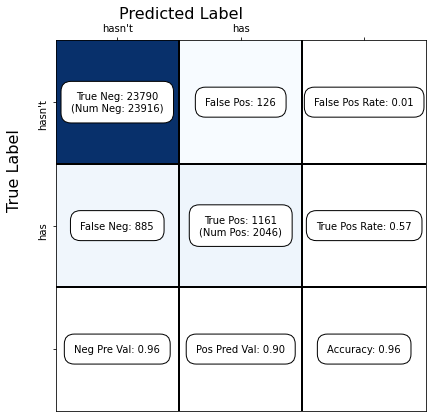

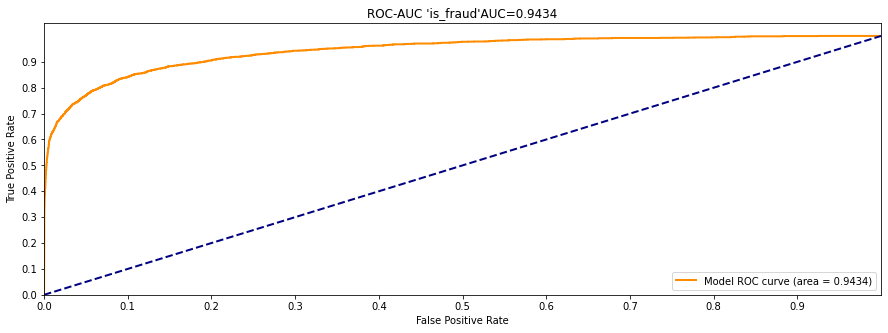

<Figure size 432x288 with 0 Axes>

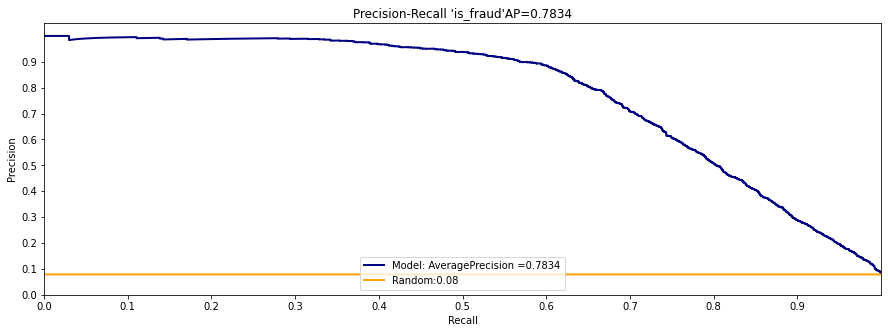

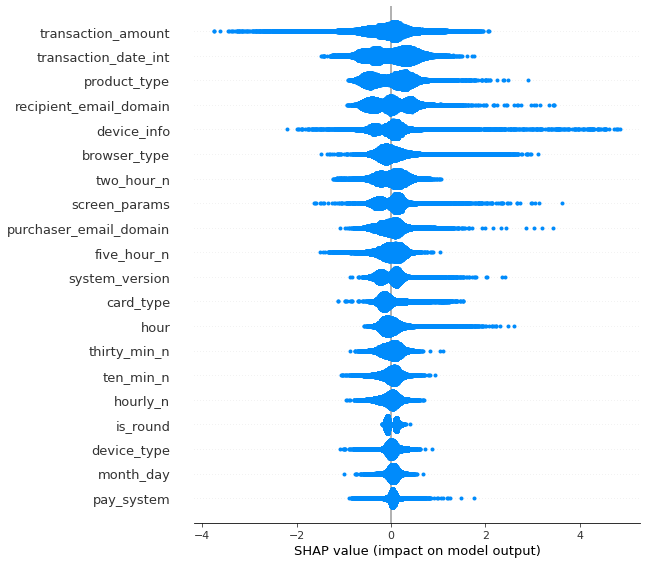

0:	learn: 0.5904895	test: 0.5904888	test1: 0.5896537	test2: 0.5904107	best: 0.5904107 (0)	total: 76.6ms	remaining: 7m 39s
1:	learn: 0.5135895	test: 0.5135988	test1: 0.5117960	test2: 0.5134974	best: 0.5134974 (1)	total: 148ms	remaining: 7m 23s
2:	learn: 0.4588028	test: 0.4588113	test1: 0.4564367	test2: 0.4585062	best: 0.4585062 (2)	total: 157ms	remaining: 5m 14s
3:	learn: 0.4093371	test: 0.4093441	test1: 0.4066615	test2: 0.4091314	best: 0.4091314 (3)	total: 198ms	remaining: 4m 57s
4:	learn: 0.3782259	test: 0.3782323	test1: 0.3751175	test2: 0.3778639	best: 0.3778639 (4)	total: 207ms	remaining: 4m 8s
5:	learn: 0.3450072	test: 0.3450133	test1: 0.3415390	test2: 0.3447255	best: 0.3447255 (5)	total: 260ms	remaining: 4m 20s
6:	learn: 0.3220300	test: 0.3219433	test1: 0.3185315	test2: 0.3218869	best: 0.3218869 (6)	total: 307ms	remaining: 4m 23s
7:	learn: 0.3041793	test: 0.3040770	test1: 0.3002032	test2: 0.3040686	best: 0.3040686 (7)	total: 349ms	remaining: 4m 21s
8:	learn: 0.2912697	test: 0.2911

69:	learn: 0.1751538	test: 0.1377888	test1: 0.1609414	test2: 0.1587112	best: 0.1587112 (69)	total: 4.26s	remaining: 6m
70:	learn: 0.1747875	test: 0.1374801	test1: 0.1607461	test2: 0.1584034	best: 0.1584034 (70)	total: 4.31s	remaining: 5m 59s
71:	learn: 0.1745014	test: 0.1372035	test1: 0.1604174	test2: 0.1582060	best: 0.1582060 (71)	total: 4.36s	remaining: 5m 59s
72:	learn: 0.1743854	test: 0.1371211	test1: 0.1603414	test2: 0.1581315	best: 0.1581315 (72)	total: 4.42s	remaining: 5m 58s
73:	learn: 0.1741802	test: 0.1367404	test1: 0.1600698	test2: 0.1577785	best: 0.1577785 (73)	total: 4.48s	remaining: 5m 58s
74:	learn: 0.1738830	test: 0.1363182	test1: 0.1598255	test2: 0.1575068	best: 0.1575068 (74)	total: 4.55s	remaining: 5m 59s
75:	learn: 0.1736274	test: 0.1360539	test1: 0.1596750	test2: 0.1572811	best: 0.1572811 (75)	total: 4.6s	remaining: 5m 58s
76:	learn: 0.1732348	test: 0.1352530	test1: 0.1592682	test2: 0.1567236	best: 0.1567236 (76)	total: 4.67s	remaining: 5m 59s
77:	learn: 0.1729773	

136:	learn: 0.1633188	test: 0.1234876	test1: 0.1514576	test2: 0.1488157	best: 0.1488157 (136)	total: 8.18s	remaining: 5m 49s
137:	learn: 0.1630348	test: 0.1227271	test1: 0.1511637	test2: 0.1485058	best: 0.1485058 (137)	total: 8.24s	remaining: 5m 49s
138:	learn: 0.1629265	test: 0.1226397	test1: 0.1510685	test2: 0.1484260	best: 0.1484260 (138)	total: 8.29s	remaining: 5m 49s
139:	learn: 0.1628501	test: 0.1225859	test1: 0.1510125	test2: 0.1483871	best: 0.1483871 (139)	total: 8.34s	remaining: 5m 49s
140:	learn: 0.1627415	test: 0.1224843	test1: 0.1509386	test2: 0.1483072	best: 0.1483072 (140)	total: 8.41s	remaining: 5m 49s
141:	learn: 0.1626763	test: 0.1224449	test1: 0.1509147	test2: 0.1482669	best: 0.1482669 (141)	total: 8.46s	remaining: 5m 49s
142:	learn: 0.1625516	test: 0.1222526	test1: 0.1508098	test2: 0.1481518	best: 0.1481518 (142)	total: 8.53s	remaining: 5m 49s
143:	learn: 0.1625273	test: 0.1222474	test1: 0.1508077	test2: 0.1481466	best: 0.1481466 (143)	total: 8.58s	remaining: 5m 48s


202:	learn: 0.1554440	test: 0.1120533	test1: 0.1449120	test2: 0.1429177	best: 0.1429177 (202)	total: 11.9s	remaining: 5m 39s
203:	learn: 0.1553550	test: 0.1119899	test1: 0.1448650	test2: 0.1428948	best: 0.1428948 (203)	total: 11.9s	remaining: 5m 39s
204:	learn: 0.1553018	test: 0.1119720	test1: 0.1448515	test2: 0.1428896	best: 0.1428896 (204)	total: 12s	remaining: 5m 38s
205:	learn: 0.1551864	test: 0.1118841	test1: 0.1447427	test2: 0.1428129	best: 0.1428129 (205)	total: 12s	remaining: 5m 38s
206:	learn: 0.1551386	test: 0.1118483	test1: 0.1446985	test2: 0.1427737	best: 0.1427737 (206)	total: 12.1s	remaining: 5m 38s
207:	learn: 0.1550258	test: 0.1117555	test1: 0.1445742	test2: 0.1427202	best: 0.1427202 (207)	total: 12.1s	remaining: 5m 37s
208:	learn: 0.1548886	test: 0.1115526	test1: 0.1444297	test2: 0.1425648	best: 0.1425648 (208)	total: 12.2s	remaining: 5m 37s
209:	learn: 0.1548473	test: 0.1115433	test1: 0.1444384	test2: 0.1425687	best: 0.1425648 (208)	total: 12.2s	remaining: 5m 37s
210:

271:	learn: 0.1501234	test: 0.1062415	test1: 0.1417312	test2: 0.1399178	best: 0.1399178 (271)	total: 15.8s	remaining: 5m 32s
272:	learn: 0.1500855	test: 0.1062222	test1: 0.1416796	test2: 0.1399034	best: 0.1399034 (272)	total: 15.8s	remaining: 5m 31s
273:	learn: 0.1500594	test: 0.1061986	test1: 0.1416819	test2: 0.1398957	best: 0.1398957 (273)	total: 15.9s	remaining: 5m 32s
274:	learn: 0.1500202	test: 0.1061947	test1: 0.1416482	test2: 0.1398904	best: 0.1398904 (274)	total: 15.9s	remaining: 5m 31s
275:	learn: 0.1498622	test: 0.1057550	test1: 0.1415074	test2: 0.1397451	best: 0.1397451 (275)	total: 16s	remaining: 5m 32s
276:	learn: 0.1497717	test: 0.1056834	test1: 0.1414291	test2: 0.1397183	best: 0.1397183 (276)	total: 16.1s	remaining: 5m 32s
277:	learn: 0.1497308	test: 0.1056546	test1: 0.1414508	test2: 0.1397103	best: 0.1397103 (277)	total: 16.1s	remaining: 5m 32s
278:	learn: 0.1495683	test: 0.1055244	test1: 0.1413498	test2: 0.1396167	best: 0.1396167 (278)	total: 16.2s	remaining: 5m 32s
27

340:	learn: 0.1459528	test: 0.1028323	test1: 0.1397270	test2: 0.1380742	best: 0.1380742 (340)	total: 19.6s	remaining: 5m 25s
341:	learn: 0.1459242	test: 0.1028212	test1: 0.1397202	test2: 0.1380666	best: 0.1380666 (341)	total: 19.7s	remaining: 5m 25s
342:	learn: 0.1458948	test: 0.1028120	test1: 0.1397256	test2: 0.1380521	best: 0.1380521 (342)	total: 19.7s	remaining: 5m 25s
343:	learn: 0.1458646	test: 0.1027853	test1: 0.1397114	test2: 0.1380207	best: 0.1380207 (343)	total: 19.8s	remaining: 5m 25s
344:	learn: 0.1458465	test: 0.1027826	test1: 0.1397065	test2: 0.1380225	best: 0.1380207 (343)	total: 19.9s	remaining: 5m 25s
345:	learn: 0.1457646	test: 0.1027293	test1: 0.1396515	test2: 0.1379927	best: 0.1379927 (345)	total: 19.9s	remaining: 5m 25s
346:	learn: 0.1456464	test: 0.1026141	test1: 0.1395903	test2: 0.1379313	best: 0.1379313 (346)	total: 20s	remaining: 5m 25s
347:	learn: 0.1455827	test: 0.1026098	test1: 0.1396035	test2: 0.1379401	best: 0.1379313 (346)	total: 20s	remaining: 5m 25s
348:

410:	learn: 0.1420449	test: 0.0993716	test1: 0.1383426	test2: 0.1362386	best: 0.1362386 (410)	total: 23.5s	remaining: 5m 19s
411:	learn: 0.1420235	test: 0.0993629	test1: 0.1383512	test2: 0.1362408	best: 0.1362386 (410)	total: 23.6s	remaining: 5m 19s
412:	learn: 0.1419960	test: 0.0993495	test1: 0.1383414	test2: 0.1362409	best: 0.1362386 (410)	total: 23.6s	remaining: 5m 19s
413:	learn: 0.1419397	test: 0.0993106	test1: 0.1383549	test2: 0.1362356	best: 0.1362356 (413)	total: 23.7s	remaining: 5m 19s
414:	learn: 0.1419361	test: 0.0993109	test1: 0.1383517	test2: 0.1362395	best: 0.1362356 (413)	total: 23.7s	remaining: 5m 19s
415:	learn: 0.1418352	test: 0.0992218	test1: 0.1383108	test2: 0.1361904	best: 0.1361904 (415)	total: 23.8s	remaining: 5m 18s
416:	learn: 0.1417925	test: 0.0991818	test1: 0.1382822	test2: 0.1361843	best: 0.1361843 (416)	total: 23.8s	remaining: 5m 18s
417:	learn: 0.1417464	test: 0.0991520	test1: 0.1382989	test2: 0.1361840	best: 0.1361840 (417)	total: 23.9s	remaining: 5m 18s


478:	learn: 0.1382300	test: 0.0968660	test1: 0.1369681	test2: 0.1347529	best: 0.1347529 (478)	total: 27.1s	remaining: 5m 12s
479:	learn: 0.1382104	test: 0.0968595	test1: 0.1369511	test2: 0.1347897	best: 0.1347529 (478)	total: 27.1s	remaining: 5m 11s
480:	learn: 0.1381629	test: 0.0968305	test1: 0.1369397	test2: 0.1347818	best: 0.1347529 (478)	total: 27.2s	remaining: 5m 11s
481:	learn: 0.1380945	test: 0.0967959	test1: 0.1369227	test2: 0.1347777	best: 0.1347529 (478)	total: 27.2s	remaining: 5m 11s
482:	learn: 0.1379988	test: 0.0966626	test1: 0.1368452	test2: 0.1346999	best: 0.1346999 (482)	total: 27.3s	remaining: 5m 11s
483:	learn: 0.1379653	test: 0.0966559	test1: 0.1368470	test2: 0.1347133	best: 0.1346999 (482)	total: 27.4s	remaining: 5m 11s
484:	learn: 0.1379277	test: 0.0966349	test1: 0.1368358	test2: 0.1347009	best: 0.1346999 (482)	total: 27.4s	remaining: 5m 11s
485:	learn: 0.1379162	test: 0.0966271	test1: 0.1368470	test2: 0.1346917	best: 0.1346917 (485)	total: 27.5s	remaining: 5m 11s


547:	learn: 0.1347940	test: 0.0939627	test1: 0.1353512	test2: 0.1335574	best: 0.1335574 (547)	total: 30.8s	remaining: 5m 6s
548:	learn: 0.1347540	test: 0.0939406	test1: 0.1353279	test2: 0.1335356	best: 0.1335356 (548)	total: 30.8s	remaining: 5m 6s
549:	learn: 0.1347060	test: 0.0937689	test1: 0.1352562	test2: 0.1334588	best: 0.1334588 (549)	total: 30.9s	remaining: 5m 5s
550:	learn: 0.1346699	test: 0.0937531	test1: 0.1352572	test2: 0.1334639	best: 0.1334588 (549)	total: 30.9s	remaining: 5m 5s
551:	learn: 0.1345396	test: 0.0928169	test1: 0.1350795	test2: 0.1333143	best: 0.1333143 (551)	total: 31s	remaining: 5m 5s
552:	learn: 0.1345207	test: 0.0928098	test1: 0.1350626	test2: 0.1333021	best: 0.1333021 (552)	total: 31.1s	remaining: 5m 5s
553:	learn: 0.1344843	test: 0.0927957	test1: 0.1350319	test2: 0.1332943	best: 0.1332943 (553)	total: 31.1s	remaining: 5m 5s
554:	learn: 0.1344654	test: 0.0927909	test1: 0.1350347	test2: 0.1332901	best: 0.1332901 (554)	total: 31.2s	remaining: 5m 5s
555:	learn

614:	learn: 0.1321348	test: 0.0913302	test1: 0.1341003	test2: 0.1326751	best: 0.1326751 (614)	total: 34.3s	remaining: 5m
615:	learn: 0.1320699	test: 0.0912824	test1: 0.1340550	test2: 0.1326514	best: 0.1326514 (615)	total: 34.3s	remaining: 4m 59s
616:	learn: 0.1320182	test: 0.0912521	test1: 0.1340498	test2: 0.1326448	best: 0.1326448 (616)	total: 34.4s	remaining: 4m 59s
617:	learn: 0.1319540	test: 0.0912085	test1: 0.1340217	test2: 0.1326202	best: 0.1326202 (617)	total: 34.4s	remaining: 4m 59s
618:	learn: 0.1319408	test: 0.0912075	test1: 0.1340224	test2: 0.1326202	best: 0.1326202 (617)	total: 34.5s	remaining: 4m 59s
619:	learn: 0.1319297	test: 0.0912026	test1: 0.1340137	test2: 0.1326076	best: 0.1326076 (619)	total: 34.5s	remaining: 4m 59s
620:	learn: 0.1318492	test: 0.0911571	test1: 0.1339961	test2: 0.1325776	best: 0.1325776 (620)	total: 34.6s	remaining: 4m 59s
621:	learn: 0.1318215	test: 0.0911498	test1: 0.1340234	test2: 0.1325777	best: 0.1325776 (620)	total: 34.6s	remaining: 4m 59s
622:

683:	learn: 0.1287268	test: 0.0846674	test1: 0.1325934	test2: 0.1310312	best: 0.1310312 (683)	total: 38.1s	remaining: 4m 56s
684:	learn: 0.1286771	test: 0.0846384	test1: 0.1325791	test2: 0.1309972	best: 0.1309972 (684)	total: 38.1s	remaining: 4m 56s
685:	learn: 0.1286221	test: 0.0841988	test1: 0.1324943	test2: 0.1309266	best: 0.1309266 (685)	total: 38.2s	remaining: 4m 56s
686:	learn: 0.1285847	test: 0.0841802	test1: 0.1325010	test2: 0.1309182	best: 0.1309182 (686)	total: 38.3s	remaining: 4m 56s
687:	learn: 0.1285506	test: 0.0841650	test1: 0.1324867	test2: 0.1309139	best: 0.1309139 (687)	total: 38.3s	remaining: 4m 55s
688:	learn: 0.1285092	test: 0.0841418	test1: 0.1324525	test2: 0.1308872	best: 0.1308872 (688)	total: 38.4s	remaining: 4m 55s
689:	learn: 0.1285021	test: 0.0841423	test1: 0.1324556	test2: 0.1308915	best: 0.1308872 (688)	total: 38.4s	remaining: 4m 55s
690:	learn: 0.1284777	test: 0.0841500	test1: 0.1324595	test2: 0.1308976	best: 0.1308872 (688)	total: 38.5s	remaining: 4m 55s


751:	learn: 0.1261652	test: 0.0824421	test1: 0.1315197	test2: 0.1303272	best: 0.1303272 (751)	total: 41.8s	remaining: 4m 51s
752:	learn: 0.1260748	test: 0.0823141	test1: 0.1314758	test2: 0.1302187	best: 0.1302187 (752)	total: 41.9s	remaining: 4m 51s
753:	learn: 0.1260475	test: 0.0823087	test1: 0.1314821	test2: 0.1302296	best: 0.1302187 (752)	total: 41.9s	remaining: 4m 51s
754:	learn: 0.1260364	test: 0.0823051	test1: 0.1314927	test2: 0.1302304	best: 0.1302187 (752)	total: 42s	remaining: 4m 51s
755:	learn: 0.1259869	test: 0.0822568	test1: 0.1314631	test2: 0.1302412	best: 0.1302187 (752)	total: 42s	remaining: 4m 51s
756:	learn: 0.1259111	test: 0.0822026	test1: 0.1314403	test2: 0.1301792	best: 0.1301792 (756)	total: 42.1s	remaining: 4m 51s
757:	learn: 0.1258760	test: 0.0821817	test1: 0.1314000	test2: 0.1301791	best: 0.1301791 (757)	total: 42.1s	remaining: 4m 51s
758:	learn: 0.1258243	test: 0.0821732	test1: 0.1314088	test2: 0.1302031	best: 0.1301791 (757)	total: 42.2s	remaining: 4m 51s
759:

819:	learn: 0.1232398	test: 0.0789715	test1: 0.1305760	test2: 0.1292945	best: 0.1292778 (817)	total: 45.4s	remaining: 4m 46s
820:	learn: 0.1232133	test: 0.0789669	test1: 0.1305770	test2: 0.1292893	best: 0.1292778 (817)	total: 45.5s	remaining: 4m 46s
821:	learn: 0.1231576	test: 0.0789276	test1: 0.1305716	test2: 0.1292903	best: 0.1292778 (817)	total: 45.5s	remaining: 4m 46s
822:	learn: 0.1231288	test: 0.0789143	test1: 0.1305584	test2: 0.1292811	best: 0.1292778 (817)	total: 45.6s	remaining: 4m 46s
823:	learn: 0.1231003	test: 0.0789106	test1: 0.1305268	test2: 0.1292791	best: 0.1292778 (817)	total: 45.6s	remaining: 4m 46s
824:	learn: 0.1230827	test: 0.0789094	test1: 0.1305352	test2: 0.1292784	best: 0.1292778 (817)	total: 45.7s	remaining: 4m 46s
825:	learn: 0.1230549	test: 0.0789045	test1: 0.1305161	test2: 0.1292769	best: 0.1292769 (825)	total: 45.7s	remaining: 4m 46s
826:	learn: 0.1230528	test: 0.0789041	test1: 0.1305126	test2: 0.1292732	best: 0.1292732 (826)	total: 45.8s	remaining: 4m 46s


886:	learn: 0.1207613	test: 0.0759418	test1: 0.1294758	test2: 0.1286136	best: 0.1286136 (886)	total: 49.2s	remaining: 4m 43s
887:	learn: 0.1207257	test: 0.0759352	test1: 0.1294709	test2: 0.1286131	best: 0.1286131 (887)	total: 49.2s	remaining: 4m 43s
888:	learn: 0.1207209	test: 0.0759353	test1: 0.1294798	test2: 0.1286127	best: 0.1286127 (888)	total: 49.3s	remaining: 4m 43s
889:	learn: 0.1206863	test: 0.0759292	test1: 0.1294771	test2: 0.1286069	best: 0.1286069 (889)	total: 49.3s	remaining: 4m 43s
890:	learn: 0.1206431	test: 0.0758951	test1: 0.1294560	test2: 0.1285773	best: 0.1285773 (890)	total: 49.4s	remaining: 4m 43s
891:	learn: 0.1206286	test: 0.0758877	test1: 0.1294555	test2: 0.1285758	best: 0.1285758 (891)	total: 49.4s	remaining: 4m 43s
892:	learn: 0.1205592	test: 0.0758330	test1: 0.1294091	test2: 0.1285635	best: 0.1285635 (892)	total: 49.5s	remaining: 4m 43s
893:	learn: 0.1205113	test: 0.0758003	test1: 0.1293931	test2: 0.1285568	best: 0.1285568 (893)	total: 49.5s	remaining: 4m 42s


952:	learn: 0.1182485	test: 0.0744244	test1: 0.1288287	test2: 0.1279319	best: 0.1279310 (950)	total: 52.7s	remaining: 4m 39s
953:	learn: 0.1182306	test: 0.0744116	test1: 0.1288192	test2: 0.1279233	best: 0.1279233 (953)	total: 52.8s	remaining: 4m 39s
954:	learn: 0.1181572	test: 0.0743599	test1: 0.1288120	test2: 0.1279067	best: 0.1279067 (954)	total: 52.8s	remaining: 4m 39s
955:	learn: 0.1181129	test: 0.0743228	test1: 0.1287655	test2: 0.1279044	best: 0.1279044 (955)	total: 52.9s	remaining: 4m 38s
956:	learn: 0.1180385	test: 0.0742643	test1: 0.1287716	test2: 0.1279117	best: 0.1279044 (955)	total: 52.9s	remaining: 4m 38s
957:	learn: 0.1179498	test: 0.0742120	test1: 0.1287876	test2: 0.1279100	best: 0.1279044 (955)	total: 53s	remaining: 4m 38s
958:	learn: 0.1179244	test: 0.0741987	test1: 0.1287785	test2: 0.1279092	best: 0.1279044 (955)	total: 53s	remaining: 4m 38s
959:	learn: 0.1178451	test: 0.0741549	test1: 0.1287739	test2: 0.1278851	best: 0.1278851 (959)	total: 53.1s	remaining: 4m 38s
960:

1019:	learn: 0.1157941	test: 0.0728399	test1: 0.1282029	test2: 0.1271790	best: 0.1271459 (1014)	total: 56.3s	remaining: 4m 34s
1020:	learn: 0.1157671	test: 0.0728265	test1: 0.1282066	test2: 0.1271576	best: 0.1271459 (1014)	total: 56.3s	remaining: 4m 34s
1021:	learn: 0.1157489	test: 0.0728157	test1: 0.1281919	test2: 0.1271575	best: 0.1271459 (1014)	total: 56.4s	remaining: 4m 34s
1022:	learn: 0.1157443	test: 0.0728174	test1: 0.1281947	test2: 0.1271594	best: 0.1271459 (1014)	total: 56.5s	remaining: 4m 34s
1023:	learn: 0.1157270	test: 0.0728143	test1: 0.1281951	test2: 0.1271583	best: 0.1271459 (1014)	total: 56.5s	remaining: 4m 34s
1024:	learn: 0.1156498	test: 0.0727499	test1: 0.1281656	test2: 0.1271334	best: 0.1271334 (1024)	total: 56.5s	remaining: 4m 34s
1025:	learn: 0.1155970	test: 0.0727145	test1: 0.1281517	test2: 0.1271208	best: 0.1271208 (1025)	total: 56.6s	remaining: 4m 34s
1026:	learn: 0.1155856	test: 0.0727145	test1: 0.1281517	test2: 0.1271131	best: 0.1271131 (1026)	total: 56.6s	re

1085:	learn: 0.1136263	test: 0.0716803	test1: 0.1276601	test2: 0.1265908	best: 0.1265908 (1085)	total: 59.8s	remaining: 4m 30s
1086:	learn: 0.1135927	test: 0.0716536	test1: 0.1276308	test2: 0.1265800	best: 0.1265800 (1086)	total: 59.9s	remaining: 4m 30s
1087:	learn: 0.1135808	test: 0.0716445	test1: 0.1276099	test2: 0.1265688	best: 0.1265688 (1087)	total: 59.9s	remaining: 4m 30s
1088:	learn: 0.1135652	test: 0.0716466	test1: 0.1276304	test2: 0.1265741	best: 0.1265688 (1087)	total: 60s	remaining: 4m 30s
1089:	learn: 0.1135633	test: 0.0716514	test1: 0.1276329	test2: 0.1265754	best: 0.1265688 (1087)	total: 1m	remaining: 4m 30s
1090:	learn: 0.1135408	test: 0.0716488	test1: 0.1276292	test2: 0.1265795	best: 0.1265688 (1087)	total: 1m	remaining: 4m 30s
1091:	learn: 0.1135051	test: 0.0715719	test1: 0.1276099	test2: 0.1265649	best: 0.1265649 (1091)	total: 1m	remaining: 4m 30s
1092:	learn: 0.1134667	test: 0.0715461	test1: 0.1275802	test2: 0.1265402	best: 0.1265402 (1092)	total: 1m	remaining: 4m 30

1151:	learn: 0.1116694	test: 0.0695276	test1: 0.1273464	test2: 0.1262412	best: 0.1262412 (1151)	total: 1m 3s	remaining: 4m 26s
1152:	learn: 0.1116544	test: 0.0695207	test1: 0.1273581	test2: 0.1262355	best: 0.1262355 (1152)	total: 1m 3s	remaining: 4m 26s
1153:	learn: 0.1116368	test: 0.0695209	test1: 0.1273515	test2: 0.1262372	best: 0.1262355 (1152)	total: 1m 3s	remaining: 4m 26s
1154:	learn: 0.1115997	test: 0.0695027	test1: 0.1273510	test2: 0.1262400	best: 0.1262355 (1152)	total: 1m 3s	remaining: 4m 26s
1155:	learn: 0.1115620	test: 0.0694905	test1: 0.1273191	test2: 0.1262574	best: 0.1262355 (1152)	total: 1m 3s	remaining: 4m 26s
1156:	learn: 0.1115365	test: 0.0694873	test1: 0.1273134	test2: 0.1262604	best: 0.1262355 (1152)	total: 1m 3s	remaining: 4m 26s
1157:	learn: 0.1114862	test: 0.0694502	test1: 0.1272842	test2: 0.1262350	best: 0.1262350 (1157)	total: 1m 3s	remaining: 4m 26s
1158:	learn: 0.1114599	test: 0.0694367	test1: 0.1272566	test2: 0.1262397	best: 0.1262350 (1157)	total: 1m 3s	re

1218:	learn: 0.1095586	test: 0.0680795	test1: 0.1268126	test2: 0.1257366	best: 0.1257198 (1216)	total: 1m 7s	remaining: 4m 23s
1219:	learn: 0.1095023	test: 0.0680594	test1: 0.1268139	test2: 0.1257104	best: 0.1257104 (1219)	total: 1m 7s	remaining: 4m 23s
1220:	learn: 0.1094815	test: 0.0680469	test1: 0.1268121	test2: 0.1257180	best: 0.1257104 (1219)	total: 1m 7s	remaining: 4m 23s
1221:	learn: 0.1094455	test: 0.0680226	test1: 0.1268200	test2: 0.1256856	best: 0.1256856 (1221)	total: 1m 7s	remaining: 4m 23s
1222:	learn: 0.1093830	test: 0.0679952	test1: 0.1268109	test2: 0.1256955	best: 0.1256856 (1221)	total: 1m 7s	remaining: 4m 23s
1223:	learn: 0.1093525	test: 0.0679805	test1: 0.1268281	test2: 0.1256693	best: 0.1256693 (1223)	total: 1m 7s	remaining: 4m 23s
1224:	learn: 0.1093442	test: 0.0679793	test1: 0.1268221	test2: 0.1256665	best: 0.1256665 (1224)	total: 1m 7s	remaining: 4m 23s
1225:	learn: 0.1093253	test: 0.0679796	test1: 0.1268347	test2: 0.1256625	best: 0.1256625 (1225)	total: 1m 7s	re

1286:	learn: 0.1074035	test: 0.0660520	test1: 0.1261729	test2: 0.1252262	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1287:	learn: 0.1073830	test: 0.0660463	test1: 0.1261681	test2: 0.1252454	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1288:	learn: 0.1073804	test: 0.0660454	test1: 0.1261679	test2: 0.1252430	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1289:	learn: 0.1073409	test: 0.0660245	test1: 0.1261710	test2: 0.1252288	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1290:	learn: 0.1072732	test: 0.0659851	test1: 0.1261874	test2: 0.1252254	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1291:	learn: 0.1072714	test: 0.0659857	test1: 0.1261870	test2: 0.1252241	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1292:	learn: 0.1072564	test: 0.0659881	test1: 0.1261974	test2: 0.1252245	best: 0.1252196 (1283)	total: 1m 11s	remaining: 4m 20s
1293:	learn: 0.1072176	test: 0.0659721	test1: 0.1262030	test2: 0.1252227	best: 0.1252196 (1283)	total: 1

1355:	learn: 0.1053777	test: 0.0641818	test1: 0.1257271	test2: 0.1246498	best: 0.1246458 (1354)	total: 1m 15s	remaining: 4m 16s
1356:	learn: 0.1053415	test: 0.0641517	test1: 0.1257166	test2: 0.1246304	best: 0.1246304 (1356)	total: 1m 15s	remaining: 4m 16s
1357:	learn: 0.1053339	test: 0.0641385	test1: 0.1257180	test2: 0.1246153	best: 0.1246153 (1357)	total: 1m 15s	remaining: 4m 16s
1358:	learn: 0.1052763	test: 0.0640980	test1: 0.1257124	test2: 0.1245922	best: 0.1245922 (1358)	total: 1m 15s	remaining: 4m 16s
1359:	learn: 0.1052658	test: 0.0640974	test1: 0.1257034	test2: 0.1245892	best: 0.1245892 (1359)	total: 1m 15s	remaining: 4m 16s
1360:	learn: 0.1051931	test: 0.0640580	test1: 0.1256745	test2: 0.1245655	best: 0.1245655 (1360)	total: 1m 15s	remaining: 4m 16s
1361:	learn: 0.1051343	test: 0.0640194	test1: 0.1256312	test2: 0.1245364	best: 0.1245364 (1361)	total: 1m 15s	remaining: 4m 16s
1362:	learn: 0.1051072	test: 0.0640039	test1: 0.1256303	test2: 0.1245248	best: 0.1245248 (1362)	total: 1

1420:	learn: 0.1034762	test: 0.0631428	test1: 0.1253391	test2: 0.1242496	best: 0.1242400 (1417)	total: 1m 18s	remaining: 4m 13s
1421:	learn: 0.1034547	test: 0.0631333	test1: 0.1253465	test2: 0.1242560	best: 0.1242400 (1417)	total: 1m 18s	remaining: 4m 13s
1422:	learn: 0.1034159	test: 0.0631134	test1: 0.1253266	test2: 0.1242487	best: 0.1242400 (1417)	total: 1m 18s	remaining: 4m 12s
1423:	learn: 0.1033812	test: 0.0631028	test1: 0.1253267	test2: 0.1242266	best: 0.1242266 (1423)	total: 1m 18s	remaining: 4m 12s
1424:	learn: 0.1033551	test: 0.0630823	test1: 0.1253480	test2: 0.1242190	best: 0.1242190 (1424)	total: 1m 18s	remaining: 4m 12s
1425:	learn: 0.1033301	test: 0.0630668	test1: 0.1253430	test2: 0.1242098	best: 0.1242098 (1425)	total: 1m 18s	remaining: 4m 12s
1426:	learn: 0.1033174	test: 0.0630628	test1: 0.1253412	test2: 0.1242058	best: 0.1242058 (1426)	total: 1m 18s	remaining: 4m 12s
1427:	learn: 0.1032949	test: 0.0630631	test1: 0.1253416	test2: 0.1242084	best: 0.1242058 (1426)	total: 1

1488:	learn: 0.1015933	test: 0.0623352	test1: 0.1251149	test2: 0.1239945	best: 0.1239945 (1488)	total: 1m 22s	remaining: 4m 9s
1489:	learn: 0.1015867	test: 0.0623350	test1: 0.1251055	test2: 0.1239933	best: 0.1239933 (1489)	total: 1m 22s	remaining: 4m 8s
1490:	learn: 0.1015604	test: 0.0623248	test1: 0.1251060	test2: 0.1239963	best: 0.1239933 (1489)	total: 1m 22s	remaining: 4m 8s
1491:	learn: 0.1015338	test: 0.0623053	test1: 0.1251216	test2: 0.1239775	best: 0.1239775 (1491)	total: 1m 22s	remaining: 4m 8s
1492:	learn: 0.1015083	test: 0.0622846	test1: 0.1250913	test2: 0.1239541	best: 0.1239541 (1492)	total: 1m 22s	remaining: 4m 8s
1493:	learn: 0.1014863	test: 0.0622783	test1: 0.1250947	test2: 0.1239707	best: 0.1239541 (1492)	total: 1m 22s	remaining: 4m 8s
1494:	learn: 0.1014760	test: 0.0622735	test1: 0.1250930	test2: 0.1239885	best: 0.1239541 (1492)	total: 1m 22s	remaining: 4m 8s
1495:	learn: 0.1014479	test: 0.0622666	test1: 0.1250942	test2: 0.1239860	best: 0.1239541 (1492)	total: 1m 22s	r

1556:	learn: 0.0996036	test: 0.0611514	test1: 0.1246433	test2: 0.1235182	best: 0.1235182 (1556)	total: 1m 25s	remaining: 4m 4s
1557:	learn: 0.0995957	test: 0.0611608	test1: 0.1246418	test2: 0.1235183	best: 0.1235182 (1556)	total: 1m 25s	remaining: 4m 4s
1558:	learn: 0.0995948	test: 0.0611626	test1: 0.1246425	test2: 0.1235185	best: 0.1235182 (1556)	total: 1m 25s	remaining: 4m 4s
1559:	learn: 0.0995890	test: 0.0611700	test1: 0.1246414	test2: 0.1235138	best: 0.1235138 (1559)	total: 1m 25s	remaining: 4m 4s
1560:	learn: 0.0995600	test: 0.0611561	test1: 0.1246061	test2: 0.1235201	best: 0.1235138 (1559)	total: 1m 26s	remaining: 4m 4s
1561:	learn: 0.0995449	test: 0.0611497	test1: 0.1246050	test2: 0.1235217	best: 0.1235138 (1559)	total: 1m 26s	remaining: 4m 4s
1562:	learn: 0.0995176	test: 0.0611449	test1: 0.1245794	test2: 0.1235252	best: 0.1235138 (1559)	total: 1m 26s	remaining: 4m 4s
1563:	learn: 0.0994963	test: 0.0611321	test1: 0.1245683	test2: 0.1235030	best: 0.1235030 (1563)	total: 1m 26s	r

1621:	learn: 0.0979783	test: 0.0604363	test1: 0.1243380	test2: 0.1232338	best: 0.1232232 (1619)	total: 1m 29s	remaining: 4m
1622:	learn: 0.0979553	test: 0.0603617	test1: 0.1243254	test2: 0.1232124	best: 0.1232124 (1622)	total: 1m 29s	remaining: 4m
1623:	learn: 0.0979405	test: 0.0603526	test1: 0.1243298	test2: 0.1232073	best: 0.1232073 (1623)	total: 1m 29s	remaining: 4m
1624:	learn: 0.0978856	test: 0.0603138	test1: 0.1243109	test2: 0.1231904	best: 0.1231904 (1624)	total: 1m 29s	remaining: 4m
1625:	learn: 0.0978650	test: 0.0603004	test1: 0.1242926	test2: 0.1231747	best: 0.1231747 (1625)	total: 1m 29s	remaining: 4m
1626:	learn: 0.0978281	test: 0.0602955	test1: 0.1242873	test2: 0.1231935	best: 0.1231747 (1625)	total: 1m 29s	remaining: 4m
1627:	learn: 0.0978200	test: 0.0602953	test1: 0.1242860	test2: 0.1231927	best: 0.1231747 (1625)	total: 1m 29s	remaining: 4m
1628:	learn: 0.0978041	test: 0.0602939	test1: 0.1242972	test2: 0.1231778	best: 0.1231747 (1625)	total: 1m 29s	remaining: 4m
1629:	le

1686:	learn: 0.0963404	test: 0.0595422	test1: 0.1238858	test2: 0.1229696	best: 0.1229696 (1686)	total: 1m 32s	remaining: 3m 57s
1687:	learn: 0.0963086	test: 0.0595191	test1: 0.1238421	test2: 0.1229700	best: 0.1229696 (1686)	total: 1m 32s	remaining: 3m 56s
1688:	learn: 0.0962805	test: 0.0595214	test1: 0.1238274	test2: 0.1229603	best: 0.1229603 (1688)	total: 1m 32s	remaining: 3m 56s
1689:	learn: 0.0962344	test: 0.0594864	test1: 0.1238038	test2: 0.1229616	best: 0.1229603 (1688)	total: 1m 32s	remaining: 3m 56s
1690:	learn: 0.0962263	test: 0.0594869	test1: 0.1238058	test2: 0.1229649	best: 0.1229603 (1688)	total: 1m 32s	remaining: 3m 56s
1691:	learn: 0.0962187	test: 0.0594823	test1: 0.1238003	test2: 0.1229616	best: 0.1229603 (1688)	total: 1m 32s	remaining: 3m 56s
1692:	learn: 0.0961914	test: 0.0594581	test1: 0.1238021	test2: 0.1229596	best: 0.1229596 (1692)	total: 1m 33s	remaining: 3m 56s
1693:	learn: 0.0961769	test: 0.0594553	test1: 0.1238112	test2: 0.1229633	best: 0.1229596 (1692)	total: 1

1752:	learn: 0.0947625	test: 0.0587857	test1: 0.1234983	test2: 0.1227912	best: 0.1227912 (1752)	total: 1m 36s	remaining: 3m 53s
1753:	learn: 0.0947406	test: 0.0587719	test1: 0.1234902	test2: 0.1227813	best: 0.1227813 (1753)	total: 1m 36s	remaining: 3m 53s
1754:	learn: 0.0946997	test: 0.0587512	test1: 0.1234865	test2: 0.1227887	best: 0.1227813 (1753)	total: 1m 36s	remaining: 3m 53s
1755:	learn: 0.0946777	test: 0.0587328	test1: 0.1234618	test2: 0.1227805	best: 0.1227805 (1755)	total: 1m 36s	remaining: 3m 53s
1756:	learn: 0.0946540	test: 0.0587231	test1: 0.1234726	test2: 0.1227744	best: 0.1227744 (1756)	total: 1m 36s	remaining: 3m 53s
1757:	learn: 0.0946270	test: 0.0587148	test1: 0.1235027	test2: 0.1227737	best: 0.1227737 (1757)	total: 1m 36s	remaining: 3m 53s
1758:	learn: 0.0946086	test: 0.0587108	test1: 0.1234960	test2: 0.1227774	best: 0.1227737 (1757)	total: 1m 36s	remaining: 3m 53s
1759:	learn: 0.0945872	test: 0.0587141	test1: 0.1235170	test2: 0.1227749	best: 0.1227737 (1757)	total: 1

1818:	learn: 0.0933326	test: 0.0580708	test1: 0.1233613	test2: 0.1226034	best: 0.1225889 (1810)	total: 1m 39s	remaining: 3m 49s
1819:	learn: 0.0933305	test: 0.0580715	test1: 0.1233601	test2: 0.1226023	best: 0.1225889 (1810)	total: 1m 39s	remaining: 3m 49s
1820:	learn: 0.0933275	test: 0.0580718	test1: 0.1233511	test2: 0.1226034	best: 0.1225889 (1810)	total: 1m 39s	remaining: 3m 49s
1821:	learn: 0.0933117	test: 0.0580624	test1: 0.1233517	test2: 0.1226089	best: 0.1225889 (1810)	total: 1m 40s	remaining: 3m 49s
1822:	learn: 0.0933081	test: 0.0580631	test1: 0.1233494	test2: 0.1226072	best: 0.1225889 (1810)	total: 1m 40s	remaining: 3m 49s
1823:	learn: 0.0932960	test: 0.0580666	test1: 0.1233517	test2: 0.1225959	best: 0.1225889 (1810)	total: 1m 40s	remaining: 3m 49s
1824:	learn: 0.0932806	test: 0.0580595	test1: 0.1233631	test2: 0.1225952	best: 0.1225889 (1810)	total: 1m 40s	remaining: 3m 49s
1825:	learn: 0.0932525	test: 0.0580345	test1: 0.1233527	test2: 0.1226009	best: 0.1225889 (1810)	total: 1

1885:	learn: 0.0920843	test: 0.0575762	test1: 0.1232982	test2: 0.1224442	best: 0.1224442 (1885)	total: 1m 43s	remaining: 3m 45s
1886:	learn: 0.0920629	test: 0.0575629	test1: 0.1233056	test2: 0.1224319	best: 0.1224319 (1886)	total: 1m 43s	remaining: 3m 45s
1887:	learn: 0.0920525	test: 0.0575585	test1: 0.1232983	test2: 0.1224245	best: 0.1224245 (1887)	total: 1m 43s	remaining: 3m 45s
1888:	learn: 0.0920504	test: 0.0575612	test1: 0.1233036	test2: 0.1224270	best: 0.1224245 (1887)	total: 1m 43s	remaining: 3m 45s
1889:	learn: 0.0920212	test: 0.0575556	test1: 0.1233062	test2: 0.1224054	best: 0.1224054 (1889)	total: 1m 43s	remaining: 3m 45s
1890:	learn: 0.0919889	test: 0.0575464	test1: 0.1233116	test2: 0.1224058	best: 0.1224054 (1889)	total: 1m 43s	remaining: 3m 45s
1891:	learn: 0.0919799	test: 0.0575471	test1: 0.1233167	test2: 0.1223944	best: 0.1223944 (1891)	total: 1m 43s	remaining: 3m 45s
1892:	learn: 0.0919377	test: 0.0575341	test1: 0.1232849	test2: 0.1223950	best: 0.1223944 (1891)	total: 1

1950:	learn: 0.0905551	test: 0.0568083	test1: 0.1229738	test2: 0.1221049	best: 0.1221049 (1950)	total: 1m 47s	remaining: 3m 42s
1951:	learn: 0.0905237	test: 0.0567955	test1: 0.1229632	test2: 0.1221217	best: 0.1221049 (1950)	total: 1m 47s	remaining: 3m 42s
1952:	learn: 0.0904882	test: 0.0567654	test1: 0.1229662	test2: 0.1220951	best: 0.1220951 (1952)	total: 1m 47s	remaining: 3m 42s
1953:	learn: 0.0904674	test: 0.0567585	test1: 0.1229592	test2: 0.1220932	best: 0.1220932 (1953)	total: 1m 47s	remaining: 3m 42s
1954:	learn: 0.0904454	test: 0.0567473	test1: 0.1229570	test2: 0.1220824	best: 0.1220824 (1954)	total: 1m 47s	remaining: 3m 41s
1955:	learn: 0.0904279	test: 0.0567423	test1: 0.1229526	test2: 0.1220770	best: 0.1220770 (1955)	total: 1m 47s	remaining: 3m 41s
1956:	learn: 0.0904229	test: 0.0567428	test1: 0.1229559	test2: 0.1220781	best: 0.1220770 (1955)	total: 1m 47s	remaining: 3m 41s
1957:	learn: 0.0903925	test: 0.0567292	test1: 0.1229564	test2: 0.1220932	best: 0.1220770 (1955)	total: 1

2015:	learn: 0.0891823	test: 0.0562086	test1: 0.1229522	test2: 0.1219145	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2016:	learn: 0.0891721	test: 0.0562060	test1: 0.1229609	test2: 0.1219146	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2017:	learn: 0.0891503	test: 0.0561981	test1: 0.1229719	test2: 0.1219170	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2018:	learn: 0.0891229	test: 0.0561831	test1: 0.1229768	test2: 0.1219490	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2019:	learn: 0.0890784	test: 0.0561322	test1: 0.1229822	test2: 0.1219242	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2020:	learn: 0.0890774	test: 0.0561321	test1: 0.1229796	test2: 0.1219229	best: 0.1218789 (2006)	total: 1m 50s	remaining: 3m 38s
2021:	learn: 0.0890720	test: 0.0561292	test1: 0.1229757	test2: 0.1219204	best: 0.1218789 (2006)	total: 1m 51s	remaining: 3m 38s
2022:	learn: 0.0890667	test: 0.0561334	test1: 0.1229850	test2: 0.1219245	best: 0.1218789 (2006)	total: 1

2083:	learn: 0.0878134	test: 0.0555594	test1: 0.1226651	test2: 0.1219170	best: 0.1218789 (2006)	total: 1m 54s	remaining: 3m 35s
2084:	learn: 0.0877932	test: 0.0555558	test1: 0.1226797	test2: 0.1219269	best: 0.1218789 (2006)	total: 1m 54s	remaining: 3m 35s
2085:	learn: 0.0877641	test: 0.0555395	test1: 0.1226802	test2: 0.1219281	best: 0.1218789 (2006)	total: 1m 54s	remaining: 3m 35s
2086:	learn: 0.0877380	test: 0.0555253	test1: 0.1227015	test2: 0.1219303	best: 0.1218789 (2006)	total: 1m 54s	remaining: 3m 35s
2087:	learn: 0.0876936	test: 0.0555091	test1: 0.1227269	test2: 0.1219215	best: 0.1218789 (2006)	total: 1m 54s	remaining: 3m 35s
2088:	learn: 0.0876531	test: 0.0554814	test1: 0.1227176	test2: 0.1218719	best: 0.1218719 (2088)	total: 1m 54s	remaining: 3m 35s
2089:	learn: 0.0876387	test: 0.0554733	test1: 0.1226987	test2: 0.1218632	best: 0.1218632 (2089)	total: 1m 54s	remaining: 3m 35s
2090:	learn: 0.0876129	test: 0.0554685	test1: 0.1227073	test2: 0.1218665	best: 0.1218632 (2089)	total: 1

2151:	learn: 0.0861477	test: 0.0547669	test1: 0.1224852	test2: 0.1216339	best: 0.1216339 (2151)	total: 1m 58s	remaining: 3m 31s
2152:	learn: 0.0860943	test: 0.0547469	test1: 0.1224574	test2: 0.1215969	best: 0.1215969 (2152)	total: 1m 58s	remaining: 3m 31s
2153:	learn: 0.0860891	test: 0.0547468	test1: 0.1224509	test2: 0.1216036	best: 0.1215969 (2152)	total: 1m 58s	remaining: 3m 31s
2154:	learn: 0.0860463	test: 0.0547195	test1: 0.1224599	test2: 0.1215788	best: 0.1215788 (2154)	total: 1m 58s	remaining: 3m 31s
2155:	learn: 0.0860314	test: 0.0547156	test1: 0.1224651	test2: 0.1215802	best: 0.1215788 (2154)	total: 1m 58s	remaining: 3m 31s
2156:	learn: 0.0860127	test: 0.0545842	test1: 0.1224347	test2: 0.1215662	best: 0.1215662 (2156)	total: 1m 58s	remaining: 3m 31s
2157:	learn: 0.0859218	test: 0.0544210	test1: 0.1224297	test2: 0.1215442	best: 0.1215442 (2157)	total: 1m 58s	remaining: 3m 31s
2158:	learn: 0.0858980	test: 0.0544145	test1: 0.1224233	test2: 0.1215497	best: 0.1215442 (2157)	total: 1

2216:	learn: 0.0847717	test: 0.0539754	test1: 0.1224083	test2: 0.1214089	best: 0.1213971 (2206)	total: 2m 2s	remaining: 3m 28s
2217:	learn: 0.0847014	test: 0.0539234	test1: 0.1223976	test2: 0.1213966	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 28s
2218:	learn: 0.0846765	test: 0.0539130	test1: 0.1223822	test2: 0.1214025	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 28s
2219:	learn: 0.0846695	test: 0.0539131	test1: 0.1223802	test2: 0.1214046	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 28s
2220:	learn: 0.0846200	test: 0.0538718	test1: 0.1223750	test2: 0.1214091	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 28s
2221:	learn: 0.0846173	test: 0.0538749	test1: 0.1223758	test2: 0.1214096	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 27s
2222:	learn: 0.0845905	test: 0.0538664	test1: 0.1223761	test2: 0.1214048	best: 0.1213966 (2217)	total: 2m 2s	remaining: 3m 27s
2223:	learn: 0.0845684	test: 0.0538649	test1: 0.1223637	test2: 0.1213989	best: 0.1213966 (2217)	total: 2m 2s	re

2281:	learn: 0.0832580	test: 0.0531642	test1: 0.1220359	test2: 0.1212688	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2282:	learn: 0.0832567	test: 0.0531644	test1: 0.1220366	test2: 0.1212694	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2283:	learn: 0.0832362	test: 0.0531560	test1: 0.1220313	test2: 0.1212643	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2284:	learn: 0.0832204	test: 0.0531463	test1: 0.1220148	test2: 0.1212606	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2285:	learn: 0.0831918	test: 0.0531208	test1: 0.1220298	test2: 0.1212658	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2286:	learn: 0.0831684	test: 0.0531127	test1: 0.1220152	test2: 0.1212715	best: 0.1212158 (2273)	total: 2m 5s	remaining: 3m 24s
2287:	learn: 0.0831497	test: 0.0531130	test1: 0.1220038	test2: 0.1212794	best: 0.1212158 (2273)	total: 2m 6s	remaining: 3m 24s
2288:	learn: 0.0831344	test: 0.0531059	test1: 0.1219628	test2: 0.1212897	best: 0.1212158 (2273)	total: 2m 6s	re

2348:	learn: 0.0817895	test: 0.0524725	test1: 0.1218368	test2: 0.1212110	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2349:	learn: 0.0817776	test: 0.0524722	test1: 0.1218389	test2: 0.1212170	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2350:	learn: 0.0817676	test: 0.0524702	test1: 0.1218520	test2: 0.1212167	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2351:	learn: 0.0817547	test: 0.0524654	test1: 0.1218556	test2: 0.1212341	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2352:	learn: 0.0817280	test: 0.0524606	test1: 0.1218290	test2: 0.1212442	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2353:	learn: 0.0817015	test: 0.0524390	test1: 0.1218397	test2: 0.1212520	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2354:	learn: 0.0816772	test: 0.0524262	test1: 0.1218160	test2: 0.1212475	best: 0.1211961 (2347)	total: 2m 9s	remaining: 3m 21s
2355:	learn: 0.0816614	test: 0.0524197	test1: 0.1217967	test2: 0.1212346	best: 0.1211961 (2347)	total: 2m 9s	re

2413:	learn: 0.0804075	test: 0.0518346	test1: 0.1216200	test2: 0.1210287	best: 0.1210161 (2404)	total: 2m 13s	remaining: 3m 17s
2414:	learn: 0.0803989	test: 0.0518355	test1: 0.1216174	test2: 0.1210280	best: 0.1210161 (2404)	total: 2m 13s	remaining: 3m 17s
2415:	learn: 0.0803754	test: 0.0518227	test1: 0.1215911	test2: 0.1210073	best: 0.1210073 (2415)	total: 2m 13s	remaining: 3m 17s
2416:	learn: 0.0803725	test: 0.0518232	test1: 0.1215937	test2: 0.1210158	best: 0.1210073 (2415)	total: 2m 13s	remaining: 3m 17s
2417:	learn: 0.0803257	test: 0.0518003	test1: 0.1215597	test2: 0.1210159	best: 0.1210073 (2415)	total: 2m 13s	remaining: 3m 17s
2418:	learn: 0.0803015	test: 0.0517945	test1: 0.1215612	test2: 0.1210139	best: 0.1210073 (2415)	total: 2m 13s	remaining: 3m 17s
2419:	learn: 0.0802788	test: 0.0517811	test1: 0.1215683	test2: 0.1210103	best: 0.1210073 (2415)	total: 2m 13s	remaining: 3m 17s
2420:	learn: 0.0802673	test: 0.0517787	test1: 0.1215716	test2: 0.1210015	best: 0.1210015 (2420)	total: 2

2481:	learn: 0.0791128	test: 0.0511894	test1: 0.1213915	test2: 0.1208138	best: 0.1208133 (2480)	total: 2m 16s	remaining: 3m 13s
2482:	learn: 0.0790926	test: 0.0511809	test1: 0.1213981	test2: 0.1208110	best: 0.1208110 (2482)	total: 2m 16s	remaining: 3m 13s
2483:	learn: 0.0790731	test: 0.0511676	test1: 0.1213915	test2: 0.1207966	best: 0.1207966 (2483)	total: 2m 16s	remaining: 3m 13s
2484:	learn: 0.0790647	test: 0.0511620	test1: 0.1214085	test2: 0.1207917	best: 0.1207917 (2484)	total: 2m 16s	remaining: 3m 13s
2485:	learn: 0.0790450	test: 0.0511558	test1: 0.1214004	test2: 0.1207933	best: 0.1207917 (2484)	total: 2m 16s	remaining: 3m 13s
2486:	learn: 0.0790140	test: 0.0511474	test1: 0.1214087	test2: 0.1207941	best: 0.1207917 (2484)	total: 2m 17s	remaining: 3m 13s
2487:	learn: 0.0789961	test: 0.0511382	test1: 0.1214092	test2: 0.1207907	best: 0.1207907 (2487)	total: 2m 17s	remaining: 3m 13s
2488:	learn: 0.0789655	test: 0.0511189	test1: 0.1214053	test2: 0.1207886	best: 0.1207886 (2488)	total: 2

2546:	learn: 0.0778658	test: 0.0504681	test1: 0.1211382	test2: 0.1206594	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 10s
2547:	learn: 0.0778316	test: 0.0504587	test1: 0.1211463	test2: 0.1206697	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 10s
2548:	learn: 0.0778263	test: 0.0504541	test1: 0.1211455	test2: 0.1206658	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 9s
2549:	learn: 0.0778219	test: 0.0504523	test1: 0.1211419	test2: 0.1206606	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 9s
2550:	learn: 0.0777861	test: 0.0504370	test1: 0.1211713	test2: 0.1206712	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 9s
2551:	learn: 0.0777642	test: 0.0504311	test1: 0.1211619	test2: 0.1206646	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 9s
2552:	learn: 0.0777538	test: 0.0504254	test1: 0.1211512	test2: 0.1206566	best: 0.1206565 (2539)	total: 2m 20s	remaining: 3m 9s
2553:	learn: 0.0777087	test: 0.0503933	test1: 0.1211423	test2: 0.1206563	best: 0.1206563 (2553)	total: 2m 20s

2611:	learn: 0.0766872	test: 0.0499526	test1: 0.1209629	test2: 0.1205217	best: 0.1205217 (2611)	total: 2m 23s	remaining: 3m 6s
2612:	learn: 0.0766861	test: 0.0499525	test1: 0.1209547	test2: 0.1205189	best: 0.1205189 (2612)	total: 2m 23s	remaining: 3m 6s
2613:	learn: 0.0766530	test: 0.0499377	test1: 0.1209439	test2: 0.1204960	best: 0.1204960 (2613)	total: 2m 23s	remaining: 3m 6s
2614:	learn: 0.0766381	test: 0.0499298	test1: 0.1209609	test2: 0.1205000	best: 0.1204960 (2613)	total: 2m 23s	remaining: 3m 6s
2615:	learn: 0.0765881	test: 0.0498916	test1: 0.1209490	test2: 0.1205197	best: 0.1204960 (2613)	total: 2m 23s	remaining: 3m 6s
2616:	learn: 0.0765716	test: 0.0498819	test1: 0.1209504	test2: 0.1205127	best: 0.1204960 (2613)	total: 2m 23s	remaining: 3m 6s
2617:	learn: 0.0765624	test: 0.0498820	test1: 0.1209513	test2: 0.1205060	best: 0.1204960 (2613)	total: 2m 24s	remaining: 3m 6s
2618:	learn: 0.0765593	test: 0.0498809	test1: 0.1209478	test2: 0.1205075	best: 0.1204960 (2613)	total: 2m 24s	r

2679:	learn: 0.0754678	test: 0.0492801	test1: 0.1210118	test2: 0.1204269	best: 0.1204269 (2679)	total: 2m 27s	remaining: 3m 2s
2680:	learn: 0.0754637	test: 0.0492787	test1: 0.1210150	test2: 0.1204333	best: 0.1204269 (2679)	total: 2m 27s	remaining: 3m 2s
2681:	learn: 0.0754372	test: 0.0492588	test1: 0.1210010	test2: 0.1204255	best: 0.1204255 (2681)	total: 2m 27s	remaining: 3m 2s
2682:	learn: 0.0754182	test: 0.0492509	test1: 0.1209816	test2: 0.1204383	best: 0.1204255 (2681)	total: 2m 27s	remaining: 3m 2s
2683:	learn: 0.0754030	test: 0.0492439	test1: 0.1209838	test2: 0.1204383	best: 0.1204255 (2681)	total: 2m 27s	remaining: 3m 2s
2684:	learn: 0.0753800	test: 0.0492277	test1: 0.1209767	test2: 0.1204209	best: 0.1204209 (2684)	total: 2m 27s	remaining: 3m 2s
2685:	learn: 0.0753757	test: 0.0492288	test1: 0.1209817	test2: 0.1204297	best: 0.1204209 (2684)	total: 2m 27s	remaining: 3m 2s
2686:	learn: 0.0753527	test: 0.0492127	test1: 0.1209729	test2: 0.1204306	best: 0.1204209 (2684)	total: 2m 27s	r

2745:	learn: 0.0742655	test: 0.0486657	test1: 0.1209996	test2: 0.1203582	best: 0.1203451 (2742)	total: 2m 30s	remaining: 2m 58s
2746:	learn: 0.0742561	test: 0.0486581	test1: 0.1209950	test2: 0.1203514	best: 0.1203451 (2742)	total: 2m 30s	remaining: 2m 58s
2747:	learn: 0.0742326	test: 0.0486557	test1: 0.1209744	test2: 0.1203543	best: 0.1203451 (2742)	total: 2m 31s	remaining: 2m 58s
2748:	learn: 0.0742081	test: 0.0486450	test1: 0.1209854	test2: 0.1203468	best: 0.1203451 (2742)	total: 2m 31s	remaining: 2m 58s
2749:	learn: 0.0741911	test: 0.0486466	test1: 0.1209909	test2: 0.1203553	best: 0.1203451 (2742)	total: 2m 31s	remaining: 2m 58s
2750:	learn: 0.0741629	test: 0.0486307	test1: 0.1209742	test2: 0.1203496	best: 0.1203451 (2742)	total: 2m 31s	remaining: 2m 58s
2751:	learn: 0.0741358	test: 0.0486241	test1: 0.1210090	test2: 0.1203557	best: 0.1203451 (2742)	total: 2m 31s	remaining: 2m 58s
2752:	learn: 0.0741244	test: 0.0486164	test1: 0.1210298	test2: 0.1203601	best: 0.1203451 (2742)	total: 2

2810:	learn: 0.0732113	test: 0.0482213	test1: 0.1210269	test2: 0.1202665	best: 0.1202665 (2810)	total: 2m 34s	remaining: 2m 55s
2811:	learn: 0.0732041	test: 0.0482196	test1: 0.1210077	test2: 0.1202645	best: 0.1202645 (2811)	total: 2m 34s	remaining: 2m 55s
2812:	learn: 0.0731715	test: 0.0481843	test1: 0.1210280	test2: 0.1202677	best: 0.1202645 (2811)	total: 2m 34s	remaining: 2m 55s
2813:	learn: 0.0731489	test: 0.0481795	test1: 0.1210396	test2: 0.1202580	best: 0.1202580 (2813)	total: 2m 34s	remaining: 2m 55s
2814:	learn: 0.0731390	test: 0.0481772	test1: 0.1210372	test2: 0.1202559	best: 0.1202559 (2814)	total: 2m 34s	remaining: 2m 54s
2815:	learn: 0.0731225	test: 0.0481695	test1: 0.1210455	test2: 0.1202545	best: 0.1202545 (2815)	total: 2m 34s	remaining: 2m 54s
2816:	learn: 0.0731133	test: 0.0481689	test1: 0.1210442	test2: 0.1202615	best: 0.1202545 (2815)	total: 2m 34s	remaining: 2m 54s
2817:	learn: 0.0731117	test: 0.0481684	test1: 0.1210383	test2: 0.1202616	best: 0.1202545 (2815)	total: 2

2877:	learn: 0.0721502	test: 0.0478048	test1: 0.1209786	test2: 0.1202925	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2878:	learn: 0.0721391	test: 0.0478050	test1: 0.1209748	test2: 0.1202964	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2879:	learn: 0.0721201	test: 0.0477906	test1: 0.1209451	test2: 0.1202907	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2880:	learn: 0.0720963	test: 0.0477732	test1: 0.1209313	test2: 0.1202930	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2881:	learn: 0.0720578	test: 0.0477559	test1: 0.1209565	test2: 0.1203047	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2882:	learn: 0.0720506	test: 0.0477501	test1: 0.1209535	test2: 0.1203014	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2883:	learn: 0.0720472	test: 0.0477482	test1: 0.1209654	test2: 0.1203005	best: 0.1202459 (2861)	total: 2m 38s	remaining: 2m 51s
2884:	learn: 0.0720353	test: 0.0477378	test1: 0.1209607	test2: 0.1202949	best: 0.1202459 (2861)	total: 2

2945:	learn: 0.0710304	test: 0.0472706	test1: 0.1207037	test2: 0.1200960	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2946:	learn: 0.0710011	test: 0.0472469	test1: 0.1207355	test2: 0.1200976	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2947:	learn: 0.0709782	test: 0.0472384	test1: 0.1207262	test2: 0.1200945	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2948:	learn: 0.0709378	test: 0.0472127	test1: 0.1207291	test2: 0.1201100	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2949:	learn: 0.0709090	test: 0.0472038	test1: 0.1207351	test2: 0.1201089	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2950:	learn: 0.0708726	test: 0.0471952	test1: 0.1207534	test2: 0.1200966	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2951:	learn: 0.0708718	test: 0.0471954	test1: 0.1207536	test2: 0.1200989	best: 0.1200829 (2942)	total: 2m 42s	remaining: 2m 47s
2952:	learn: 0.0708614	test: 0.0471868	test1: 0.1207510	test2: 0.1200966	best: 0.1200829 (2942)	total: 2

3010:	learn: 0.0697978	test: 0.0467155	test1: 0.1206802	test2: 0.1200058	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3011:	learn: 0.0697886	test: 0.0467162	test1: 0.1206711	test2: 0.1200085	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3012:	learn: 0.0697436	test: 0.0466817	test1: 0.1206425	test2: 0.1199832	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3013:	learn: 0.0697163	test: 0.0466649	test1: 0.1206363	test2: 0.1200043	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3014:	learn: 0.0696932	test: 0.0466570	test1: 0.1206378	test2: 0.1200141	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3015:	learn: 0.0696628	test: 0.0466389	test1: 0.1206745	test2: 0.1200059	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3016:	learn: 0.0696389	test: 0.0466174	test1: 0.1206587	test2: 0.1199914	best: 0.1199696 (3002)	total: 2m 45s	remaining: 2m 44s
3017:	learn: 0.0696184	test: 0.0466062	test1: 0.1206507	test2: 0.1199815	best: 0.1199696 (3002)	total: 2

3077:	learn: 0.0686960	test: 0.0461676	test1: 0.1205823	test2: 0.1199915	best: 0.1199589 (3062)	total: 2m 49s	remaining: 2m 40s
3078:	learn: 0.0686581	test: 0.0461454	test1: 0.1205805	test2: 0.1199757	best: 0.1199589 (3062)	total: 2m 49s	remaining: 2m 40s
3079:	learn: 0.0686350	test: 0.0461309	test1: 0.1205729	test2: 0.1199651	best: 0.1199589 (3062)	total: 2m 49s	remaining: 2m 40s
3080:	learn: 0.0686244	test: 0.0461254	test1: 0.1205685	test2: 0.1199721	best: 0.1199589 (3062)	total: 2m 49s	remaining: 2m 40s
3081:	learn: 0.0685937	test: 0.0461136	test1: 0.1205548	test2: 0.1199435	best: 0.1199435 (3081)	total: 2m 49s	remaining: 2m 40s
3082:	learn: 0.0685760	test: 0.0461051	test1: 0.1205367	test2: 0.1199434	best: 0.1199434 (3082)	total: 2m 49s	remaining: 2m 40s
3083:	learn: 0.0685678	test: 0.0461119	test1: 0.1205187	test2: 0.1199337	best: 0.1199337 (3083)	total: 2m 49s	remaining: 2m 40s
3084:	learn: 0.0685576	test: 0.0461051	test1: 0.1205198	test2: 0.1199361	best: 0.1199337 (3083)	total: 2

3145:	learn: 0.0674388	test: 0.0456821	test1: 0.1203332	test2: 0.1197793	best: 0.1197682 (3126)	total: 2m 52s	remaining: 2m 36s
3146:	learn: 0.0674263	test: 0.0456747	test1: 0.1203231	test2: 0.1197774	best: 0.1197682 (3126)	total: 2m 52s	remaining: 2m 36s
3147:	learn: 0.0673887	test: 0.0456542	test1: 0.1202834	test2: 0.1197599	best: 0.1197599 (3147)	total: 2m 52s	remaining: 2m 36s
3148:	learn: 0.0673676	test: 0.0456496	test1: 0.1203283	test2: 0.1197391	best: 0.1197391 (3148)	total: 2m 53s	remaining: 2m 36s
3149:	learn: 0.0673424	test: 0.0456396	test1: 0.1203338	test2: 0.1197443	best: 0.1197391 (3148)	total: 2m 53s	remaining: 2m 36s
3150:	learn: 0.0673218	test: 0.0456304	test1: 0.1203239	test2: 0.1197521	best: 0.1197391 (3148)	total: 2m 53s	remaining: 2m 36s
3151:	learn: 0.0672945	test: 0.0456062	test1: 0.1203196	test2: 0.1197532	best: 0.1197391 (3148)	total: 2m 53s	remaining: 2m 36s
3152:	learn: 0.0672866	test: 0.0456034	test1: 0.1203178	test2: 0.1197463	best: 0.1197391 (3148)	total: 2

3210:	learn: 0.0662315	test: 0.0450722	test1: 0.1202186	test2: 0.1195643	best: 0.1195629 (3208)	total: 2m 56s	remaining: 2m 33s
3211:	learn: 0.0662254	test: 0.0450518	test1: 0.1201966	test2: 0.1195538	best: 0.1195538 (3211)	total: 2m 56s	remaining: 2m 33s
3212:	learn: 0.0662231	test: 0.0450502	test1: 0.1201967	test2: 0.1195560	best: 0.1195538 (3211)	total: 2m 56s	remaining: 2m 33s
3213:	learn: 0.0661777	test: 0.0450150	test1: 0.1201682	test2: 0.1195324	best: 0.1195324 (3213)	total: 2m 56s	remaining: 2m 33s
3214:	learn: 0.0661585	test: 0.0450049	test1: 0.1201745	test2: 0.1195367	best: 0.1195324 (3213)	total: 2m 56s	remaining: 2m 32s
3215:	learn: 0.0661288	test: 0.0449826	test1: 0.1201308	test2: 0.1195189	best: 0.1195189 (3215)	total: 2m 56s	remaining: 2m 32s
3216:	learn: 0.0661205	test: 0.0449766	test1: 0.1201134	test2: 0.1195124	best: 0.1195124 (3216)	total: 2m 56s	remaining: 2m 32s
3217:	learn: 0.0660987	test: 0.0449613	test1: 0.1200924	test2: 0.1195058	best: 0.1195058 (3217)	total: 2

3278:	learn: 0.0650940	test: 0.0444625	test1: 0.1201952	test2: 0.1193772	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3279:	learn: 0.0650816	test: 0.0444545	test1: 0.1201987	test2: 0.1193611	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3280:	learn: 0.0650559	test: 0.0444474	test1: 0.1202091	test2: 0.1193623	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3281:	learn: 0.0650452	test: 0.0444417	test1: 0.1202293	test2: 0.1193680	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3282:	learn: 0.0650278	test: 0.0444381	test1: 0.1202135	test2: 0.1193848	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3283:	learn: 0.0650186	test: 0.0444290	test1: 0.1202164	test2: 0.1193939	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3284:	learn: 0.0650089	test: 0.0444325	test1: 0.1202331	test2: 0.1193810	best: 0.1193459 (3266)	total: 3m	remaining: 2m 29s
3285:	learn: 0.0649969	test: 0.0444305	test1: 0.1202231	test2: 0.1193867	best: 0.1193459 (3266)	total: 3m	remaining: 2m 28s
3286:	le

3343:	learn: 0.0641122	test: 0.0440159	test1: 0.1201335	test2: 0.1192314	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3344:	learn: 0.0640846	test: 0.0439942	test1: 0.1201095	test2: 0.1192337	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3345:	learn: 0.0640776	test: 0.0439876	test1: 0.1201088	test2: 0.1192297	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3346:	learn: 0.0640638	test: 0.0439832	test1: 0.1201239	test2: 0.1192316	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3347:	learn: 0.0640519	test: 0.0439788	test1: 0.1201320	test2: 0.1192288	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3348:	learn: 0.0640402	test: 0.0439715	test1: 0.1201376	test2: 0.1192385	best: 0.1192236 (3335)	total: 3m 3s	remaining: 2m 25s
3349:	learn: 0.0640065	test: 0.0439461	test1: 0.1201607	test2: 0.1192144	best: 0.1192144 (3349)	total: 3m 3s	remaining: 2m 25s
3350:	learn: 0.0639987	test: 0.0439481	test1: 0.1201656	test2: 0.1192254	best: 0.1192144 (3349)	total: 3m 3s	re

3411:	learn: 0.0629352	test: 0.0433620	test1: 0.1198885	test2: 0.1191604	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3412:	learn: 0.0629176	test: 0.0433562	test1: 0.1198864	test2: 0.1191519	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3413:	learn: 0.0629068	test: 0.0433557	test1: 0.1198776	test2: 0.1191544	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3414:	learn: 0.0628965	test: 0.0433489	test1: 0.1198779	test2: 0.1191731	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3415:	learn: 0.0628901	test: 0.0433465	test1: 0.1198842	test2: 0.1191712	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3416:	learn: 0.0628825	test: 0.0433425	test1: 0.1198840	test2: 0.1191739	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3417:	learn: 0.0628641	test: 0.0433309	test1: 0.1198842	test2: 0.1191838	best: 0.1191371 (3383)	total: 3m 7s	remaining: 2m 21s
3418:	learn: 0.0628534	test: 0.0433292	test1: 0.1198855	test2: 0.1191851	best: 0.1191371 (3383)	total: 3m 7s	re

3477:	learn: 0.0620151	test: 0.0429130	test1: 0.1197370	test2: 0.1191509	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 18s
3478:	learn: 0.0620038	test: 0.0429089	test1: 0.1197328	test2: 0.1191564	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 18s
3479:	learn: 0.0619941	test: 0.0429078	test1: 0.1197273	test2: 0.1191691	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 18s
3480:	learn: 0.0619650	test: 0.0428911	test1: 0.1197416	test2: 0.1191619	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 18s
3481:	learn: 0.0619576	test: 0.0428920	test1: 0.1197478	test2: 0.1191573	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 18s
3482:	learn: 0.0619499	test: 0.0428841	test1: 0.1197525	test2: 0.1191673	best: 0.1191371 (3383)	total: 3m 10s	remaining: 2m 17s
3483:	learn: 0.0619364	test: 0.0428787	test1: 0.1197445	test2: 0.1191544	best: 0.1191371 (3383)	total: 3m 11s	remaining: 2m 17s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1191371452
bestIteration = 3383

Sh

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
FixedFormatter should only be used together with FixedLocator


Metrics:   ROC-AUC  Precision    Recall       F1  Accuracy   logloss  \
is_fraud  0.941946   0.893487  0.574951  0.69967  0.961444  0.119137   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0        0.921886       2.697968  


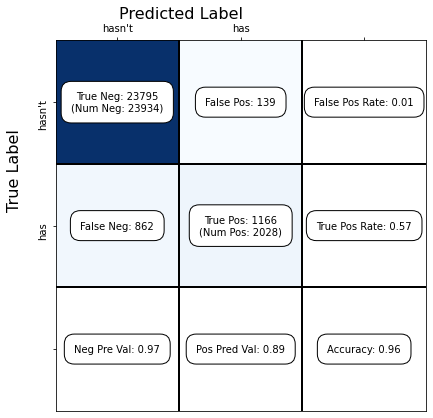

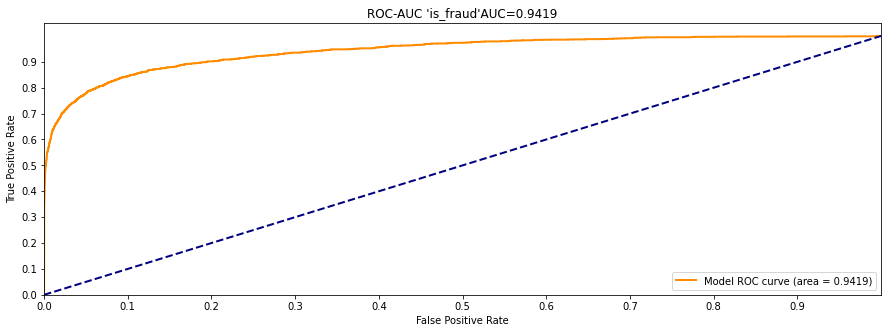

<Figure size 432x288 with 0 Axes>

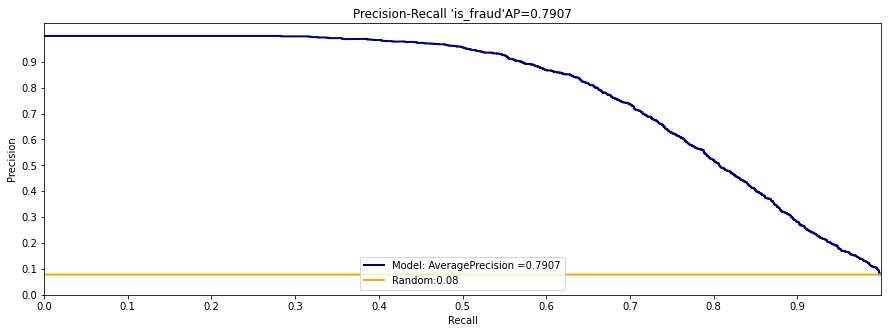

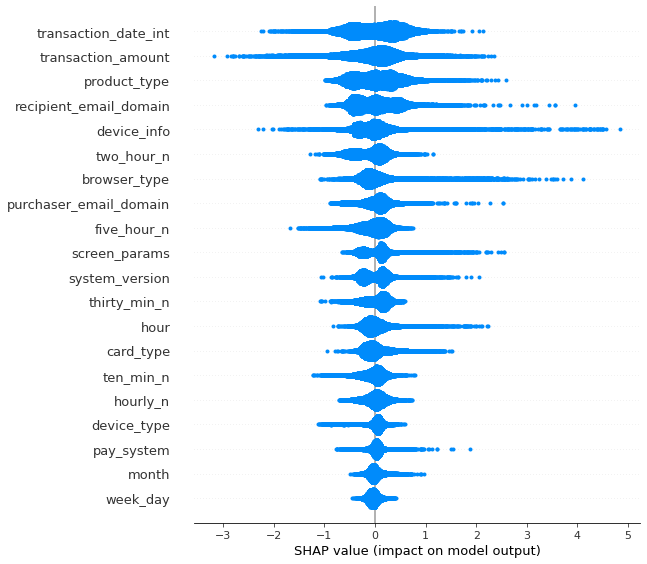

0:	learn: 0.5896410	test: 0.5896351	test1: 0.5889847	test2: 0.5903376	best: 0.5903376 (0)	total: 63.3ms	remaining: 6m 19s
1:	learn: 0.5123818	test: 0.5123874	test1: 0.5109115	test2: 0.5135225	best: 0.5135225 (1)	total: 111ms	remaining: 5m 33s
2:	learn: 0.4504405	test: 0.4503454	test1: 0.4486255	test2: 0.4519541	best: 0.4519541 (2)	total: 150ms	remaining: 5m
3:	learn: 0.3992828	test: 0.3994342	test1: 0.3970384	test2: 0.4014485	best: 0.4014485 (3)	total: 216ms	remaining: 5m 23s
4:	learn: 0.3668137	test: 0.3669361	test1: 0.3642854	test2: 0.3692773	best: 0.3692773 (4)	total: 232ms	remaining: 4m 38s
5:	learn: 0.3386388	test: 0.3387453	test1: 0.3362916	test2: 0.3414487	best: 0.3414487 (5)	total: 279ms	remaining: 4m 38s
6:	learn: 0.3160132	test: 0.3159660	test1: 0.3136399	test2: 0.3190495	best: 0.3190495 (6)	total: 330ms	remaining: 4m 42s
7:	learn: 0.2968110	test: 0.2961711	test1: 0.2938155	test2: 0.2997470	best: 0.2997470 (7)	total: 375ms	remaining: 4m 40s
8:	learn: 0.2839406	test: 0.2827207

67:	learn: 0.1732629	test: 0.1357895	test1: 0.1597662	test2: 0.1671290	best: 0.1671290 (67)	total: 3.85s	remaining: 5m 36s
68:	learn: 0.1728639	test: 0.1353508	test1: 0.1595318	test2: 0.1668024	best: 0.1668024 (68)	total: 3.92s	remaining: 5m 36s
69:	learn: 0.1724490	test: 0.1349402	test1: 0.1590729	test2: 0.1664240	best: 0.1664240 (69)	total: 3.98s	remaining: 5m 36s
70:	learn: 0.1723011	test: 0.1348243	test1: 0.1589991	test2: 0.1662894	best: 0.1662894 (70)	total: 4.03s	remaining: 5m 36s
71:	learn: 0.1718564	test: 0.1342124	test1: 0.1585788	test2: 0.1658757	best: 0.1658757 (71)	total: 4.08s	remaining: 5m 36s
72:	learn: 0.1715119	test: 0.1338371	test1: 0.1583074	test2: 0.1655105	best: 0.1655105 (72)	total: 4.13s	remaining: 5m 35s
73:	learn: 0.1711008	test: 0.1331952	test1: 0.1577639	test2: 0.1649541	best: 0.1649541 (73)	total: 4.17s	remaining: 5m 34s
74:	learn: 0.1708444	test: 0.1329222	test1: 0.1576067	test2: 0.1647034	best: 0.1647034 (74)	total: 4.24s	remaining: 5m 35s
75:	learn: 0.170

137:	learn: 0.1601600	test: 0.1188365	test1: 0.1482797	test2: 0.1558000	best: 0.1557868 (135)	total: 7.97s	remaining: 5m 38s
138:	learn: 0.1600116	test: 0.1187077	test1: 0.1482123	test2: 0.1556871	best: 0.1556871 (138)	total: 8.02s	remaining: 5m 37s
139:	learn: 0.1598689	test: 0.1185822	test1: 0.1482015	test2: 0.1556661	best: 0.1556661 (139)	total: 8.08s	remaining: 5m 38s
140:	learn: 0.1598084	test: 0.1185477	test1: 0.1482303	test2: 0.1556490	best: 0.1556490 (140)	total: 8.13s	remaining: 5m 37s
141:	learn: 0.1597133	test: 0.1184745	test1: 0.1481686	test2: 0.1556398	best: 0.1556398 (141)	total: 8.18s	remaining: 5m 37s
142:	learn: 0.1596031	test: 0.1184194	test1: 0.1481601	test2: 0.1556317	best: 0.1556317 (142)	total: 8.23s	remaining: 5m 36s
143:	learn: 0.1593702	test: 0.1182398	test1: 0.1480104	test2: 0.1554237	best: 0.1554237 (143)	total: 8.28s	remaining: 5m 36s
144:	learn: 0.1592120	test: 0.1181012	test1: 0.1478434	test2: 0.1553574	best: 0.1553574 (144)	total: 8.32s	remaining: 5m 36s


205:	learn: 0.1534646	test: 0.1128411	test1: 0.1440117	test2: 0.1518617	best: 0.1518617 (205)	total: 11.5s	remaining: 5m 23s
206:	learn: 0.1533858	test: 0.1127991	test1: 0.1439583	test2: 0.1518235	best: 0.1518235 (206)	total: 11.6s	remaining: 5m 23s
207:	learn: 0.1533341	test: 0.1127549	test1: 0.1439166	test2: 0.1518195	best: 0.1518195 (207)	total: 11.6s	remaining: 5m 23s
208:	learn: 0.1530845	test: 0.1102750	test1: 0.1436158	test2: 0.1514665	best: 0.1514665 (208)	total: 11.7s	remaining: 5m 23s
209:	learn: 0.1530483	test: 0.1102567	test1: 0.1436020	test2: 0.1514553	best: 0.1514553 (209)	total: 11.7s	remaining: 5m 23s
210:	learn: 0.1530002	test: 0.1102270	test1: 0.1435729	test2: 0.1514206	best: 0.1514206 (210)	total: 11.8s	remaining: 5m 23s
211:	learn: 0.1529126	test: 0.1101719	test1: 0.1435578	test2: 0.1513884	best: 0.1513884 (211)	total: 11.8s	remaining: 5m 23s
212:	learn: 0.1528994	test: 0.1101633	test1: 0.1435685	test2: 0.1513945	best: 0.1513884 (211)	total: 11.9s	remaining: 5m 22s


272:	learn: 0.1482019	test: 0.0988014	test1: 0.1401536	test2: 0.1482222	best: 0.1482222 (272)	total: 15.1s	remaining: 5m 15s
273:	learn: 0.1481674	test: 0.0988115	test1: 0.1401821	test2: 0.1482310	best: 0.1482222 (272)	total: 15.1s	remaining: 5m 15s
274:	learn: 0.1480639	test: 0.0987714	test1: 0.1401541	test2: 0.1482010	best: 0.1482010 (274)	total: 15.2s	remaining: 5m 16s
275:	learn: 0.1480012	test: 0.0985644	test1: 0.1400793	test2: 0.1480898	best: 0.1480898 (275)	total: 15.2s	remaining: 5m 16s
276:	learn: 0.1479123	test: 0.0984904	test1: 0.1400439	test2: 0.1480384	best: 0.1480384 (276)	total: 15.3s	remaining: 5m 16s
277:	learn: 0.1478754	test: 0.0984646	test1: 0.1400265	test2: 0.1480373	best: 0.1480373 (277)	total: 15.3s	remaining: 5m 15s
278:	learn: 0.1478334	test: 0.0984564	test1: 0.1400214	test2: 0.1480308	best: 0.1480308 (278)	total: 15.4s	remaining: 5m 15s
279:	learn: 0.1477338	test: 0.0983472	test1: 0.1399871	test2: 0.1479671	best: 0.1479671 (279)	total: 15.4s	remaining: 5m 15s


341:	learn: 0.1434504	test: 0.0925632	test1: 0.1376918	test2: 0.1456550	best: 0.1456550 (341)	total: 18.9s	remaining: 5m 12s
342:	learn: 0.1433817	test: 0.0925032	test1: 0.1376828	test2: 0.1456239	best: 0.1456239 (342)	total: 18.9s	remaining: 5m 12s
343:	learn: 0.1433199	test: 0.0924788	test1: 0.1376542	test2: 0.1456216	best: 0.1456216 (343)	total: 19s	remaining: 5m 12s
344:	learn: 0.1432991	test: 0.0924606	test1: 0.1376458	test2: 0.1456249	best: 0.1456216 (343)	total: 19s	remaining: 5m 12s
345:	learn: 0.1432312	test: 0.0924408	test1: 0.1375977	test2: 0.1456283	best: 0.1456216 (343)	total: 19.1s	remaining: 5m 11s
346:	learn: 0.1431760	test: 0.0924024	test1: 0.1375949	test2: 0.1455966	best: 0.1455966 (346)	total: 19.1s	remaining: 5m 11s
347:	learn: 0.1431249	test: 0.0923641	test1: 0.1375687	test2: 0.1455863	best: 0.1455863 (347)	total: 19.2s	remaining: 5m 11s
348:	learn: 0.1430689	test: 0.0923582	test1: 0.1375715	test2: 0.1455790	best: 0.1455790 (348)	total: 19.3s	remaining: 5m 11s
349:

409:	learn: 0.1395573	test: 0.0873547	test1: 0.1361732	test2: 0.1441434	best: 0.1441434 (409)	total: 22.7s	remaining: 5m 10s
410:	learn: 0.1395309	test: 0.0873315	test1: 0.1361370	test2: 0.1441417	best: 0.1441417 (410)	total: 22.8s	remaining: 5m 9s
411:	learn: 0.1394627	test: 0.0872550	test1: 0.1360538	test2: 0.1440846	best: 0.1440846 (411)	total: 22.8s	remaining: 5m 9s
412:	learn: 0.1394502	test: 0.0872550	test1: 0.1360601	test2: 0.1440860	best: 0.1440846 (411)	total: 22.9s	remaining: 5m 9s
413:	learn: 0.1394098	test: 0.0872413	test1: 0.1360446	test2: 0.1440652	best: 0.1440652 (413)	total: 23s	remaining: 5m 9s
414:	learn: 0.1393615	test: 0.0872099	test1: 0.1360297	test2: 0.1440675	best: 0.1440652 (413)	total: 23s	remaining: 5m 9s
415:	learn: 0.1393208	test: 0.0872099	test1: 0.1360297	test2: 0.1440589	best: 0.1440589 (415)	total: 23.1s	remaining: 5m 9s
416:	learn: 0.1392926	test: 0.0872095	test1: 0.1360238	test2: 0.1440618	best: 0.1440589 (415)	total: 23.1s	remaining: 5m 9s
417:	learn:

476:	learn: 0.1366133	test: 0.0854588	test1: 0.1347177	test2: 0.1432423	best: 0.1432423 (476)	total: 26.3s	remaining: 5m 4s
477:	learn: 0.1365999	test: 0.0854541	test1: 0.1347065	test2: 0.1432451	best: 0.1432423 (476)	total: 26.4s	remaining: 5m 4s
478:	learn: 0.1365624	test: 0.0854307	test1: 0.1347300	test2: 0.1432634	best: 0.1432423 (476)	total: 26.4s	remaining: 5m 4s
479:	learn: 0.1365483	test: 0.0854196	test1: 0.1347219	test2: 0.1432623	best: 0.1432423 (476)	total: 26.5s	remaining: 5m 4s
480:	learn: 0.1364937	test: 0.0853655	test1: 0.1346827	test2: 0.1432536	best: 0.1432423 (476)	total: 26.5s	remaining: 5m 4s
481:	learn: 0.1364412	test: 0.0853382	test1: 0.1346602	test2: 0.1432617	best: 0.1432423 (476)	total: 26.6s	remaining: 5m 4s
482:	learn: 0.1363846	test: 0.0852872	test1: 0.1345934	test2: 0.1431969	best: 0.1431969 (482)	total: 26.6s	remaining: 5m 4s
483:	learn: 0.1363629	test: 0.0852822	test1: 0.1345827	test2: 0.1431929	best: 0.1431929 (483)	total: 26.7s	remaining: 5m 4s
484:	lea

546:	learn: 0.1330765	test: 0.0829426	test1: 0.1334422	test2: 0.1417642	best: 0.1417602 (545)	total: 30.1s	remaining: 5m
547:	learn: 0.1330297	test: 0.0829258	test1: 0.1334090	test2: 0.1417341	best: 0.1417341 (547)	total: 30.2s	remaining: 5m
548:	learn: 0.1329960	test: 0.0829153	test1: 0.1333799	test2: 0.1417148	best: 0.1417148 (548)	total: 30.2s	remaining: 4m 59s
549:	learn: 0.1329268	test: 0.0828734	test1: 0.1333217	test2: 0.1416625	best: 0.1416625 (549)	total: 30.3s	remaining: 4m 59s
550:	learn: 0.1328930	test: 0.0828415	test1: 0.1332939	test2: 0.1416308	best: 0.1416308 (550)	total: 30.3s	remaining: 4m 59s
551:	learn: 0.1328892	test: 0.0828434	test1: 0.1332944	test2: 0.1416309	best: 0.1416308 (550)	total: 30.4s	remaining: 4m 59s
552:	learn: 0.1328261	test: 0.0827978	test1: 0.1332401	test2: 0.1415916	best: 0.1415916 (552)	total: 30.4s	remaining: 4m 59s
553:	learn: 0.1327831	test: 0.0827914	test1: 0.1332243	test2: 0.1415688	best: 0.1415688 (553)	total: 30.5s	remaining: 4m 59s
554:	lea

613:	learn: 0.1299540	test: 0.0807453	test1: 0.1324275	test2: 0.1405895	best: 0.1405895 (613)	total: 33.6s	remaining: 4m 54s
614:	learn: 0.1299435	test: 0.0807501	test1: 0.1324302	test2: 0.1405861	best: 0.1405861 (614)	total: 33.7s	remaining: 4m 54s
615:	learn: 0.1299309	test: 0.0807402	test1: 0.1324311	test2: 0.1405874	best: 0.1405861 (614)	total: 33.7s	remaining: 4m 54s
616:	learn: 0.1298880	test: 0.0807333	test1: 0.1324487	test2: 0.1405850	best: 0.1405850 (616)	total: 33.8s	remaining: 4m 54s
617:	learn: 0.1298793	test: 0.0807304	test1: 0.1324482	test2: 0.1405870	best: 0.1405850 (616)	total: 33.8s	remaining: 4m 54s
618:	learn: 0.1298345	test: 0.0806923	test1: 0.1324338	test2: 0.1405691	best: 0.1405691 (618)	total: 33.9s	remaining: 4m 54s
619:	learn: 0.1297684	test: 0.0806429	test1: 0.1324082	test2: 0.1405453	best: 0.1405453 (619)	total: 33.9s	remaining: 4m 54s
620:	learn: 0.1296669	test: 0.0805626	test1: 0.1323318	test2: 0.1404986	best: 0.1404986 (620)	total: 34s	remaining: 4m 54s
62

682:	learn: 0.1272876	test: 0.0786743	test1: 0.1313990	test2: 0.1398072	best: 0.1398072 (682)	total: 37.5s	remaining: 4m 52s
683:	learn: 0.1272401	test: 0.0786589	test1: 0.1313921	test2: 0.1397947	best: 0.1397947 (683)	total: 37.6s	remaining: 4m 52s
684:	learn: 0.1271416	test: 0.0785723	test1: 0.1313784	test2: 0.1397298	best: 0.1397298 (684)	total: 37.6s	remaining: 4m 51s
685:	learn: 0.1270882	test: 0.0785358	test1: 0.1313445	test2: 0.1397076	best: 0.1397076 (685)	total: 37.7s	remaining: 4m 51s
686:	learn: 0.1270368	test: 0.0783765	test1: 0.1312360	test2: 0.1396390	best: 0.1396390 (686)	total: 37.7s	remaining: 4m 51s
687:	learn: 0.1269981	test: 0.0783516	test1: 0.1312197	test2: 0.1396176	best: 0.1396176 (687)	total: 37.8s	remaining: 4m 51s
688:	learn: 0.1269466	test: 0.0783246	test1: 0.1311737	test2: 0.1395860	best: 0.1395860 (688)	total: 37.9s	remaining: 4m 51s
689:	learn: 0.1269035	test: 0.0783128	test1: 0.1311553	test2: 0.1395860	best: 0.1395860 (688)	total: 37.9s	remaining: 4m 51s


750:	learn: 0.1248618	test: 0.0770966	test1: 0.1303371	test2: 0.1390099	best: 0.1389973 (746)	total: 41.1s	remaining: 4m 47s
751:	learn: 0.1248054	test: 0.0770629	test1: 0.1303107	test2: 0.1389705	best: 0.1389705 (751)	total: 41.1s	remaining: 4m 47s
752:	learn: 0.1247981	test: 0.0770615	test1: 0.1303078	test2: 0.1389700	best: 0.1389700 (752)	total: 41.2s	remaining: 4m 47s
753:	learn: 0.1247879	test: 0.0770595	test1: 0.1303010	test2: 0.1389719	best: 0.1389700 (752)	total: 41.2s	remaining: 4m 46s
754:	learn: 0.1247087	test: 0.0770032	test1: 0.1302456	test2: 0.1389310	best: 0.1389310 (754)	total: 41.3s	remaining: 4m 46s
755:	learn: 0.1246885	test: 0.0769980	test1: 0.1302318	test2: 0.1389223	best: 0.1389223 (755)	total: 41.4s	remaining: 4m 46s
756:	learn: 0.1246579	test: 0.0769990	test1: 0.1302230	test2: 0.1389138	best: 0.1389138 (756)	total: 41.4s	remaining: 4m 46s
757:	learn: 0.1245964	test: 0.0769544	test1: 0.1302016	test2: 0.1388865	best: 0.1388865 (757)	total: 41.5s	remaining: 4m 46s


819:	learn: 0.1222293	test: 0.0753783	test1: 0.1293504	test2: 0.1380379	best: 0.1380379 (819)	total: 44.8s	remaining: 4m 42s
820:	learn: 0.1221530	test: 0.0753124	test1: 0.1293597	test2: 0.1380243	best: 0.1380243 (820)	total: 44.8s	remaining: 4m 42s
821:	learn: 0.1221372	test: 0.0753081	test1: 0.1293537	test2: 0.1380285	best: 0.1380243 (820)	total: 44.9s	remaining: 4m 42s
822:	learn: 0.1220839	test: 0.0752715	test1: 0.1293371	test2: 0.1380022	best: 0.1380022 (822)	total: 44.9s	remaining: 4m 42s
823:	learn: 0.1220332	test: 0.0752514	test1: 0.1293208	test2: 0.1379883	best: 0.1379883 (823)	total: 45s	remaining: 4m 42s
824:	learn: 0.1220123	test: 0.0752584	test1: 0.1293194	test2: 0.1379962	best: 0.1379883 (823)	total: 45s	remaining: 4m 42s
825:	learn: 0.1219930	test: 0.0752583	test1: 0.1293306	test2: 0.1379795	best: 0.1379795 (825)	total: 45.1s	remaining: 4m 42s
826:	learn: 0.1219480	test: 0.0752593	test1: 0.1293319	test2: 0.1379726	best: 0.1379726 (826)	total: 45.1s	remaining: 4m 42s
827:

887:	learn: 0.1197641	test: 0.0738407	test1: 0.1285029	test2: 0.1371776	best: 0.1371776 (887)	total: 48.3s	remaining: 4m 38s
888:	learn: 0.1196564	test: 0.0737659	test1: 0.1284290	test2: 0.1370776	best: 0.1370776 (888)	total: 48.4s	remaining: 4m 38s
889:	learn: 0.1195823	test: 0.0737369	test1: 0.1283944	test2: 0.1370213	best: 0.1370213 (889)	total: 48.5s	remaining: 4m 38s
890:	learn: 0.1195629	test: 0.0737341	test1: 0.1284020	test2: 0.1370376	best: 0.1370213 (889)	total: 48.5s	remaining: 4m 38s
891:	learn: 0.1195550	test: 0.0737390	test1: 0.1284052	test2: 0.1370337	best: 0.1370213 (889)	total: 48.6s	remaining: 4m 38s
892:	learn: 0.1195220	test: 0.0737261	test1: 0.1283927	test2: 0.1370146	best: 0.1370146 (892)	total: 48.6s	remaining: 4m 38s
893:	learn: 0.1194797	test: 0.0737007	test1: 0.1283871	test2: 0.1370008	best: 0.1370008 (893)	total: 48.7s	remaining: 4m 37s
894:	learn: 0.1194094	test: 0.0736740	test1: 0.1283595	test2: 0.1369766	best: 0.1369766 (894)	total: 48.7s	remaining: 4m 37s


955:	learn: 0.1174962	test: 0.0727609	test1: 0.1275925	test2: 0.1366039	best: 0.1365566 (948)	total: 52s	remaining: 4m 34s
956:	learn: 0.1174267	test: 0.0727161	test1: 0.1275444	test2: 0.1365495	best: 0.1365495 (956)	total: 52s	remaining: 4m 34s
957:	learn: 0.1173813	test: 0.0726957	test1: 0.1275900	test2: 0.1365484	best: 0.1365484 (957)	total: 52.1s	remaining: 4m 34s
958:	learn: 0.1173541	test: 0.0726911	test1: 0.1275864	test2: 0.1365477	best: 0.1365477 (958)	total: 52.1s	remaining: 4m 34s
959:	learn: 0.1172889	test: 0.0726472	test1: 0.1276173	test2: 0.1365058	best: 0.1365058 (959)	total: 52.2s	remaining: 4m 33s
960:	learn: 0.1172633	test: 0.0726438	test1: 0.1276167	test2: 0.1365090	best: 0.1365058 (959)	total: 52.2s	remaining: 4m 33s
961:	learn: 0.1172023	test: 0.0725957	test1: 0.1276261	test2: 0.1364950	best: 0.1364950 (961)	total: 52.3s	remaining: 4m 33s
962:	learn: 0.1171551	test: 0.0724866	test1: 0.1275680	test2: 0.1364431	best: 0.1364431 (962)	total: 52.3s	remaining: 4m 33s
963:

1023:	learn: 0.1149733	test: 0.0712150	test1: 0.1270328	test2: 0.1357359	best: 0.1357359 (1023)	total: 55.5s	remaining: 4m 29s
1024:	learn: 0.1149581	test: 0.0712156	test1: 0.1270267	test2: 0.1357315	best: 0.1357315 (1024)	total: 55.5s	remaining: 4m 29s
1025:	learn: 0.1149160	test: 0.0711834	test1: 0.1270239	test2: 0.1357230	best: 0.1357230 (1025)	total: 55.6s	remaining: 4m 29s
1026:	learn: 0.1148939	test: 0.0711843	test1: 0.1270055	test2: 0.1357115	best: 0.1357115 (1026)	total: 55.6s	remaining: 4m 29s
1027:	learn: 0.1148677	test: 0.0711703	test1: 0.1270137	test2: 0.1357036	best: 0.1357036 (1027)	total: 55.7s	remaining: 4m 29s
1028:	learn: 0.1148190	test: 0.0711414	test1: 0.1270115	test2: 0.1357173	best: 0.1357036 (1027)	total: 55.7s	remaining: 4m 29s
1029:	learn: 0.1147296	test: 0.0710848	test1: 0.1269663	test2: 0.1356384	best: 0.1356384 (1029)	total: 55.8s	remaining: 4m 29s
1030:	learn: 0.1147227	test: 0.0710857	test1: 0.1269570	test2: 0.1356310	best: 0.1356310 (1030)	total: 55.8s	re

1088:	learn: 0.1127699	test: 0.0700367	test1: 0.1262514	test2: 0.1352595	best: 0.1352502 (1084)	total: 58.9s	remaining: 4m 25s
1089:	learn: 0.1127667	test: 0.0700368	test1: 0.1262549	test2: 0.1352616	best: 0.1352502 (1084)	total: 58.9s	remaining: 4m 25s
1090:	learn: 0.1127257	test: 0.0700206	test1: 0.1262206	test2: 0.1352467	best: 0.1352467 (1090)	total: 59s	remaining: 4m 25s
1091:	learn: 0.1127050	test: 0.0700131	test1: 0.1262276	test2: 0.1352298	best: 0.1352298 (1091)	total: 59s	remaining: 4m 25s
1092:	learn: 0.1126771	test: 0.0699962	test1: 0.1262132	test2: 0.1352119	best: 0.1352119 (1092)	total: 59.1s	remaining: 4m 25s
1093:	learn: 0.1126708	test: 0.0699927	test1: 0.1262094	test2: 0.1352157	best: 0.1352119 (1092)	total: 59.1s	remaining: 4m 25s
1094:	learn: 0.1126481	test: 0.0699835	test1: 0.1261894	test2: 0.1351921	best: 0.1351921 (1094)	total: 59.2s	remaining: 4m 25s
1095:	learn: 0.1126280	test: 0.0699797	test1: 0.1261872	test2: 0.1352065	best: 0.1351921 (1094)	total: 59.3s	remain

1155:	learn: 0.1107291	test: 0.0685339	test1: 0.1255047	test2: 0.1345632	best: 0.1345575 (1154)	total: 1m 2s	remaining: 4m 21s
1156:	learn: 0.1107016	test: 0.0685236	test1: 0.1255064	test2: 0.1345824	best: 0.1345575 (1154)	total: 1m 2s	remaining: 4m 21s
1157:	learn: 0.1106963	test: 0.0685259	test1: 0.1255052	test2: 0.1345826	best: 0.1345575 (1154)	total: 1m 2s	remaining: 4m 21s
1158:	learn: 0.1106601	test: 0.0685090	test1: 0.1254742	test2: 0.1345786	best: 0.1345575 (1154)	total: 1m 2s	remaining: 4m 21s
1159:	learn: 0.1106037	test: 0.0684652	test1: 0.1254393	test2: 0.1345449	best: 0.1345449 (1159)	total: 1m 2s	remaining: 4m 21s
1160:	learn: 0.1105687	test: 0.0684568	test1: 0.1254306	test2: 0.1345493	best: 0.1345449 (1159)	total: 1m 2s	remaining: 4m 21s
1161:	learn: 0.1105241	test: 0.0684269	test1: 0.1254093	test2: 0.1345470	best: 0.1345449 (1159)	total: 1m 2s	remaining: 4m 21s
1162:	learn: 0.1104586	test: 0.0683855	test1: 0.1253368	test2: 0.1345323	best: 0.1345323 (1162)	total: 1m 2s	re

1223:	learn: 0.1086240	test: 0.0674145	test1: 0.1249512	test2: 0.1340088	best: 0.1340088 (1223)	total: 1m 6s	remaining: 4m 18s
1224:	learn: 0.1085937	test: 0.0673903	test1: 0.1249152	test2: 0.1340255	best: 0.1340088 (1223)	total: 1m 6s	remaining: 4m 17s
1225:	learn: 0.1085744	test: 0.0673834	test1: 0.1249218	test2: 0.1340253	best: 0.1340088 (1223)	total: 1m 6s	remaining: 4m 17s
1226:	learn: 0.1085214	test: 0.0673566	test1: 0.1248918	test2: 0.1339985	best: 0.1339985 (1226)	total: 1m 6s	remaining: 4m 17s
1227:	learn: 0.1085148	test: 0.0673552	test1: 0.1248901	test2: 0.1339982	best: 0.1339982 (1227)	total: 1m 6s	remaining: 4m 17s
1228:	learn: 0.1085004	test: 0.0673529	test1: 0.1248737	test2: 0.1340061	best: 0.1339982 (1227)	total: 1m 6s	remaining: 4m 17s
1229:	learn: 0.1084257	test: 0.0673036	test1: 0.1248365	test2: 0.1339681	best: 0.1339681 (1229)	total: 1m 6s	remaining: 4m 17s
1230:	learn: 0.1084228	test: 0.0673028	test1: 0.1248449	test2: 0.1339736	best: 0.1339681 (1229)	total: 1m 6s	re

1289:	learn: 0.1067749	test: 0.0664439	test1: 0.1246736	test2: 0.1338032	best: 0.1338001 (1287)	total: 1m 9s	remaining: 4m 14s
1290:	learn: 0.1067579	test: 0.0664410	test1: 0.1246786	test2: 0.1338091	best: 0.1338001 (1287)	total: 1m 9s	remaining: 4m 14s
1291:	learn: 0.1067275	test: 0.0664279	test1: 0.1246719	test2: 0.1337940	best: 0.1337940 (1291)	total: 1m 9s	remaining: 4m 14s
1292:	learn: 0.1066994	test: 0.0664201	test1: 0.1246650	test2: 0.1338020	best: 0.1337940 (1291)	total: 1m 9s	remaining: 4m 14s
1293:	learn: 0.1066605	test: 0.0663941	test1: 0.1246359	test2: 0.1337638	best: 0.1337638 (1293)	total: 1m 9s	remaining: 4m 14s
1294:	learn: 0.1066381	test: 0.0663859	test1: 0.1246201	test2: 0.1337846	best: 0.1337638 (1293)	total: 1m 9s	remaining: 4m 13s
1295:	learn: 0.1066155	test: 0.0663750	test1: 0.1246120	test2: 0.1337887	best: 0.1337638 (1293)	total: 1m 9s	remaining: 4m 13s
1296:	learn: 0.1065723	test: 0.0663506	test1: 0.1246412	test2: 0.1337853	best: 0.1337638 (1293)	total: 1m 10s	r

1357:	learn: 0.1047997	test: 0.0654607	test1: 0.1243902	test2: 0.1333779	best: 0.1333779 (1357)	total: 1m 13s	remaining: 4m 11s
1358:	learn: 0.1047901	test: 0.0654553	test1: 0.1243799	test2: 0.1333903	best: 0.1333779 (1357)	total: 1m 13s	remaining: 4m 11s
1359:	learn: 0.1047810	test: 0.0654510	test1: 0.1243926	test2: 0.1333893	best: 0.1333779 (1357)	total: 1m 13s	remaining: 4m 11s
1360:	learn: 0.1047490	test: 0.0654466	test1: 0.1244037	test2: 0.1333944	best: 0.1333779 (1357)	total: 1m 13s	remaining: 4m 10s
1361:	learn: 0.1046940	test: 0.0654332	test1: 0.1243882	test2: 0.1333902	best: 0.1333779 (1357)	total: 1m 13s	remaining: 4m 10s
1362:	learn: 0.1046489	test: 0.0653937	test1: 0.1243743	test2: 0.1333560	best: 0.1333560 (1362)	total: 1m 13s	remaining: 4m 10s
1363:	learn: 0.1046351	test: 0.0653894	test1: 0.1243676	test2: 0.1333459	best: 0.1333459 (1363)	total: 1m 13s	remaining: 4m 10s
1364:	learn: 0.1046246	test: 0.0653884	test1: 0.1243660	test2: 0.1333410	best: 0.1333410 (1364)	total: 1

1425:	learn: 0.1028941	test: 0.0644646	test1: 0.1240300	test2: 0.1330130	best: 0.1330130 (1425)	total: 1m 17s	remaining: 4m 7s
1426:	learn: 0.1028608	test: 0.0644464	test1: 0.1240050	test2: 0.1330037	best: 0.1330037 (1426)	total: 1m 17s	remaining: 4m 7s
1427:	learn: 0.1028256	test: 0.0644267	test1: 0.1240051	test2: 0.1329920	best: 0.1329920 (1427)	total: 1m 17s	remaining: 4m 7s
1428:	learn: 0.1027663	test: 0.0643848	test1: 0.1239903	test2: 0.1329878	best: 0.1329878 (1428)	total: 1m 17s	remaining: 4m 7s
1429:	learn: 0.1027168	test: 0.0643472	test1: 0.1239360	test2: 0.1329833	best: 0.1329833 (1429)	total: 1m 17s	remaining: 4m 7s
1430:	learn: 0.1026946	test: 0.0643408	test1: 0.1239378	test2: 0.1329764	best: 0.1329764 (1430)	total: 1m 17s	remaining: 4m 7s
1431:	learn: 0.1026907	test: 0.0643402	test1: 0.1239446	test2: 0.1329748	best: 0.1329748 (1431)	total: 1m 17s	remaining: 4m 7s
1432:	learn: 0.1026769	test: 0.0643374	test1: 0.1239419	test2: 0.1329672	best: 0.1329672 (1432)	total: 1m 17s	r

1493:	learn: 0.1009759	test: 0.0634573	test1: 0.1237249	test2: 0.1327797	best: 0.1327797 (1493)	total: 1m 20s	remaining: 4m 3s
1494:	learn: 0.1009479	test: 0.0634393	test1: 0.1236947	test2: 0.1327662	best: 0.1327662 (1494)	total: 1m 20s	remaining: 4m 3s
1495:	learn: 0.1009212	test: 0.0634176	test1: 0.1236889	test2: 0.1327467	best: 0.1327467 (1495)	total: 1m 21s	remaining: 4m 3s
1496:	learn: 0.1009063	test: 0.0634108	test1: 0.1236948	test2: 0.1327467	best: 0.1327467 (1495)	total: 1m 21s	remaining: 4m 3s
1497:	learn: 0.1009015	test: 0.0634257	test1: 0.1237021	test2: 0.1327595	best: 0.1327467 (1495)	total: 1m 21s	remaining: 4m 3s
1498:	learn: 0.1008742	test: 0.0634183	test1: 0.1236816	test2: 0.1327458	best: 0.1327458 (1498)	total: 1m 21s	remaining: 4m 3s
1499:	learn: 0.1008627	test: 0.0634122	test1: 0.1236918	test2: 0.1327432	best: 0.1327432 (1499)	total: 1m 21s	remaining: 4m 3s
1500:	learn: 0.1008525	test: 0.0634071	test1: 0.1236891	test2: 0.1327424	best: 0.1327424 (1500)	total: 1m 21s	r

1561:	learn: 0.0997201	test: 0.0625892	test1: 0.1236341	test2: 0.1325823	best: 0.1325539 (1554)	total: 1m 24s	remaining: 4m
1562:	learn: 0.0996803	test: 0.0625723	test1: 0.1236442	test2: 0.1325643	best: 0.1325539 (1554)	total: 1m 24s	remaining: 4m
1563:	learn: 0.0996380	test: 0.0625510	test1: 0.1236449	test2: 0.1325637	best: 0.1325539 (1554)	total: 1m 24s	remaining: 4m
1564:	learn: 0.0996289	test: 0.0625579	test1: 0.1236488	test2: 0.1325655	best: 0.1325539 (1554)	total: 1m 24s	remaining: 4m
1565:	learn: 0.0996060	test: 0.0625481	test1: 0.1236388	test2: 0.1325710	best: 0.1325539 (1554)	total: 1m 24s	remaining: 4m
1566:	learn: 0.0995852	test: 0.0625408	test1: 0.1236416	test2: 0.1325514	best: 0.1325514 (1566)	total: 1m 24s	remaining: 4m
1567:	learn: 0.0995490	test: 0.0625206	test1: 0.1236432	test2: 0.1325642	best: 0.1325514 (1566)	total: 1m 25s	remaining: 4m
1568:	learn: 0.0995443	test: 0.0625218	test1: 0.1236433	test2: 0.1325643	best: 0.1325514 (1566)	total: 1m 25s	remaining: 4m
1569:	le

1627:	learn: 0.0979161	test: 0.0616186	test1: 0.1232369	test2: 0.1320763	best: 0.1320763 (1627)	total: 1m 28s	remaining: 3m 56s
1628:	learn: 0.0979037	test: 0.0616155	test1: 0.1232333	test2: 0.1320810	best: 0.1320763 (1627)	total: 1m 28s	remaining: 3m 56s
1629:	learn: 0.0978500	test: 0.0615705	test1: 0.1232196	test2: 0.1320385	best: 0.1320385 (1629)	total: 1m 28s	remaining: 3m 56s
1630:	learn: 0.0977902	test: 0.0615331	test1: 0.1231813	test2: 0.1319926	best: 0.1319926 (1630)	total: 1m 28s	remaining: 3m 56s
1631:	learn: 0.0977764	test: 0.0615307	test1: 0.1231907	test2: 0.1319888	best: 0.1319888 (1631)	total: 1m 28s	remaining: 3m 56s
1632:	learn: 0.0977260	test: 0.0615075	test1: 0.1231532	test2: 0.1319675	best: 0.1319675 (1632)	total: 1m 28s	remaining: 3m 56s
1633:	learn: 0.0976809	test: 0.0614785	test1: 0.1231763	test2: 0.1319455	best: 0.1319455 (1633)	total: 1m 28s	remaining: 3m 56s
1634:	learn: 0.0976490	test: 0.0614561	test1: 0.1231670	test2: 0.1319301	best: 0.1319301 (1634)	total: 1

1693:	learn: 0.0962236	test: 0.0606703	test1: 0.1228078	test2: 0.1317247	best: 0.1317068 (1684)	total: 1m 31s	remaining: 3m 53s
1694:	learn: 0.0962214	test: 0.0606706	test1: 0.1228063	test2: 0.1317243	best: 0.1317068 (1684)	total: 1m 31s	remaining: 3m 53s
1695:	learn: 0.0961821	test: 0.0606420	test1: 0.1228111	test2: 0.1317218	best: 0.1317068 (1684)	total: 1m 31s	remaining: 3m 53s
1696:	learn: 0.0961713	test: 0.0606401	test1: 0.1228227	test2: 0.1317225	best: 0.1317068 (1684)	total: 1m 31s	remaining: 3m 53s
1697:	learn: 0.0961668	test: 0.0606373	test1: 0.1228232	test2: 0.1317264	best: 0.1317068 (1684)	total: 1m 31s	remaining: 3m 52s
1698:	learn: 0.0961604	test: 0.0606355	test1: 0.1228206	test2: 0.1317243	best: 0.1317068 (1684)	total: 1m 32s	remaining: 3m 52s
1699:	learn: 0.0961441	test: 0.0606346	test1: 0.1228202	test2: 0.1317278	best: 0.1317068 (1684)	total: 1m 32s	remaining: 3m 52s
1700:	learn: 0.0961180	test: 0.0606104	test1: 0.1228002	test2: 0.1317232	best: 0.1317068 (1684)	total: 1

1758:	learn: 0.0946681	test: 0.0598303	test1: 0.1224987	test2: 0.1315126	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1759:	learn: 0.0946555	test: 0.0598310	test1: 0.1225080	test2: 0.1315050	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1760:	learn: 0.0946525	test: 0.0598321	test1: 0.1225066	test2: 0.1315066	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1761:	learn: 0.0946508	test: 0.0598324	test1: 0.1225072	test2: 0.1314994	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1762:	learn: 0.0946329	test: 0.0598228	test1: 0.1225149	test2: 0.1315056	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1763:	learn: 0.0946094	test: 0.0598112	test1: 0.1225030	test2: 0.1315121	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1764:	learn: 0.0945598	test: 0.0597816	test1: 0.1224941	test2: 0.1315074	best: 0.1314964 (1743)	total: 1m 35s	remaining: 3m 49s
1765:	learn: 0.0945019	test: 0.0597350	test1: 0.1224712	test2: 0.1315080	best: 0.1314964 (1743)	total: 1

1824:	learn: 0.0930451	test: 0.0588386	test1: 0.1222695	test2: 0.1312499	best: 0.1312499 (1824)	total: 1m 39s	remaining: 3m 47s
1825:	learn: 0.0930044	test: 0.0588184	test1: 0.1222466	test2: 0.1312384	best: 0.1312384 (1825)	total: 1m 39s	remaining: 3m 47s
1826:	learn: 0.0930023	test: 0.0588201	test1: 0.1222543	test2: 0.1312375	best: 0.1312375 (1826)	total: 1m 39s	remaining: 3m 47s
1827:	learn: 0.0929797	test: 0.0588078	test1: 0.1222594	test2: 0.1312252	best: 0.1312252 (1827)	total: 1m 39s	remaining: 3m 47s
1828:	learn: 0.0929567	test: 0.0587940	test1: 0.1222649	test2: 0.1312211	best: 0.1312211 (1828)	total: 1m 39s	remaining: 3m 47s
1829:	learn: 0.0929247	test: 0.0587738	test1: 0.1222764	test2: 0.1312239	best: 0.1312211 (1828)	total: 1m 39s	remaining: 3m 46s
1830:	learn: 0.0929023	test: 0.0587567	test1: 0.1222433	test2: 0.1312241	best: 0.1312211 (1828)	total: 1m 39s	remaining: 3m 46s
1831:	learn: 0.0928930	test: 0.0587562	test1: 0.1222370	test2: 0.1312210	best: 0.1312210 (1831)	total: 1

1891:	learn: 0.0915088	test: 0.0579551	test1: 0.1218091	test2: 0.1309680	best: 0.1309680 (1891)	total: 1m 43s	remaining: 3m 43s
1892:	learn: 0.0914917	test: 0.0579634	test1: 0.1218110	test2: 0.1309577	best: 0.1309577 (1892)	total: 1m 43s	remaining: 3m 43s
1893:	learn: 0.0914727	test: 0.0579555	test1: 0.1218231	test2: 0.1309637	best: 0.1309577 (1892)	total: 1m 43s	remaining: 3m 43s
1894:	learn: 0.0914603	test: 0.0579546	test1: 0.1218292	test2: 0.1309640	best: 0.1309577 (1892)	total: 1m 43s	remaining: 3m 43s
1895:	learn: 0.0914519	test: 0.0579549	test1: 0.1218311	test2: 0.1309574	best: 0.1309574 (1895)	total: 1m 43s	remaining: 3m 43s
1896:	learn: 0.0914500	test: 0.0579564	test1: 0.1218379	test2: 0.1309571	best: 0.1309571 (1896)	total: 1m 43s	remaining: 3m 43s
1897:	learn: 0.0914229	test: 0.0579548	test1: 0.1218434	test2: 0.1309447	best: 0.1309447 (1897)	total: 1m 43s	remaining: 3m 43s
1898:	learn: 0.0913786	test: 0.0579055	test1: 0.1218629	test2: 0.1309442	best: 0.1309442 (1898)	total: 1

1959:	learn: 0.0900809	test: 0.0573080	test1: 0.1216869	test2: 0.1307627	best: 0.1307558 (1941)	total: 1m 46s	remaining: 3m 40s
1960:	learn: 0.0900690	test: 0.0573019	test1: 0.1216910	test2: 0.1307723	best: 0.1307558 (1941)	total: 1m 46s	remaining: 3m 40s
1961:	learn: 0.0900311	test: 0.0572984	test1: 0.1216938	test2: 0.1307732	best: 0.1307558 (1941)	total: 1m 47s	remaining: 3m 40s
1962:	learn: 0.0900096	test: 0.0572848	test1: 0.1216827	test2: 0.1307704	best: 0.1307558 (1941)	total: 1m 47s	remaining: 3m 40s
1963:	learn: 0.0899683	test: 0.0572656	test1: 0.1216590	test2: 0.1307644	best: 0.1307558 (1941)	total: 1m 47s	remaining: 3m 40s
1964:	learn: 0.0899635	test: 0.0572620	test1: 0.1216763	test2: 0.1307737	best: 0.1307558 (1941)	total: 1m 47s	remaining: 3m 40s
1965:	learn: 0.0899086	test: 0.0572373	test1: 0.1216492	test2: 0.1307380	best: 0.1307380 (1965)	total: 1m 47s	remaining: 3m 40s
1966:	learn: 0.0898881	test: 0.0572322	test1: 0.1216526	test2: 0.1307332	best: 0.1307332 (1966)	total: 1

2027:	learn: 0.0887098	test: 0.0565657	test1: 0.1213271	test2: 0.1305099	best: 0.1305083 (2025)	total: 1m 50s	remaining: 3m 36s
2028:	learn: 0.0887062	test: 0.0565665	test1: 0.1213260	test2: 0.1305090	best: 0.1305083 (2025)	total: 1m 50s	remaining: 3m 36s
2029:	learn: 0.0886957	test: 0.0565666	test1: 0.1213284	test2: 0.1305069	best: 0.1305069 (2029)	total: 1m 50s	remaining: 3m 36s
2030:	learn: 0.0886939	test: 0.0565669	test1: 0.1213280	test2: 0.1305100	best: 0.1305069 (2029)	total: 1m 50s	remaining: 3m 36s
2031:	learn: 0.0886820	test: 0.0565585	test1: 0.1213209	test2: 0.1305064	best: 0.1305064 (2031)	total: 1m 50s	remaining: 3m 36s
2032:	learn: 0.0886534	test: 0.0565526	test1: 0.1212788	test2: 0.1304943	best: 0.1304943 (2032)	total: 1m 50s	remaining: 3m 36s
2033:	learn: 0.0886281	test: 0.0565102	test1: 0.1212846	test2: 0.1304996	best: 0.1304943 (2032)	total: 1m 51s	remaining: 3m 36s
2034:	learn: 0.0885701	test: 0.0564609	test1: 0.1212808	test2: 0.1304927	best: 0.1304927 (2034)	total: 1

2092:	learn: 0.0870046	test: 0.0556774	test1: 0.1208709	test2: 0.1304515	best: 0.1304012 (2087)	total: 1m 54s	remaining: 3m 33s
2093:	learn: 0.0869978	test: 0.0556764	test1: 0.1208692	test2: 0.1304458	best: 0.1304012 (2087)	total: 1m 54s	remaining: 3m 33s
2094:	learn: 0.0869798	test: 0.0556682	test1: 0.1208505	test2: 0.1304348	best: 0.1304012 (2087)	total: 1m 54s	remaining: 3m 33s
2095:	learn: 0.0869268	test: 0.0556354	test1: 0.1208412	test2: 0.1304005	best: 0.1304005 (2095)	total: 1m 54s	remaining: 3m 33s
2096:	learn: 0.0869122	test: 0.0556314	test1: 0.1208582	test2: 0.1304069	best: 0.1304005 (2095)	total: 1m 54s	remaining: 3m 33s
2097:	learn: 0.0868925	test: 0.0556198	test1: 0.1208559	test2: 0.1304033	best: 0.1304005 (2095)	total: 1m 54s	remaining: 3m 33s
2098:	learn: 0.0868804	test: 0.0556132	test1: 0.1208518	test2: 0.1304061	best: 0.1304005 (2095)	total: 1m 54s	remaining: 3m 33s
2099:	learn: 0.0868667	test: 0.0556036	test1: 0.1208591	test2: 0.1303851	best: 0.1303851 (2099)	total: 1

2160:	learn: 0.0854929	test: 0.0548586	test1: 0.1205703	test2: 0.1301659	best: 0.1301600 (2159)	total: 1m 58s	remaining: 3m 30s
2161:	learn: 0.0854687	test: 0.0548495	test1: 0.1205605	test2: 0.1301566	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2162:	learn: 0.0854055	test: 0.0548041	test1: 0.1205749	test2: 0.1301801	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2163:	learn: 0.0853925	test: 0.0548011	test1: 0.1205776	test2: 0.1301793	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2164:	learn: 0.0853778	test: 0.0547922	test1: 0.1205976	test2: 0.1301940	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2165:	learn: 0.0853601	test: 0.0547880	test1: 0.1206017	test2: 0.1301828	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2166:	learn: 0.0853435	test: 0.0548119	test1: 0.1205969	test2: 0.1301887	best: 0.1301566 (2161)	total: 1m 58s	remaining: 3m 29s
2167:	learn: 0.0852744	test: 0.0547636	test1: 0.1205981	test2: 0.1302071	best: 0.1301566 (2161)	total: 1

2227:	learn: 0.0840248	test: 0.0540808	test1: 0.1205632	test2: 0.1302181	best: 0.1301566 (2161)	total: 2m 1s	remaining: 3m 26s
2228:	learn: 0.0840064	test: 0.0540432	test1: 0.1205434	test2: 0.1302125	best: 0.1301566 (2161)	total: 2m 1s	remaining: 3m 26s
2229:	learn: 0.0839984	test: 0.0540418	test1: 0.1205421	test2: 0.1302211	best: 0.1301566 (2161)	total: 2m 1s	remaining: 3m 26s
2230:	learn: 0.0839910	test: 0.0540382	test1: 0.1205453	test2: 0.1302240	best: 0.1301566 (2161)	total: 2m 2s	remaining: 3m 26s
2231:	learn: 0.0839846	test: 0.0540336	test1: 0.1205476	test2: 0.1302218	best: 0.1301566 (2161)	total: 2m 2s	remaining: 3m 26s
2232:	learn: 0.0839808	test: 0.0540306	test1: 0.1205465	test2: 0.1302227	best: 0.1301566 (2161)	total: 2m 2s	remaining: 3m 26s
2233:	learn: 0.0839780	test: 0.0540319	test1: 0.1205462	test2: 0.1302271	best: 0.1301566 (2161)	total: 2m 2s	remaining: 3m 25s
2234:	learn: 0.0839357	test: 0.0540005	test1: 0.1205521	test2: 0.1302296	best: 0.1301566 (2161)	total: 2m 2s	re

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
FixedFormatter should only be used together with FixedLocator


Metrics:   ROC-AUC  Precision    Recall        F1  Accuracy   logloss  \
is_fraud  0.936574   0.880952  0.550913  0.677896  0.958016  0.130157   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0        0.919806       2.769807  


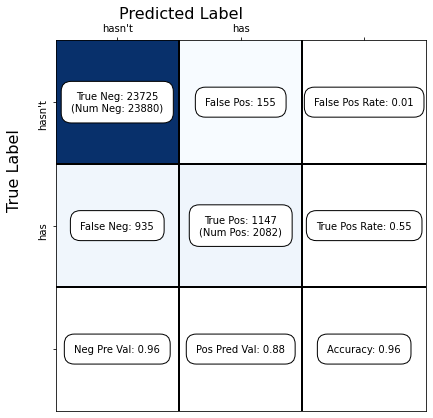

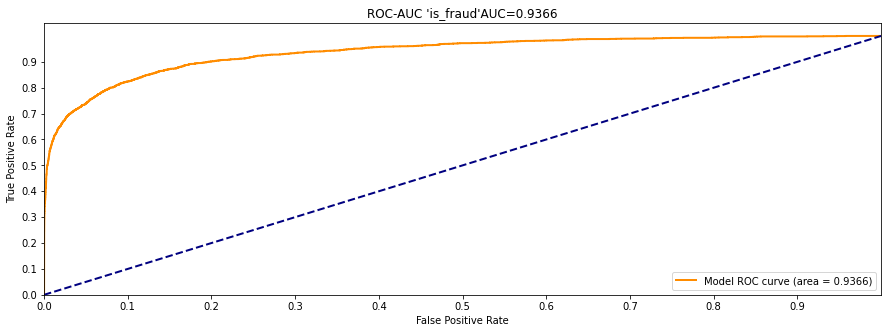

<Figure size 432x288 with 0 Axes>

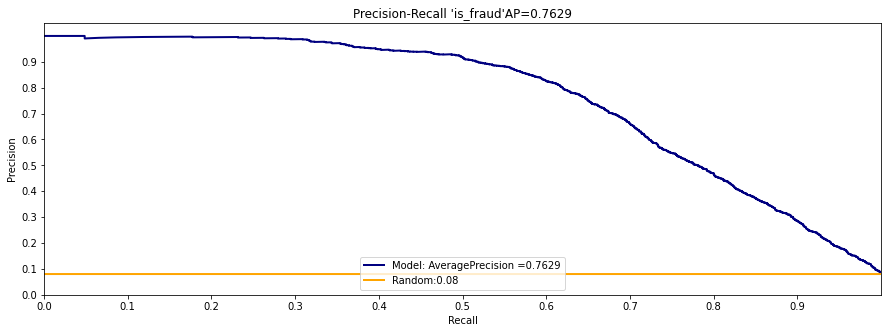

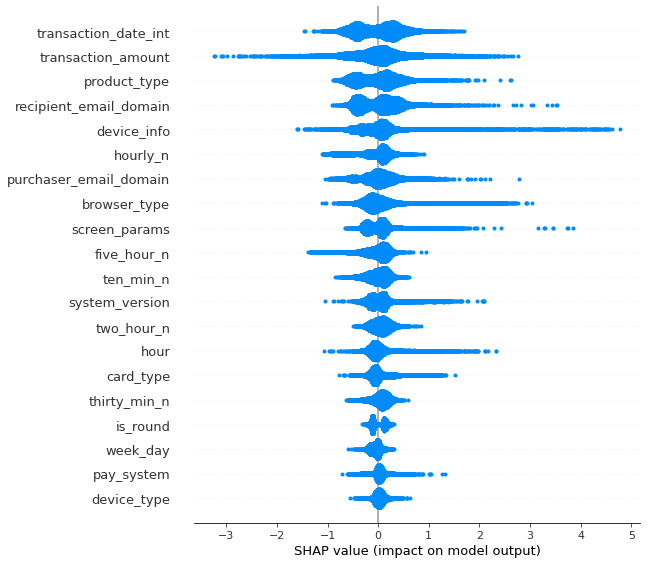

0:	learn: 0.5882582	test: 0.5881949	test1: 0.5874558	test2: 0.5879697	best: 0.5879697 (0)	total: 109ms	remaining: 10m 53s
1:	learn: 0.5088559	test: 0.5088018	test1: 0.5071405	test2: 0.5083449	best: 0.5083449 (1)	total: 144ms	remaining: 7m 10s
2:	learn: 0.4448390	test: 0.4447395	test1: 0.4421775	test2: 0.4440071	best: 0.4440071 (2)	total: 209ms	remaining: 6m 57s
3:	learn: 0.4049914	test: 0.4049019	test1: 0.4019031	test2: 0.4039529	best: 0.4039529 (3)	total: 220ms	remaining: 5m 29s
4:	learn: 0.3693959	test: 0.3692849	test1: 0.3661197	test2: 0.3678513	best: 0.3678513 (4)	total: 270ms	remaining: 5m 23s
5:	learn: 0.3438362	test: 0.3437375	test1: 0.3401715	test2: 0.3422084	best: 0.3422084 (5)	total: 326ms	remaining: 5m 25s
6:	learn: 0.3196238	test: 0.3193957	test1: 0.3157980	test2: 0.3177853	best: 0.3177853 (6)	total: 372ms	remaining: 5m 18s
7:	learn: 0.3043178	test: 0.3040806	test1: 0.3004815	test2: 0.3024914	best: 0.3024914 (7)	total: 415ms	remaining: 5m 10s
8:	learn: 0.2887774	test: 0.287

70:	learn: 0.1745051	test: 0.1378203	test1: 0.1600156	test2: 0.1619954	best: 0.1619954 (70)	total: 4.14s	remaining: 5m 46s
71:	learn: 0.1741950	test: 0.1374666	test1: 0.1597478	test2: 0.1616950	best: 0.1616950 (71)	total: 4.2s	remaining: 5m 45s
72:	learn: 0.1741007	test: 0.1373539	test1: 0.1597128	test2: 0.1616307	best: 0.1616307 (72)	total: 4.26s	remaining: 5m 45s
73:	learn: 0.1739796	test: 0.1372799	test1: 0.1596565	test2: 0.1615783	best: 0.1615783 (73)	total: 4.31s	remaining: 5m 45s
74:	learn: 0.1736357	test: 0.1362604	test1: 0.1592141	test2: 0.1610809	best: 0.1610809 (74)	total: 4.38s	remaining: 5m 46s
75:	learn: 0.1732716	test: 0.1357050	test1: 0.1587662	test2: 0.1605839	best: 0.1605839 (75)	total: 4.43s	remaining: 5m 45s
76:	learn: 0.1730516	test: 0.1353924	test1: 0.1585974	test2: 0.1603007	best: 0.1603007 (76)	total: 4.49s	remaining: 5m 45s
77:	learn: 0.1728495	test: 0.1351992	test1: 0.1584594	test2: 0.1601355	best: 0.1601355 (77)	total: 4.54s	remaining: 5m 44s
78:	learn: 0.1726

137:	learn: 0.1634072	test: 0.1244463	test1: 0.1513268	test2: 0.1528921	best: 0.1528921 (137)	total: 8.05s	remaining: 5m 42s
138:	learn: 0.1630909	test: 0.1232516	test1: 0.1508098	test2: 0.1524277	best: 0.1524277 (138)	total: 8.19s	remaining: 5m 45s
139:	learn: 0.1630704	test: 0.1232580	test1: 0.1508198	test2: 0.1524368	best: 0.1524277 (138)	total: 8.25s	remaining: 5m 45s
140:	learn: 0.1629631	test: 0.1231782	test1: 0.1507780	test2: 0.1524098	best: 0.1524098 (140)	total: 8.31s	remaining: 5m 45s
141:	learn: 0.1627677	test: 0.1230061	test1: 0.1506520	test2: 0.1522502	best: 0.1522502 (141)	total: 8.36s	remaining: 5m 44s
142:	learn: 0.1625738	test: 0.1226901	test1: 0.1504694	test2: 0.1519597	best: 0.1519597 (142)	total: 8.41s	remaining: 5m 44s
143:	learn: 0.1624343	test: 0.1225565	test1: 0.1503182	test2: 0.1518699	best: 0.1518699 (143)	total: 8.48s	remaining: 5m 44s
144:	learn: 0.1623298	test: 0.1224553	test1: 0.1502444	test2: 0.1517737	best: 0.1517737 (144)	total: 8.53s	remaining: 5m 44s


203:	learn: 0.1559384	test: 0.1138545	test1: 0.1447132	test2: 0.1466625	best: 0.1466599 (202)	total: 11.9s	remaining: 5m 38s
204:	learn: 0.1557561	test: 0.1133189	test1: 0.1444384	test2: 0.1464059	best: 0.1464059 (204)	total: 12s	remaining: 5m 38s
205:	learn: 0.1556093	test: 0.1128823	test1: 0.1442178	test2: 0.1462781	best: 0.1462781 (205)	total: 12.1s	remaining: 5m 39s
206:	learn: 0.1555003	test: 0.1127509	test1: 0.1441630	test2: 0.1461406	best: 0.1461406 (206)	total: 12.1s	remaining: 5m 38s
207:	learn: 0.1554868	test: 0.1127524	test1: 0.1441620	test2: 0.1461426	best: 0.1461406 (206)	total: 12.2s	remaining: 5m 38s
208:	learn: 0.1554007	test: 0.1126983	test1: 0.1441687	test2: 0.1461357	best: 0.1461357 (208)	total: 12.2s	remaining: 5m 38s
209:	learn: 0.1553134	test: 0.1126379	test1: 0.1441109	test2: 0.1461002	best: 0.1461002 (209)	total: 12.3s	remaining: 5m 38s
210:	learn: 0.1553052	test: 0.1126348	test1: 0.1441183	test2: 0.1461013	best: 0.1461002 (209)	total: 12.3s	remaining: 5m 38s
21

271:	learn: 0.1510281	test: 0.1079145	test1: 0.1415174	test2: 0.1436120	best: 0.1436120 (271)	total: 15.8s	remaining: 5m 31s
272:	learn: 0.1509785	test: 0.1078966	test1: 0.1415338	test2: 0.1436070	best: 0.1436070 (272)	total: 15.8s	remaining: 5m 31s
273:	learn: 0.1509301	test: 0.1078457	test1: 0.1414686	test2: 0.1435836	best: 0.1435836 (273)	total: 15.9s	remaining: 5m 31s
274:	learn: 0.1508905	test: 0.1078588	test1: 0.1414501	test2: 0.1435826	best: 0.1435826 (274)	total: 15.9s	remaining: 5m 31s
275:	learn: 0.1507877	test: 0.1077861	test1: 0.1413996	test2: 0.1434952	best: 0.1434952 (275)	total: 16s	remaining: 5m 31s
276:	learn: 0.1507384	test: 0.1077583	test1: 0.1413443	test2: 0.1434474	best: 0.1434474 (276)	total: 16s	remaining: 5m 31s
277:	learn: 0.1506775	test: 0.1077315	test1: 0.1413773	test2: 0.1434246	best: 0.1434246 (277)	total: 16.1s	remaining: 5m 31s
278:	learn: 0.1506560	test: 0.1077359	test1: 0.1413670	test2: 0.1434419	best: 0.1434246 (277)	total: 16.2s	remaining: 5m 31s
279:

339:	learn: 0.1467500	test: 0.1019137	test1: 0.1390032	test2: 0.1414769	best: 0.1414769 (339)	total: 19.6s	remaining: 5m 26s
340:	learn: 0.1466038	test: 0.1017816	test1: 0.1388575	test2: 0.1413606	best: 0.1413606 (340)	total: 19.7s	remaining: 5m 26s
341:	learn: 0.1465832	test: 0.1017825	test1: 0.1388719	test2: 0.1413584	best: 0.1413584 (341)	total: 19.7s	remaining: 5m 26s
342:	learn: 0.1465682	test: 0.1017768	test1: 0.1388724	test2: 0.1413601	best: 0.1413584 (341)	total: 19.8s	remaining: 5m 26s
343:	learn: 0.1464824	test: 0.1017083	test1: 0.1388045	test2: 0.1413126	best: 0.1413126 (343)	total: 19.8s	remaining: 5m 26s
344:	learn: 0.1464575	test: 0.1016940	test1: 0.1387831	test2: 0.1413067	best: 0.1413067 (344)	total: 19.9s	remaining: 5m 25s
345:	learn: 0.1464198	test: 0.1016938	test1: 0.1387865	test2: 0.1413016	best: 0.1413016 (345)	total: 19.9s	remaining: 5m 25s
346:	learn: 0.1462708	test: 0.1007074	test1: 0.1386528	test2: 0.1411916	best: 0.1411916 (346)	total: 20s	remaining: 5m 26s
34

408:	learn: 0.1428866	test: 0.0982436	test1: 0.1372943	test2: 0.1398361	best: 0.1398361 (408)	total: 23.5s	remaining: 5m 20s
409:	learn: 0.1428813	test: 0.0982430	test1: 0.1373007	test2: 0.1398308	best: 0.1398308 (409)	total: 23.5s	remaining: 5m 20s
410:	learn: 0.1428128	test: 0.0981753	test1: 0.1372462	test2: 0.1397669	best: 0.1397669 (410)	total: 23.6s	remaining: 5m 20s
411:	learn: 0.1427892	test: 0.0981685	test1: 0.1372393	test2: 0.1397614	best: 0.1397614 (411)	total: 23.6s	remaining: 5m 20s
412:	learn: 0.1426950	test: 0.0981056	test1: 0.1372083	test2: 0.1397120	best: 0.1397120 (412)	total: 23.7s	remaining: 5m 20s
413:	learn: 0.1426397	test: 0.0980540	test1: 0.1371563	test2: 0.1396749	best: 0.1396749 (413)	total: 23.7s	remaining: 5m 20s
414:	learn: 0.1425870	test: 0.0980234	test1: 0.1371261	test2: 0.1396468	best: 0.1396468 (414)	total: 23.8s	remaining: 5m 20s
415:	learn: 0.1425398	test: 0.0979835	test1: 0.1371129	test2: 0.1396304	best: 0.1396304 (415)	total: 23.8s	remaining: 5m 20s


477:	learn: 0.1385179	test: 0.0935300	test1: 0.1351962	test2: 0.1373730	best: 0.1373715 (476)	total: 27.3s	remaining: 5m 15s
478:	learn: 0.1384690	test: 0.0935082	test1: 0.1352066	test2: 0.1373554	best: 0.1373554 (478)	total: 27.3s	remaining: 5m 15s
479:	learn: 0.1384222	test: 0.0934846	test1: 0.1351890	test2: 0.1373252	best: 0.1373252 (479)	total: 27.4s	remaining: 5m 15s
480:	learn: 0.1383965	test: 0.0934918	test1: 0.1352131	test2: 0.1373190	best: 0.1373190 (480)	total: 27.5s	remaining: 5m 15s
481:	learn: 0.1382609	test: 0.0918337	test1: 0.1350390	test2: 0.1371077	best: 0.1371077 (481)	total: 27.5s	remaining: 5m 15s
482:	learn: 0.1382222	test: 0.0918279	test1: 0.1350255	test2: 0.1371231	best: 0.1371077 (481)	total: 27.6s	remaining: 5m 15s
483:	learn: 0.1381794	test: 0.0918046	test1: 0.1349660	test2: 0.1371148	best: 0.1371077 (481)	total: 27.7s	remaining: 5m 15s
484:	learn: 0.1381482	test: 0.0917909	test1: 0.1349549	test2: 0.1371007	best: 0.1371007 (484)	total: 27.7s	remaining: 5m 15s


545:	learn: 0.1353819	test: 0.0896270	test1: 0.1335851	test2: 0.1359122	best: 0.1359122 (545)	total: 31.1s	remaining: 5m 10s
546:	learn: 0.1353126	test: 0.0895885	test1: 0.1335524	test2: 0.1359026	best: 0.1359026 (546)	total: 31.1s	remaining: 5m 10s
547:	learn: 0.1352378	test: 0.0895523	test1: 0.1335134	test2: 0.1359063	best: 0.1359026 (546)	total: 31.2s	remaining: 5m 10s
548:	learn: 0.1351688	test: 0.0894893	test1: 0.1334712	test2: 0.1358460	best: 0.1358460 (548)	total: 31.2s	remaining: 5m 10s
549:	learn: 0.1351026	test: 0.0894437	test1: 0.1334606	test2: 0.1358031	best: 0.1358031 (549)	total: 31.3s	remaining: 5m 10s
550:	learn: 0.1350996	test: 0.0894466	test1: 0.1334596	test2: 0.1358063	best: 0.1358031 (549)	total: 31.3s	remaining: 5m 9s
551:	learn: 0.1350933	test: 0.0894451	test1: 0.1334576	test2: 0.1358012	best: 0.1358012 (551)	total: 31.4s	remaining: 5m 9s
552:	learn: 0.1350368	test: 0.0894072	test1: 0.1334498	test2: 0.1357800	best: 0.1357800 (552)	total: 31.5s	remaining: 5m 9s
553

612:	learn: 0.1326828	test: 0.0878531	test1: 0.1327112	test2: 0.1351410	best: 0.1351410 (612)	total: 34.7s	remaining: 5m 4s
613:	learn: 0.1326087	test: 0.0877953	test1: 0.1326951	test2: 0.1351233	best: 0.1351233 (613)	total: 34.7s	remaining: 5m 4s
614:	learn: 0.1325719	test: 0.0877761	test1: 0.1326735	test2: 0.1350991	best: 0.1350991 (614)	total: 34.8s	remaining: 5m 4s
615:	learn: 0.1325012	test: 0.0877297	test1: 0.1326980	test2: 0.1350805	best: 0.1350805 (615)	total: 34.8s	remaining: 5m 4s
616:	learn: 0.1324465	test: 0.0876994	test1: 0.1326633	test2: 0.1350692	best: 0.1350692 (616)	total: 34.9s	remaining: 5m 4s
617:	learn: 0.1323790	test: 0.0876469	test1: 0.1326103	test2: 0.1350455	best: 0.1350455 (617)	total: 34.9s	remaining: 5m 4s
618:	learn: 0.1323441	test: 0.0876338	test1: 0.1326011	test2: 0.1350340	best: 0.1350340 (618)	total: 35s	remaining: 5m 4s
619:	learn: 0.1323103	test: 0.0876212	test1: 0.1325877	test2: 0.1350225	best: 0.1350225 (619)	total: 35.1s	remaining: 5m 4s
620:	learn

681:	learn: 0.1296061	test: 0.0856544	test1: 0.1315947	test2: 0.1339358	best: 0.1339358 (681)	total: 38.4s	remaining: 4m 59s
682:	learn: 0.1295542	test: 0.0856277	test1: 0.1315728	test2: 0.1339158	best: 0.1339158 (682)	total: 38.4s	remaining: 4m 59s
683:	learn: 0.1294670	test: 0.0855661	test1: 0.1315746	test2: 0.1338671	best: 0.1338671 (683)	total: 38.5s	remaining: 4m 59s
684:	learn: 0.1294033	test: 0.0855206	test1: 0.1315169	test2: 0.1338548	best: 0.1338548 (684)	total: 38.6s	remaining: 4m 59s
685:	learn: 0.1293265	test: 0.0854505	test1: 0.1314542	test2: 0.1338172	best: 0.1338172 (685)	total: 38.6s	remaining: 4m 59s
686:	learn: 0.1292871	test: 0.0854373	test1: 0.1314309	test2: 0.1338077	best: 0.1338077 (686)	total: 38.7s	remaining: 4m 59s
687:	learn: 0.1292371	test: 0.0853868	test1: 0.1313643	test2: 0.1337877	best: 0.1337877 (687)	total: 38.7s	remaining: 4m 59s
688:	learn: 0.1291579	test: 0.0844001	test1: 0.1312856	test2: 0.1336687	best: 0.1336687 (688)	total: 38.8s	remaining: 4m 59s


749:	learn: 0.1271269	test: 0.0831277	test1: 0.1308460	test2: 0.1333102	best: 0.1333102 (749)	total: 42.1s	remaining: 4m 54s
750:	learn: 0.1271201	test: 0.0831288	test1: 0.1308439	test2: 0.1333164	best: 0.1333102 (749)	total: 42.2s	remaining: 4m 54s
751:	learn: 0.1270915	test: 0.0831156	test1: 0.1308457	test2: 0.1333241	best: 0.1333102 (749)	total: 42.2s	remaining: 4m 54s
752:	learn: 0.1270854	test: 0.0831130	test1: 0.1308498	test2: 0.1333206	best: 0.1333102 (749)	total: 42.3s	remaining: 4m 54s
753:	learn: 0.1270115	test: 0.0830586	test1: 0.1308286	test2: 0.1333260	best: 0.1333102 (749)	total: 42.3s	remaining: 4m 54s
754:	learn: 0.1269316	test: 0.0829925	test1: 0.1308060	test2: 0.1333321	best: 0.1333102 (749)	total: 42.4s	remaining: 4m 54s
755:	learn: 0.1269224	test: 0.0829907	test1: 0.1308051	test2: 0.1333352	best: 0.1333102 (749)	total: 42.4s	remaining: 4m 54s
756:	learn: 0.1268783	test: 0.0829699	test1: 0.1307945	test2: 0.1333373	best: 0.1333102 (749)	total: 42.5s	remaining: 4m 54s


816:	learn: 0.1246205	test: 0.0817647	test1: 0.1300186	test2: 0.1327596	best: 0.1327494 (814)	total: 45.8s	remaining: 4m 50s
817:	learn: 0.1245888	test: 0.0817526	test1: 0.1300199	test2: 0.1327524	best: 0.1327494 (814)	total: 45.8s	remaining: 4m 50s
818:	learn: 0.1245883	test: 0.0817538	test1: 0.1300207	test2: 0.1327533	best: 0.1327494 (814)	total: 45.9s	remaining: 4m 50s
819:	learn: 0.1245707	test: 0.0817474	test1: 0.1300158	test2: 0.1327540	best: 0.1327494 (814)	total: 45.9s	remaining: 4m 50s
820:	learn: 0.1244240	test: 0.0814623	test1: 0.1298862	test2: 0.1326244	best: 0.1326244 (820)	total: 46s	remaining: 4m 50s
821:	learn: 0.1243598	test: 0.0814185	test1: 0.1298777	test2: 0.1326268	best: 0.1326244 (820)	total: 46s	remaining: 4m 49s
822:	learn: 0.1243156	test: 0.0814184	test1: 0.1298736	test2: 0.1326106	best: 0.1326106 (822)	total: 46.1s	remaining: 4m 49s
823:	learn: 0.1242957	test: 0.0814122	test1: 0.1298589	test2: 0.1326208	best: 0.1326106 (822)	total: 46.1s	remaining: 4m 49s
824:

884:	learn: 0.1219205	test: 0.0770549	test1: 0.1291066	test2: 0.1318360	best: 0.1318300 (883)	total: 49.6s	remaining: 4m 46s
885:	learn: 0.1218674	test: 0.0770484	test1: 0.1291353	test2: 0.1318460	best: 0.1318300 (883)	total: 49.7s	remaining: 4m 46s
886:	learn: 0.1218471	test: 0.0770483	test1: 0.1291346	test2: 0.1318478	best: 0.1318300 (883)	total: 49.7s	remaining: 4m 46s
887:	learn: 0.1218315	test: 0.0770450	test1: 0.1291256	test2: 0.1318616	best: 0.1318300 (883)	total: 49.8s	remaining: 4m 46s
888:	learn: 0.1217932	test: 0.0770273	test1: 0.1291083	test2: 0.1318465	best: 0.1318300 (883)	total: 49.8s	remaining: 4m 46s
889:	learn: 0.1217596	test: 0.0770224	test1: 0.1291261	test2: 0.1318470	best: 0.1318300 (883)	total: 49.9s	remaining: 4m 46s
890:	learn: 0.1217257	test: 0.0769968	test1: 0.1291365	test2: 0.1318398	best: 0.1318300 (883)	total: 50s	remaining: 4m 46s
891:	learn: 0.1217045	test: 0.0769719	test1: 0.1291090	test2: 0.1318322	best: 0.1318300 (883)	total: 50s	remaining: 4m 46s
892:

952:	learn: 0.1194003	test: 0.0753399	test1: 0.1283231	test2: 0.1313295	best: 0.1313285 (951)	total: 53.5s	remaining: 4m 43s
953:	learn: 0.1193170	test: 0.0752846	test1: 0.1282565	test2: 0.1312997	best: 0.1312997 (953)	total: 53.5s	remaining: 4m 43s
954:	learn: 0.1192786	test: 0.0752746	test1: 0.1282546	test2: 0.1312899	best: 0.1312899 (954)	total: 53.6s	remaining: 4m 42s
955:	learn: 0.1192547	test: 0.0752642	test1: 0.1282696	test2: 0.1312794	best: 0.1312794 (955)	total: 53.6s	remaining: 4m 42s
956:	learn: 0.1192012	test: 0.0752359	test1: 0.1282468	test2: 0.1312383	best: 0.1312383 (956)	total: 53.7s	remaining: 4m 42s
957:	learn: 0.1191837	test: 0.0752392	test1: 0.1282586	test2: 0.1312402	best: 0.1312383 (956)	total: 53.7s	remaining: 4m 42s
958:	learn: 0.1191174	test: 0.0752080	test1: 0.1282687	test2: 0.1312477	best: 0.1312383 (956)	total: 53.8s	remaining: 4m 42s
959:	learn: 0.1190821	test: 0.0752012	test1: 0.1282703	test2: 0.1312518	best: 0.1312383 (956)	total: 53.8s	remaining: 4m 42s


1019:	learn: 0.1172303	test: 0.0727347	test1: 0.1276550	test2: 0.1305381	best: 0.1305381 (1019)	total: 57.2s	remaining: 4m 39s
1020:	learn: 0.1172106	test: 0.0727326	test1: 0.1276426	test2: 0.1305369	best: 0.1305369 (1020)	total: 57.3s	remaining: 4m 39s
1021:	learn: 0.1171149	test: 0.0726651	test1: 0.1275860	test2: 0.1304677	best: 0.1304677 (1021)	total: 57.3s	remaining: 4m 39s
1022:	learn: 0.1170933	test: 0.0726574	test1: 0.1275935	test2: 0.1304694	best: 0.1304677 (1021)	total: 57.4s	remaining: 4m 39s
1023:	learn: 0.1170508	test: 0.0726356	test1: 0.1275671	test2: 0.1304968	best: 0.1304677 (1021)	total: 57.4s	remaining: 4m 39s
1024:	learn: 0.1170264	test: 0.0726161	test1: 0.1275556	test2: 0.1304986	best: 0.1304677 (1021)	total: 57.5s	remaining: 4m 39s
1025:	learn: 0.1170152	test: 0.0726209	test1: 0.1275550	test2: 0.1304952	best: 0.1304677 (1021)	total: 57.6s	remaining: 4m 39s
1026:	learn: 0.1169769	test: 0.0726157	test1: 0.1275686	test2: 0.1304893	best: 0.1304677 (1021)	total: 57.6s	re

1084:	learn: 0.1150587	test: 0.0716059	test1: 0.1269465	test2: 0.1299834	best: 0.1299834 (1084)	total: 1m	remaining: 4m 35s
1085:	learn: 0.1149762	test: 0.0703635	test1: 0.1268913	test2: 0.1298675	best: 0.1298675 (1085)	total: 1m	remaining: 4m 35s
1086:	learn: 0.1148730	test: 0.0702907	test1: 0.1268210	test2: 0.1298301	best: 0.1298301 (1086)	total: 1m	remaining: 4m 34s
1087:	learn: 0.1148200	test: 0.0702625	test1: 0.1268030	test2: 0.1298156	best: 0.1298156 (1087)	total: 1m	remaining: 4m 34s
1088:	learn: 0.1148062	test: 0.0702567	test1: 0.1267907	test2: 0.1298037	best: 0.1298037 (1088)	total: 1m	remaining: 4m 34s
1089:	learn: 0.1147550	test: 0.0702159	test1: 0.1267659	test2: 0.1297830	best: 0.1297830 (1089)	total: 1m	remaining: 4m 34s
1090:	learn: 0.1147213	test: 0.0701758	test1: 0.1267672	test2: 0.1297807	best: 0.1297807 (1090)	total: 1m 1s	remaining: 4m 34s
1091:	learn: 0.1147006	test: 0.0701707	test1: 0.1267614	test2: 0.1297824	best: 0.1297807 (1090)	total: 1m 1s	remaining: 4m 34s
10

1150:	learn: 0.1126027	test: 0.0655141	test1: 0.1261421	test2: 0.1288459	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1151:	learn: 0.1125692	test: 0.0655002	test1: 0.1261423	test2: 0.1288646	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1152:	learn: 0.1125265	test: 0.0654897	test1: 0.1261551	test2: 0.1288592	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1153:	learn: 0.1125068	test: 0.0654845	test1: 0.1261473	test2: 0.1288649	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1154:	learn: 0.1124862	test: 0.0654823	test1: 0.1261430	test2: 0.1288638	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1155:	learn: 0.1124409	test: 0.0654706	test1: 0.1261102	test2: 0.1288639	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 31s
1156:	learn: 0.1123933	test: 0.0654539	test1: 0.1260890	test2: 0.1288783	best: 0.1288459 (1150)	total: 1m 4s	remaining: 4m 30s
1157:	learn: 0.1123724	test: 0.0654577	test1: 0.1261022	test2: 0.1288827	best: 0.1288459 (1150)	total: 1m 4s	re

1218:	learn: 0.1102861	test: 0.0629071	test1: 0.1254716	test2: 0.1280943	best: 0.1280943 (1218)	total: 1m 8s	remaining: 4m 27s
1219:	learn: 0.1102633	test: 0.0628970	test1: 0.1254715	test2: 0.1280823	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 27s
1220:	learn: 0.1102123	test: 0.0628698	test1: 0.1254615	test2: 0.1280861	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 26s
1221:	learn: 0.1102080	test: 0.0628751	test1: 0.1254629	test2: 0.1280875	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 26s
1222:	learn: 0.1101696	test: 0.0628778	test1: 0.1254527	test2: 0.1280826	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 26s
1223:	learn: 0.1101654	test: 0.0628780	test1: 0.1254568	test2: 0.1280914	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 26s
1224:	learn: 0.1101485	test: 0.0628762	test1: 0.1254399	test2: 0.1280886	best: 0.1280823 (1219)	total: 1m 8s	remaining: 4m 26s
1225:	learn: 0.1101474	test: 0.0628779	test1: 0.1254413	test2: 0.1280890	best: 0.1280823 (1219)	total: 1m 8s	re

1283:	learn: 0.1083188	test: 0.0620520	test1: 0.1249365	test2: 0.1277578	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 23s
1284:	learn: 0.1082765	test: 0.0620319	test1: 0.1249311	test2: 0.1277538	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1285:	learn: 0.1082306	test: 0.0620271	test1: 0.1249228	test2: 0.1277677	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1286:	learn: 0.1082240	test: 0.0620348	test1: 0.1249201	test2: 0.1277709	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1287:	learn: 0.1081854	test: 0.0620248	test1: 0.1249461	test2: 0.1277791	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1288:	learn: 0.1081710	test: 0.0620221	test1: 0.1249492	test2: 0.1277775	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1289:	learn: 0.1081661	test: 0.0620235	test1: 0.1249379	test2: 0.1277754	best: 0.1277243 (1277)	total: 1m 11s	remaining: 4m 22s
1290:	learn: 0.1081510	test: 0.0620148	test1: 0.1249345	test2: 0.1277660	best: 0.1277243 (1277)	total: 1

1349:	learn: 0.1065786	test: 0.0612619	test1: 0.1246375	test2: 0.1273284	best: 0.1273284 (1349)	total: 1m 15s	remaining: 4m 18s
1350:	learn: 0.1065450	test: 0.0612454	test1: 0.1245913	test2: 0.1273176	best: 0.1273176 (1350)	total: 1m 15s	remaining: 4m 18s
1351:	learn: 0.1065123	test: 0.0612347	test1: 0.1246074	test2: 0.1273209	best: 0.1273176 (1350)	total: 1m 15s	remaining: 4m 18s
1352:	learn: 0.1064979	test: 0.0612302	test1: 0.1246058	test2: 0.1273214	best: 0.1273176 (1350)	total: 1m 15s	remaining: 4m 18s
1353:	learn: 0.1064850	test: 0.0612234	test1: 0.1246206	test2: 0.1273055	best: 0.1273055 (1353)	total: 1m 15s	remaining: 4m 18s
1354:	learn: 0.1064761	test: 0.0612255	test1: 0.1246283	test2: 0.1273039	best: 0.1273039 (1354)	total: 1m 15s	remaining: 4m 18s
1355:	learn: 0.1064568	test: 0.0612239	test1: 0.1246179	test2: 0.1272951	best: 0.1272951 (1355)	total: 1m 15s	remaining: 4m 18s
1356:	learn: 0.1064540	test: 0.0612247	test1: 0.1246171	test2: 0.1272989	best: 0.1272951 (1355)	total: 1

1417:	learn: 0.1048049	test: 0.0597484	test1: 0.1243489	test2: 0.1270593	best: 0.1270100 (1409)	total: 1m 18s	remaining: 4m 14s
1418:	learn: 0.1047869	test: 0.0597465	test1: 0.1243633	test2: 0.1270463	best: 0.1270100 (1409)	total: 1m 18s	remaining: 4m 14s
1419:	learn: 0.1047568	test: 0.0597333	test1: 0.1243557	test2: 0.1270343	best: 0.1270100 (1409)	total: 1m 19s	remaining: 4m 14s
1420:	learn: 0.1047368	test: 0.0597270	test1: 0.1243518	test2: 0.1270277	best: 0.1270100 (1409)	total: 1m 19s	remaining: 4m 14s
1421:	learn: 0.1047161	test: 0.0597168	test1: 0.1243539	test2: 0.1270499	best: 0.1270100 (1409)	total: 1m 19s	remaining: 4m 14s
1422:	learn: 0.1046963	test: 0.0597097	test1: 0.1243453	test2: 0.1270485	best: 0.1270100 (1409)	total: 1m 19s	remaining: 4m 14s
1423:	learn: 0.1046810	test: 0.0597033	test1: 0.1243478	test2: 0.1270463	best: 0.1270100 (1409)	total: 1m 19s	remaining: 4m 14s
1424:	learn: 0.1046530	test: 0.0596978	test1: 0.1243233	test2: 0.1270221	best: 0.1270100 (1409)	total: 1

1485:	learn: 0.1030629	test: 0.0587902	test1: 0.1238334	test2: 0.1265790	best: 0.1265790 (1485)	total: 1m 22s	remaining: 4m 11s
1486:	learn: 0.1030479	test: 0.0587932	test1: 0.1238197	test2: 0.1265719	best: 0.1265719 (1486)	total: 1m 22s	remaining: 4m 11s
1487:	learn: 0.1030335	test: 0.0587911	test1: 0.1238154	test2: 0.1265718	best: 0.1265718 (1487)	total: 1m 22s	remaining: 4m 11s
1488:	learn: 0.1030212	test: 0.0587877	test1: 0.1238159	test2: 0.1265691	best: 0.1265691 (1488)	total: 1m 22s	remaining: 4m 11s
1489:	learn: 0.1029472	test: 0.0587478	test1: 0.1237542	test2: 0.1265347	best: 0.1265347 (1489)	total: 1m 22s	remaining: 4m 11s
1490:	learn: 0.1029390	test: 0.0587471	test1: 0.1237561	test2: 0.1265413	best: 0.1265347 (1489)	total: 1m 23s	remaining: 4m 11s
1491:	learn: 0.1029057	test: 0.0587378	test1: 0.1237492	test2: 0.1265458	best: 0.1265347 (1489)	total: 1m 23s	remaining: 4m 11s
1492:	learn: 0.1028889	test: 0.0587344	test1: 0.1237472	test2: 0.1265411	best: 0.1265347 (1489)	total: 1

1553:	learn: 0.1014954	test: 0.0581527	test1: 0.1235800	test2: 0.1263452	best: 0.1263452 (1553)	total: 1m 26s	remaining: 4m 7s
1554:	learn: 0.1014384	test: 0.0581306	test1: 0.1235367	test2: 0.1263338	best: 0.1263338 (1554)	total: 1m 26s	remaining: 4m 7s
1555:	learn: 0.1014061	test: 0.0581418	test1: 0.1235553	test2: 0.1263353	best: 0.1263338 (1554)	total: 1m 26s	remaining: 4m 7s
1556:	learn: 0.1013800	test: 0.0581192	test1: 0.1235368	test2: 0.1263399	best: 0.1263338 (1554)	total: 1m 26s	remaining: 4m 7s
1557:	learn: 0.1013539	test: 0.0581100	test1: 0.1235245	test2: 0.1263229	best: 0.1263229 (1557)	total: 1m 26s	remaining: 4m 7s
1558:	learn: 0.1013183	test: 0.0580950	test1: 0.1235467	test2: 0.1263138	best: 0.1263138 (1558)	total: 1m 26s	remaining: 4m 7s
1559:	learn: 0.1012791	test: 0.0580763	test1: 0.1235241	test2: 0.1263255	best: 0.1263138 (1558)	total: 1m 26s	remaining: 4m 7s
1560:	learn: 0.1012390	test: 0.0580644	test1: 0.1235101	test2: 0.1263107	best: 0.1263107 (1560)	total: 1m 26s	r

1621:	learn: 0.0995166	test: 0.0571364	test1: 0.1229958	test2: 0.1258677	best: 0.1258677 (1621)	total: 1m 30s	remaining: 4m 3s
1622:	learn: 0.0994673	test: 0.0571106	test1: 0.1229785	test2: 0.1258537	best: 0.1258537 (1622)	total: 1m 30s	remaining: 4m 3s
1623:	learn: 0.0994388	test: 0.0571160	test1: 0.1229731	test2: 0.1258519	best: 0.1258519 (1623)	total: 1m 30s	remaining: 4m 3s
1624:	learn: 0.0994278	test: 0.0571140	test1: 0.1229820	test2: 0.1258478	best: 0.1258478 (1624)	total: 1m 30s	remaining: 4m 3s
1625:	learn: 0.0994264	test: 0.0571155	test1: 0.1229835	test2: 0.1258492	best: 0.1258478 (1624)	total: 1m 30s	remaining: 4m 3s
1626:	learn: 0.0994030	test: 0.0570903	test1: 0.1230052	test2: 0.1258447	best: 0.1258447 (1626)	total: 1m 30s	remaining: 4m 3s
1627:	learn: 0.0993889	test: 0.0570820	test1: 0.1230256	test2: 0.1258491	best: 0.1258447 (1626)	total: 1m 30s	remaining: 4m 3s
1628:	learn: 0.0993708	test: 0.0570785	test1: 0.1230115	test2: 0.1258475	best: 0.1258447 (1626)	total: 1m 30s	r

1688:	learn: 0.0976824	test: 0.0559155	test1: 0.1226278	test2: 0.1254631	best: 0.1254631 (1688)	total: 1m 33s	remaining: 3m 59s
1689:	learn: 0.0976507	test: 0.0559042	test1: 0.1226210	test2: 0.1254725	best: 0.1254631 (1688)	total: 1m 33s	remaining: 3m 59s
1690:	learn: 0.0976489	test: 0.0559068	test1: 0.1226171	test2: 0.1254728	best: 0.1254631 (1688)	total: 1m 34s	remaining: 3m 59s
1691:	learn: 0.0976410	test: 0.0559071	test1: 0.1226262	test2: 0.1254811	best: 0.1254631 (1688)	total: 1m 34s	remaining: 3m 59s
1692:	learn: 0.0976290	test: 0.0558990	test1: 0.1226292	test2: 0.1254858	best: 0.1254631 (1688)	total: 1m 34s	remaining: 3m 59s
1693:	learn: 0.0976217	test: 0.0559002	test1: 0.1226343	test2: 0.1254888	best: 0.1254631 (1688)	total: 1m 34s	remaining: 3m 59s
1694:	learn: 0.0976126	test: 0.0559012	test1: 0.1226324	test2: 0.1254845	best: 0.1254631 (1688)	total: 1m 34s	remaining: 3m 59s
1695:	learn: 0.0976029	test: 0.0559033	test1: 0.1226092	test2: 0.1254868	best: 0.1254631 (1688)	total: 1

1753:	learn: 0.0963238	test: 0.0549711	test1: 0.1223460	test2: 0.1254263	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1754:	learn: 0.0963156	test: 0.0549626	test1: 0.1223354	test2: 0.1254114	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1755:	learn: 0.0962991	test: 0.0549487	test1: 0.1223133	test2: 0.1254243	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1756:	learn: 0.0962828	test: 0.0549492	test1: 0.1223202	test2: 0.1254311	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1757:	learn: 0.0962761	test: 0.0549463	test1: 0.1223197	test2: 0.1254379	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1758:	learn: 0.0962344	test: 0.0548659	test1: 0.1222540	test2: 0.1253904	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1759:	learn: 0.0962189	test: 0.0548574	test1: 0.1222682	test2: 0.1253986	best: 0.1253751 (1732)	total: 1m 37s	remaining: 3m 55s
1760:	learn: 0.0961850	test: 0.0548361	test1: 0.1222524	test2: 0.1253988	best: 0.1253751 (1732)	total: 1

1818:	learn: 0.0948252	test: 0.0538778	test1: 0.1218159	test2: 0.1250998	best: 0.1250873 (1815)	total: 1m 40s	remaining: 3m 52s
1819:	learn: 0.0948199	test: 0.0538692	test1: 0.1218214	test2: 0.1250956	best: 0.1250873 (1815)	total: 1m 41s	remaining: 3m 52s
1820:	learn: 0.0947932	test: 0.0538518	test1: 0.1218073	test2: 0.1250909	best: 0.1250873 (1815)	total: 1m 41s	remaining: 3m 51s
1821:	learn: 0.0947855	test: 0.0538457	test1: 0.1217971	test2: 0.1250853	best: 0.1250853 (1821)	total: 1m 41s	remaining: 3m 51s
1822:	learn: 0.0947378	test: 0.0538175	test1: 0.1217859	test2: 0.1250608	best: 0.1250608 (1822)	total: 1m 41s	remaining: 3m 51s
1823:	learn: 0.0946966	test: 0.0537978	test1: 0.1217544	test2: 0.1250791	best: 0.1250608 (1822)	total: 1m 41s	remaining: 3m 51s
1824:	learn: 0.0946896	test: 0.0537954	test1: 0.1217396	test2: 0.1250826	best: 0.1250608 (1822)	total: 1m 41s	remaining: 3m 51s
1825:	learn: 0.0946855	test: 0.0537934	test1: 0.1217428	test2: 0.1250833	best: 0.1250608 (1822)	total: 1

1885:	learn: 0.0930001	test: 0.0529150	test1: 0.1210845	test2: 0.1246081	best: 0.1246081 (1885)	total: 1m 44s	remaining: 3m 48s
1886:	learn: 0.0929911	test: 0.0529131	test1: 0.1210838	test2: 0.1246141	best: 0.1246081 (1885)	total: 1m 44s	remaining: 3m 47s
1887:	learn: 0.0929824	test: 0.0529153	test1: 0.1210781	test2: 0.1246141	best: 0.1246081 (1885)	total: 1m 44s	remaining: 3m 47s
1888:	learn: 0.0929307	test: 0.0529055	test1: 0.1210902	test2: 0.1245923	best: 0.1245923 (1888)	total: 1m 44s	remaining: 3m 47s
1889:	learn: 0.0929032	test: 0.0528877	test1: 0.1210799	test2: 0.1245875	best: 0.1245875 (1889)	total: 1m 44s	remaining: 3m 47s
1890:	learn: 0.0928806	test: 0.0528869	test1: 0.1210689	test2: 0.1245604	best: 0.1245604 (1890)	total: 1m 44s	remaining: 3m 47s
1891:	learn: 0.0928510	test: 0.0528929	test1: 0.1210609	test2: 0.1245415	best: 0.1245415 (1891)	total: 1m 44s	remaining: 3m 47s
1892:	learn: 0.0928288	test: 0.0528824	test1: 0.1210556	test2: 0.1245564	best: 0.1245415 (1891)	total: 1

1950:	learn: 0.0915471	test: 0.0522638	test1: 0.1207744	test2: 0.1244002	best: 0.1244002 (1950)	total: 1m 48s	remaining: 3m 44s
1951:	learn: 0.0915213	test: 0.0522624	test1: 0.1207814	test2: 0.1243962	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 44s
1952:	learn: 0.0915116	test: 0.0522633	test1: 0.1207821	test2: 0.1244006	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 44s
1953:	learn: 0.0914760	test: 0.0522450	test1: 0.1207678	test2: 0.1244036	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 44s
1954:	learn: 0.0914154	test: 0.0522196	test1: 0.1207454	test2: 0.1244109	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 43s
1955:	learn: 0.0913994	test: 0.0522070	test1: 0.1207411	test2: 0.1244060	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 43s
1956:	learn: 0.0913851	test: 0.0522032	test1: 0.1207412	test2: 0.1244020	best: 0.1243962 (1951)	total: 1m 48s	remaining: 3m 43s
1957:	learn: 0.0913410	test: 0.0521826	test1: 0.1207216	test2: 0.1244090	best: 0.1243962 (1951)	total: 1

2015:	learn: 0.0902062	test: 0.0516425	test1: 0.1204708	test2: 0.1242222	best: 0.1242132 (1999)	total: 1m 51s	remaining: 3m 40s
2016:	learn: 0.0901804	test: 0.0516372	test1: 0.1204570	test2: 0.1242246	best: 0.1242132 (1999)	total: 1m 51s	remaining: 3m 40s
2017:	learn: 0.0901447	test: 0.0515868	test1: 0.1204218	test2: 0.1241722	best: 0.1241722 (2017)	total: 1m 51s	remaining: 3m 40s
2018:	learn: 0.0901328	test: 0.0515866	test1: 0.1204062	test2: 0.1241831	best: 0.1241722 (2017)	total: 1m 51s	remaining: 3m 40s
2019:	learn: 0.0901003	test: 0.0515774	test1: 0.1203997	test2: 0.1242017	best: 0.1241722 (2017)	total: 1m 51s	remaining: 3m 40s
2020:	learn: 0.0900507	test: 0.0515453	test1: 0.1203803	test2: 0.1241897	best: 0.1241722 (2017)	total: 1m 51s	remaining: 3m 40s
2021:	learn: 0.0900251	test: 0.0515325	test1: 0.1203699	test2: 0.1241757	best: 0.1241722 (2017)	total: 1m 51s	remaining: 3m 40s
2022:	learn: 0.0900000	test: 0.0515127	test1: 0.1203463	test2: 0.1241798	best: 0.1241722 (2017)	total: 1

2084:	learn: 0.0887018	test: 0.0508566	test1: 0.1198920	test2: 0.1239588	best: 0.1239466 (2079)	total: 1m 55s	remaining: 3m 36s
2085:	learn: 0.0886928	test: 0.0508596	test1: 0.1198823	test2: 0.1239581	best: 0.1239466 (2079)	total: 1m 55s	remaining: 3m 36s
2086:	learn: 0.0886784	test: 0.0508555	test1: 0.1198548	test2: 0.1239571	best: 0.1239466 (2079)	total: 1m 55s	remaining: 3m 36s
2087:	learn: 0.0886628	test: 0.0508549	test1: 0.1198443	test2: 0.1239563	best: 0.1239466 (2079)	total: 1m 55s	remaining: 3m 36s
2088:	learn: 0.0886414	test: 0.0508476	test1: 0.1198440	test2: 0.1239437	best: 0.1239437 (2088)	total: 1m 55s	remaining: 3m 36s
2089:	learn: 0.0886312	test: 0.0508441	test1: 0.1198418	test2: 0.1239523	best: 0.1239437 (2088)	total: 1m 55s	remaining: 3m 36s
2090:	learn: 0.0886301	test: 0.0508452	test1: 0.1198417	test2: 0.1239526	best: 0.1239437 (2088)	total: 1m 55s	remaining: 3m 36s
2091:	learn: 0.0886179	test: 0.0508444	test1: 0.1198477	test2: 0.1239492	best: 0.1239437 (2088)	total: 1

2150:	learn: 0.0874768	test: 0.0504837	test1: 0.1197655	test2: 0.1235965	best: 0.1235965 (2150)	total: 1m 59s	remaining: 3m 33s
2151:	learn: 0.0874486	test: 0.0504653	test1: 0.1197718	test2: 0.1235939	best: 0.1235939 (2151)	total: 1m 59s	remaining: 3m 32s
2152:	learn: 0.0874296	test: 0.0504581	test1: 0.1197633	test2: 0.1235963	best: 0.1235939 (2151)	total: 1m 59s	remaining: 3m 32s
2153:	learn: 0.0874115	test: 0.0504589	test1: 0.1197641	test2: 0.1236084	best: 0.1235939 (2151)	total: 1m 59s	remaining: 3m 32s
2154:	learn: 0.0873817	test: 0.0504426	test1: 0.1197436	test2: 0.1235883	best: 0.1235883 (2154)	total: 1m 59s	remaining: 3m 32s
2155:	learn: 0.0873624	test: 0.0504402	test1: 0.1197094	test2: 0.1235938	best: 0.1235883 (2154)	total: 1m 59s	remaining: 3m 32s
2156:	learn: 0.0873609	test: 0.0504407	test1: 0.1197074	test2: 0.1235943	best: 0.1235883 (2154)	total: 1m 59s	remaining: 3m 32s
2157:	learn: 0.0873435	test: 0.0504377	test1: 0.1197074	test2: 0.1235917	best: 0.1235883 (2154)	total: 1

2215:	learn: 0.0861728	test: 0.0499041	test1: 0.1196114	test2: 0.1235928	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2216:	learn: 0.0861619	test: 0.0499030	test1: 0.1196141	test2: 0.1235970	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2217:	learn: 0.0861361	test: 0.0498860	test1: 0.1196050	test2: 0.1235962	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2218:	learn: 0.0861237	test: 0.0498820	test1: 0.1196185	test2: 0.1235913	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2219:	learn: 0.0861205	test: 0.0498804	test1: 0.1196207	test2: 0.1235888	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2220:	learn: 0.0860911	test: 0.0498774	test1: 0.1196035	test2: 0.1235862	best: 0.1235110 (2191)	total: 2m 2s	remaining: 3m 29s
2221:	learn: 0.0860714	test: 0.0498689	test1: 0.1196075	test2: 0.1235906	best: 0.1235110 (2191)	total: 2m 3s	remaining: 3m 29s
2222:	learn: 0.0860594	test: 0.0498581	test1: 0.1196008	test2: 0.1235962	best: 0.1235110 (2191)	total: 2m 3s	re

2281:	learn: 0.0850548	test: 0.0494176	test1: 0.1192338	test2: 0.1235153	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2282:	learn: 0.0850407	test: 0.0494090	test1: 0.1192422	test2: 0.1235145	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2283:	learn: 0.0850049	test: 0.0493939	test1: 0.1192027	test2: 0.1234940	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2284:	learn: 0.0849838	test: 0.0493838	test1: 0.1192207	test2: 0.1234944	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2285:	learn: 0.0849463	test: 0.0493744	test1: 0.1192238	test2: 0.1234851	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2286:	learn: 0.0849413	test: 0.0493751	test1: 0.1192280	test2: 0.1234872	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2287:	learn: 0.0849336	test: 0.0493735	test1: 0.1192088	test2: 0.1234792	best: 0.1234674 (2267)	total: 2m 6s	remaining: 3m 25s
2288:	learn: 0.0849030	test: 0.0493570	test1: 0.1191917	test2: 0.1234874	best: 0.1234674 (2267)	total: 2m 6s	re

2349:	learn: 0.0836423	test: 0.0486696	test1: 0.1188081	test2: 0.1232803	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 22s
2350:	learn: 0.0836168	test: 0.0486645	test1: 0.1188090	test2: 0.1232811	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2351:	learn: 0.0836024	test: 0.0486610	test1: 0.1188005	test2: 0.1232796	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2352:	learn: 0.0835784	test: 0.0486559	test1: 0.1187829	test2: 0.1232875	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2353:	learn: 0.0835703	test: 0.0486675	test1: 0.1187856	test2: 0.1232981	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2354:	learn: 0.0835688	test: 0.0486688	test1: 0.1187876	test2: 0.1232987	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2355:	learn: 0.0835545	test: 0.0486615	test1: 0.1187789	test2: 0.1232928	best: 0.1232673 (2340)	total: 2m 10s	remaining: 3m 21s
2356:	learn: 0.0835259	test: 0.0486563	test1: 0.1187795	test2: 0.1233083	best: 0.1232673 (2340)	total: 2

2416:	learn: 0.0822889	test: 0.0479734	test1: 0.1183979	test2: 0.1232991	best: 0.1232673 (2340)	total: 2m 13s	remaining: 3m 18s
2417:	learn: 0.0822636	test: 0.0479600	test1: 0.1184120	test2: 0.1232900	best: 0.1232673 (2340)	total: 2m 13s	remaining: 3m 18s
2418:	learn: 0.0822502	test: 0.0479548	test1: 0.1184071	test2: 0.1232879	best: 0.1232673 (2340)	total: 2m 13s	remaining: 3m 18s
2419:	learn: 0.0822396	test: 0.0479512	test1: 0.1184013	test2: 0.1232864	best: 0.1232673 (2340)	total: 2m 13s	remaining: 3m 18s
2420:	learn: 0.0821936	test: 0.0479204	test1: 0.1184419	test2: 0.1232923	best: 0.1232673 (2340)	total: 2m 14s	remaining: 3m 18s
2421:	learn: 0.0821875	test: 0.0479184	test1: 0.1184436	test2: 0.1232937	best: 0.1232673 (2340)	total: 2m 14s	remaining: 3m 18s
2422:	learn: 0.0821703	test: 0.0479133	test1: 0.1184333	test2: 0.1232981	best: 0.1232673 (2340)	total: 2m 14s	remaining: 3m 18s
2423:	learn: 0.0821218	test: 0.0478823	test1: 0.1184375	test2: 0.1232825	best: 0.1232673 (2340)	total: 2

2484:	learn: 0.0809306	test: 0.0473372	test1: 0.1183264	test2: 0.1229546	best: 0.1229546 (2484)	total: 2m 17s	remaining: 3m 14s
2485:	learn: 0.0809285	test: 0.0473371	test1: 0.1183219	test2: 0.1229579	best: 0.1229546 (2484)	total: 2m 17s	remaining: 3m 14s
2486:	learn: 0.0809011	test: 0.0473330	test1: 0.1183262	test2: 0.1229593	best: 0.1229546 (2484)	total: 2m 17s	remaining: 3m 14s
2487:	learn: 0.0808824	test: 0.0473213	test1: 0.1183106	test2: 0.1229554	best: 0.1229546 (2484)	total: 2m 17s	remaining: 3m 14s
2488:	learn: 0.0808656	test: 0.0473155	test1: 0.1183132	test2: 0.1229507	best: 0.1229507 (2488)	total: 2m 17s	remaining: 3m 14s
2489:	learn: 0.0808535	test: 0.0473216	test1: 0.1183126	test2: 0.1229489	best: 0.1229489 (2489)	total: 2m 17s	remaining: 3m 14s
2490:	learn: 0.0808412	test: 0.0473145	test1: 0.1183122	test2: 0.1229495	best: 0.1229489 (2489)	total: 2m 17s	remaining: 3m 14s
2491:	learn: 0.0808124	test: 0.0473093	test1: 0.1182948	test2: 0.1229335	best: 0.1229335 (2491)	total: 2

2552:	learn: 0.0796380	test: 0.0467855	test1: 0.1180157	test2: 0.1227981	best: 0.1227886 (2550)	total: 2m 21s	remaining: 3m 10s
2553:	learn: 0.0796086	test: 0.0467629	test1: 0.1180079	test2: 0.1227872	best: 0.1227872 (2553)	total: 2m 21s	remaining: 3m 10s
2554:	learn: 0.0795868	test: 0.0467479	test1: 0.1180104	test2: 0.1227836	best: 0.1227836 (2554)	total: 2m 21s	remaining: 3m 10s
2555:	learn: 0.0795669	test: 0.0467425	test1: 0.1180168	test2: 0.1227814	best: 0.1227814 (2555)	total: 2m 21s	remaining: 3m 10s
2556:	learn: 0.0795324	test: 0.0467225	test1: 0.1180245	test2: 0.1227829	best: 0.1227814 (2555)	total: 2m 21s	remaining: 3m 10s
2557:	learn: 0.0795069	test: 0.0467064	test1: 0.1179847	test2: 0.1227914	best: 0.1227814 (2555)	total: 2m 21s	remaining: 3m 10s
2558:	learn: 0.0794969	test: 0.0466678	test1: 0.1179697	test2: 0.1227812	best: 0.1227812 (2558)	total: 2m 21s	remaining: 3m 10s
2559:	learn: 0.0794741	test: 0.0466601	test1: 0.1179745	test2: 0.1227450	best: 0.1227450 (2559)	total: 2

2620:	learn: 0.0783378	test: 0.0461076	test1: 0.1178219	test2: 0.1227086	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2621:	learn: 0.0783296	test: 0.0461153	test1: 0.1178384	test2: 0.1227153	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2622:	learn: 0.0783243	test: 0.0461150	test1: 0.1178440	test2: 0.1227154	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2623:	learn: 0.0783214	test: 0.0461167	test1: 0.1178470	test2: 0.1227195	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2624:	learn: 0.0783152	test: 0.0461152	test1: 0.1178611	test2: 0.1227357	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2625:	learn: 0.0783089	test: 0.0461116	test1: 0.1178579	test2: 0.1227375	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 7s
2626:	learn: 0.0783023	test: 0.0461117	test1: 0.1178545	test2: 0.1227396	best: 0.1226918 (2599)	total: 2m 25s	remaining: 3m 6s
2627:	learn: 0.0782829	test: 0.0460767	test1: 0.1178182	test2: 0.1227183	best: 0.1226918 (2599)	total: 2m 25s	r

2687:	learn: 0.0773352	test: 0.0456528	test1: 0.1175486	test2: 0.1224486	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2688:	learn: 0.0773264	test: 0.0456446	test1: 0.1175499	test2: 0.1224533	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2689:	learn: 0.0773148	test: 0.0456447	test1: 0.1175462	test2: 0.1224541	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2690:	learn: 0.0772996	test: 0.0456467	test1: 0.1175413	test2: 0.1224693	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2691:	learn: 0.0772765	test: 0.0456308	test1: 0.1175430	test2: 0.1224605	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2692:	learn: 0.0772687	test: 0.0456306	test1: 0.1175414	test2: 0.1224552	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2693:	learn: 0.0772553	test: 0.0456258	test1: 0.1175489	test2: 0.1224556	best: 0.1224436 (2686)	total: 2m 29s	remaining: 3m 3s
2694:	learn: 0.0772390	test: 0.0456264	test1: 0.1175427	test2: 0.1224503	best: 0.1224436 (2686)	total: 2m 29s	r

2755:	learn: 0.0761134	test: 0.0451820	test1: 0.1173804	test2: 0.1224349	best: 0.1224289 (2712)	total: 2m 32s	remaining: 2m 59s
2756:	learn: 0.0760876	test: 0.0451749	test1: 0.1173823	test2: 0.1224240	best: 0.1224240 (2756)	total: 2m 32s	remaining: 2m 59s
2757:	learn: 0.0760732	test: 0.0451668	test1: 0.1173710	test2: 0.1224297	best: 0.1224240 (2756)	total: 2m 33s	remaining: 2m 59s
2758:	learn: 0.0760458	test: 0.0451515	test1: 0.1173559	test2: 0.1224117	best: 0.1224117 (2758)	total: 2m 33s	remaining: 2m 59s
2759:	learn: 0.0760271	test: 0.0451379	test1: 0.1173381	test2: 0.1224004	best: 0.1224004 (2759)	total: 2m 33s	remaining: 2m 59s
2760:	learn: 0.0760038	test: 0.0451280	test1: 0.1173249	test2: 0.1223880	best: 0.1223880 (2760)	total: 2m 33s	remaining: 2m 59s
2761:	learn: 0.0759916	test: 0.0451278	test1: 0.1173316	test2: 0.1223759	best: 0.1223759 (2761)	total: 2m 33s	remaining: 2m 59s
2762:	learn: 0.0759834	test: 0.0451253	test1: 0.1173250	test2: 0.1223778	best: 0.1223759 (2761)	total: 2

2823:	learn: 0.0748980	test: 0.0445783	test1: 0.1171845	test2: 0.1222229	best: 0.1222169 (2822)	total: 2m 36s	remaining: 2m 56s
2824:	learn: 0.0748908	test: 0.0445750	test1: 0.1171977	test2: 0.1222361	best: 0.1222169 (2822)	total: 2m 36s	remaining: 2m 56s
2825:	learn: 0.0748749	test: 0.0445617	test1: 0.1171863	test2: 0.1222238	best: 0.1222169 (2822)	total: 2m 36s	remaining: 2m 56s
2826:	learn: 0.0748683	test: 0.0445619	test1: 0.1171828	test2: 0.1222182	best: 0.1222169 (2822)	total: 2m 36s	remaining: 2m 56s
2827:	learn: 0.0748652	test: 0.0445637	test1: 0.1171805	test2: 0.1222172	best: 0.1222169 (2822)	total: 2m 37s	remaining: 2m 56s
2828:	learn: 0.0748452	test: 0.0445478	test1: 0.1171923	test2: 0.1222033	best: 0.1222033 (2828)	total: 2m 37s	remaining: 2m 56s
2829:	learn: 0.0748318	test: 0.0445424	test1: 0.1171915	test2: 0.1222020	best: 0.1222020 (2829)	total: 2m 37s	remaining: 2m 55s
2830:	learn: 0.0748092	test: 0.0445313	test1: 0.1171797	test2: 0.1221939	best: 0.1221939 (2830)	total: 2

2889:	learn: 0.0739177	test: 0.0441564	test1: 0.1171101	test2: 0.1220849	best: 0.1220848 (2886)	total: 2m 40s	remaining: 2m 52s
2890:	learn: 0.0739058	test: 0.0441571	test1: 0.1171091	test2: 0.1220834	best: 0.1220834 (2890)	total: 2m 40s	remaining: 2m 52s
2891:	learn: 0.0738887	test: 0.0441605	test1: 0.1171054	test2: 0.1220862	best: 0.1220834 (2890)	total: 2m 40s	remaining: 2m 52s
2892:	learn: 0.0738808	test: 0.0441591	test1: 0.1171035	test2: 0.1220899	best: 0.1220834 (2890)	total: 2m 40s	remaining: 2m 52s
2893:	learn: 0.0738385	test: 0.0441301	test1: 0.1170780	test2: 0.1220755	best: 0.1220755 (2893)	total: 2m 40s	remaining: 2m 52s
2894:	learn: 0.0738231	test: 0.0441259	test1: 0.1170500	test2: 0.1220597	best: 0.1220597 (2894)	total: 2m 40s	remaining: 2m 52s
2895:	learn: 0.0737940	test: 0.0441209	test1: 0.1170573	test2: 0.1220693	best: 0.1220597 (2894)	total: 2m 40s	remaining: 2m 52s
2896:	learn: 0.0737733	test: 0.0441089	test1: 0.1170633	test2: 0.1220822	best: 0.1220597 (2894)	total: 2

2957:	learn: 0.0726347	test: 0.0436056	test1: 0.1170242	test2: 0.1220143	best: 0.1219977 (2926)	total: 2m 44s	remaining: 2m 49s
2958:	learn: 0.0726252	test: 0.0436021	test1: 0.1170293	test2: 0.1220065	best: 0.1219977 (2926)	total: 2m 44s	remaining: 2m 48s
2959:	learn: 0.0726121	test: 0.0435975	test1: 0.1170384	test2: 0.1219998	best: 0.1219977 (2926)	total: 2m 44s	remaining: 2m 48s
2960:	learn: 0.0725875	test: 0.0435800	test1: 0.1170471	test2: 0.1219891	best: 0.1219891 (2960)	total: 2m 44s	remaining: 2m 48s
2961:	learn: 0.0725841	test: 0.0435801	test1: 0.1170429	test2: 0.1219909	best: 0.1219891 (2960)	total: 2m 44s	remaining: 2m 48s
2962:	learn: 0.0725670	test: 0.0435720	test1: 0.1170528	test2: 0.1219830	best: 0.1219830 (2962)	total: 2m 44s	remaining: 2m 48s
2963:	learn: 0.0725271	test: 0.0435454	test1: 0.1170441	test2: 0.1219753	best: 0.1219753 (2963)	total: 2m 44s	remaining: 2m 48s
2964:	learn: 0.0724976	test: 0.0435317	test1: 0.1170123	test2: 0.1219506	best: 0.1219506 (2964)	total: 2

3022:	learn: 0.0714009	test: 0.0430552	test1: 0.1167051	test2: 0.1218303	best: 0.1218303 (3022)	total: 2m 47s	remaining: 2m 45s
3023:	learn: 0.0713690	test: 0.0430541	test1: 0.1167174	test2: 0.1218305	best: 0.1218303 (3022)	total: 2m 47s	remaining: 2m 45s
3024:	learn: 0.0713257	test: 0.0430339	test1: 0.1167148	test2: 0.1218367	best: 0.1218303 (3022)	total: 2m 47s	remaining: 2m 45s
3025:	learn: 0.0713021	test: 0.0430368	test1: 0.1167147	test2: 0.1218429	best: 0.1218303 (3022)	total: 2m 48s	remaining: 2m 45s
3026:	learn: 0.0712819	test: 0.0430276	test1: 0.1167205	test2: 0.1218485	best: 0.1218303 (3022)	total: 2m 48s	remaining: 2m 45s
3027:	learn: 0.0712412	test: 0.0429995	test1: 0.1167141	test2: 0.1218556	best: 0.1218303 (3022)	total: 2m 48s	remaining: 2m 45s
3028:	learn: 0.0712282	test: 0.0429920	test1: 0.1166915	test2: 0.1218580	best: 0.1218303 (3022)	total: 2m 48s	remaining: 2m 44s
3029:	learn: 0.0712184	test: 0.0429887	test1: 0.1166795	test2: 0.1218560	best: 0.1218303 (3022)	total: 2

3088:	learn: 0.0701735	test: 0.0425607	test1: 0.1166223	test2: 0.1217294	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3089:	learn: 0.0701544	test: 0.0425486	test1: 0.1166177	test2: 0.1217061	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3090:	learn: 0.0701419	test: 0.0425388	test1: 0.1166355	test2: 0.1217145	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3091:	learn: 0.0701254	test: 0.0425366	test1: 0.1166341	test2: 0.1217339	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3092:	learn: 0.0701180	test: 0.0425303	test1: 0.1166359	test2: 0.1217335	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3093:	learn: 0.0701116	test: 0.0425302	test1: 0.1166459	test2: 0.1217338	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3094:	learn: 0.0701004	test: 0.0425269	test1: 0.1166415	test2: 0.1217257	best: 0.1216959 (3068)	total: 2m 51s	remaining: 2m 41s
3095:	learn: 0.0700715	test: 0.0425082	test1: 0.1166594	test2: 0.1217410	best: 0.1216959 (3068)	total: 2

3156:	learn: 0.0690417	test: 0.0420056	test1: 0.1164998	test2: 0.1215556	best: 0.1215556 (3156)	total: 2m 55s	remaining: 2m 37s
3157:	learn: 0.0690392	test: 0.0420067	test1: 0.1165065	test2: 0.1215522	best: 0.1215522 (3157)	total: 2m 55s	remaining: 2m 37s
3158:	learn: 0.0690294	test: 0.0420070	test1: 0.1165050	test2: 0.1215415	best: 0.1215415 (3158)	total: 2m 55s	remaining: 2m 37s
3159:	learn: 0.0690215	test: 0.0419990	test1: 0.1165008	test2: 0.1215386	best: 0.1215386 (3159)	total: 2m 55s	remaining: 2m 37s
3160:	learn: 0.0690069	test: 0.0419969	test1: 0.1165148	test2: 0.1215399	best: 0.1215386 (3159)	total: 2m 55s	remaining: 2m 37s
3161:	learn: 0.0689830	test: 0.0419869	test1: 0.1165328	test2: 0.1215549	best: 0.1215386 (3159)	total: 2m 55s	remaining: 2m 37s
3162:	learn: 0.0689464	test: 0.0419752	test1: 0.1165217	test2: 0.1215783	best: 0.1215386 (3159)	total: 2m 55s	remaining: 2m 37s
3163:	learn: 0.0689180	test: 0.0419588	test1: 0.1165096	test2: 0.1215740	best: 0.1215386 (3159)	total: 2

3224:	learn: 0.0678961	test: 0.0415108	test1: 0.1163339	test2: 0.1215395	best: 0.1215386 (3159)	total: 2m 58s	remaining: 2m 33s
3225:	learn: 0.0678897	test: 0.0414991	test1: 0.1163600	test2: 0.1215305	best: 0.1215305 (3225)	total: 2m 58s	remaining: 2m 33s
3226:	learn: 0.0678830	test: 0.0414968	test1: 0.1163425	test2: 0.1215256	best: 0.1215256 (3226)	total: 2m 59s	remaining: 2m 33s
3227:	learn: 0.0678749	test: 0.0414972	test1: 0.1163542	test2: 0.1215295	best: 0.1215256 (3226)	total: 2m 59s	remaining: 2m 33s
3228:	learn: 0.0678562	test: 0.0414762	test1: 0.1163322	test2: 0.1215038	best: 0.1215038 (3228)	total: 2m 59s	remaining: 2m 33s
3229:	learn: 0.0678324	test: 0.0414680	test1: 0.1163478	test2: 0.1215074	best: 0.1215038 (3228)	total: 2m 59s	remaining: 2m 33s
3230:	learn: 0.0678300	test: 0.0414687	test1: 0.1163502	test2: 0.1215091	best: 0.1215038 (3228)	total: 2m 59s	remaining: 2m 33s
3231:	learn: 0.0678174	test: 0.0414585	test1: 0.1163490	test2: 0.1215157	best: 0.1215038 (3228)	total: 2

3290:	learn: 0.0669214	test: 0.0410848	test1: 0.1163033	test2: 0.1215161	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 30s
3291:	learn: 0.0669198	test: 0.0410855	test1: 0.1163005	test2: 0.1215154	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 30s
3292:	learn: 0.0669138	test: 0.0410849	test1: 0.1163031	test2: 0.1215183	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 30s
3293:	learn: 0.0669001	test: 0.0410789	test1: 0.1163098	test2: 0.1215240	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 30s
3294:	learn: 0.0668844	test: 0.0410742	test1: 0.1163165	test2: 0.1215295	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 30s
3295:	learn: 0.0668682	test: 0.0410719	test1: 0.1162963	test2: 0.1215290	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 29s
3296:	learn: 0.0668534	test: 0.0410676	test1: 0.1163012	test2: 0.1215351	best: 0.1214894 (3283)	total: 3m 2s	remaining: 2m 29s
3297:	learn: 0.0668407	test: 0.0410663	test1: 0.1163056	test2: 0.1215387	best: 0.1214894 (3283)	total: 3m 2s	re

3355:	learn: 0.0659115	test: 0.0406153	test1: 0.1163522	test2: 0.1214160	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3356:	learn: 0.0659102	test: 0.0406168	test1: 0.1163459	test2: 0.1214142	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3357:	learn: 0.0659063	test: 0.0406147	test1: 0.1163416	test2: 0.1214159	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3358:	learn: 0.0659044	test: 0.0406165	test1: 0.1163377	test2: 0.1214133	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3359:	learn: 0.0658934	test: 0.0406084	test1: 0.1163340	test2: 0.1214040	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3360:	learn: 0.0658823	test: 0.0406085	test1: 0.1163341	test2: 0.1214043	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3361:	learn: 0.0658782	test: 0.0406083	test1: 0.1163321	test2: 0.1214056	best: 0.1213782 (3345)	total: 3m 6s	remaining: 2m 26s
3362:	learn: 0.0658274	test: 0.0405814	test1: 0.1163317	test2: 0.1214215	best: 0.1213782 (3345)	total: 3m 6s	re

3423:	learn: 0.0649456	test: 0.0402380	test1: 0.1161820	test2: 0.1213632	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3424:	learn: 0.0649289	test: 0.0402352	test1: 0.1162013	test2: 0.1213732	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3425:	learn: 0.0649001	test: 0.0402213	test1: 0.1162038	test2: 0.1213737	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3426:	learn: 0.0648682	test: 0.0402068	test1: 0.1162540	test2: 0.1213719	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3427:	learn: 0.0648463	test: 0.0401966	test1: 0.1162332	test2: 0.1213605	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3428:	learn: 0.0648277	test: 0.0401973	test1: 0.1162280	test2: 0.1213752	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3429:	learn: 0.0648103	test: 0.0401882	test1: 0.1162183	test2: 0.1213648	best: 0.1213007 (3411)	total: 3m 10s	remaining: 2m 22s
3430:	learn: 0.0647982	test: 0.0401844	test1: 0.1162049	test2: 0.1213575	best: 0.1213007 (3411)	total: 3

3489:	learn: 0.0639510	test: 0.0398130	test1: 0.1161595	test2: 0.1213448	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 19s
3490:	learn: 0.0639330	test: 0.0398078	test1: 0.1161748	test2: 0.1213544	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 19s
3491:	learn: 0.0639288	test: 0.0398061	test1: 0.1161729	test2: 0.1213562	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 19s
3492:	learn: 0.0639256	test: 0.0398035	test1: 0.1161710	test2: 0.1213428	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 19s
3493:	learn: 0.0639207	test: 0.0398018	test1: 0.1161793	test2: 0.1213429	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 18s
3494:	learn: 0.0638954	test: 0.0397927	test1: 0.1161941	test2: 0.1213459	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 18s
3495:	learn: 0.0638783	test: 0.0397847	test1: 0.1161748	test2: 0.1213539	best: 0.1212646 (3454)	total: 3m 13s	remaining: 2m 18s
3496:	learn: 0.0638737	test: 0.0397863	test1: 0.1161729	test2: 0.1213536	best: 0.1212646 (3454)	total: 3

3555:	learn: 0.0629298	test: 0.0393269	test1: 0.1159979	test2: 0.1211856	best: 0.1211695 (3534)	total: 3m 17s	remaining: 2m 15s
3556:	learn: 0.0629063	test: 0.0393169	test1: 0.1159929	test2: 0.1211763	best: 0.1211695 (3534)	total: 3m 17s	remaining: 2m 15s
3557:	learn: 0.0629026	test: 0.0393155	test1: 0.1159894	test2: 0.1211775	best: 0.1211695 (3534)	total: 3m 17s	remaining: 2m 15s
3558:	learn: 0.0628773	test: 0.0392978	test1: 0.1160081	test2: 0.1211623	best: 0.1211623 (3558)	total: 3m 17s	remaining: 2m 15s
3559:	learn: 0.0628582	test: 0.0392861	test1: 0.1160337	test2: 0.1211592	best: 0.1211592 (3559)	total: 3m 17s	remaining: 2m 15s
3560:	learn: 0.0628409	test: 0.0392783	test1: 0.1160264	test2: 0.1211616	best: 0.1211592 (3559)	total: 3m 17s	remaining: 2m 15s
3561:	learn: 0.0628319	test: 0.0392758	test1: 0.1160086	test2: 0.1211659	best: 0.1211592 (3559)	total: 3m 17s	remaining: 2m 15s
3562:	learn: 0.0628220	test: 0.0392685	test1: 0.1159911	test2: 0.1211619	best: 0.1211592 (3559)	total: 3

3620:	learn: 0.0619169	test: 0.0387312	test1: 0.1157899	test2: 0.1210406	best: 0.1210301 (3606)	total: 3m 20s	remaining: 2m 11s
3621:	learn: 0.0619107	test: 0.0387389	test1: 0.1157852	test2: 0.1210301	best: 0.1210301 (3606)	total: 3m 20s	remaining: 2m 11s
3622:	learn: 0.0618919	test: 0.0387312	test1: 0.1157792	test2: 0.1210252	best: 0.1210252 (3622)	total: 3m 20s	remaining: 2m 11s
3623:	learn: 0.0618814	test: 0.0387284	test1: 0.1157601	test2: 0.1210298	best: 0.1210252 (3622)	total: 3m 20s	remaining: 2m 11s
3624:	learn: 0.0618736	test: 0.0387319	test1: 0.1157640	test2: 0.1210197	best: 0.1210197 (3624)	total: 3m 21s	remaining: 2m 11s
3625:	learn: 0.0618691	test: 0.0387331	test1: 0.1157807	test2: 0.1210249	best: 0.1210197 (3624)	total: 3m 21s	remaining: 2m 11s
3626:	learn: 0.0618478	test: 0.0387319	test1: 0.1157834	test2: 0.1210173	best: 0.1210173 (3626)	total: 3m 21s	remaining: 2m 11s
3627:	learn: 0.0618441	test: 0.0387281	test1: 0.1157771	test2: 0.1210148	best: 0.1210148 (3627)	total: 3

3688:	learn: 0.0609895	test: 0.0383118	test1: 0.1156779	test2: 0.1209247	best: 0.1209205 (3687)	total: 3m 24s	remaining: 2m 8s
3689:	learn: 0.0609808	test: 0.0383109	test1: 0.1156771	test2: 0.1209147	best: 0.1209147 (3689)	total: 3m 24s	remaining: 2m 8s
3690:	learn: 0.0609699	test: 0.0383034	test1: 0.1156914	test2: 0.1209153	best: 0.1209147 (3689)	total: 3m 24s	remaining: 2m 8s
3691:	learn: 0.0609660	test: 0.0383021	test1: 0.1156933	test2: 0.1209139	best: 0.1209139 (3691)	total: 3m 24s	remaining: 2m 8s
3692:	learn: 0.0609589	test: 0.0383000	test1: 0.1156867	test2: 0.1209044	best: 0.1209044 (3692)	total: 3m 24s	remaining: 2m 8s
3693:	learn: 0.0609507	test: 0.0383007	test1: 0.1156876	test2: 0.1209034	best: 0.1209034 (3693)	total: 3m 25s	remaining: 2m 7s
3694:	learn: 0.0609480	test: 0.0382989	test1: 0.1156869	test2: 0.1209035	best: 0.1209034 (3693)	total: 3m 25s	remaining: 2m 7s
3695:	learn: 0.0609322	test: 0.0383049	test1: 0.1157001	test2: 0.1209058	best: 0.1209034 (3693)	total: 3m 25s	r

3753:	learn: 0.0600988	test: 0.0379217	test1: 0.1156620	test2: 0.1208872	best: 0.1208723 (3728)	total: 3m 28s	remaining: 2m 4s
3754:	learn: 0.0600925	test: 0.0379187	test1: 0.1156637	test2: 0.1208752	best: 0.1208723 (3728)	total: 3m 28s	remaining: 2m 4s
3755:	learn: 0.0600647	test: 0.0378986	test1: 0.1156524	test2: 0.1208782	best: 0.1208723 (3728)	total: 3m 28s	remaining: 2m 4s
3756:	learn: 0.0600398	test: 0.0378881	test1: 0.1156314	test2: 0.1208755	best: 0.1208723 (3728)	total: 3m 28s	remaining: 2m 4s
3757:	learn: 0.0600386	test: 0.0378888	test1: 0.1156357	test2: 0.1208741	best: 0.1208723 (3728)	total: 3m 28s	remaining: 2m 4s
3758:	learn: 0.0600169	test: 0.0378935	test1: 0.1156313	test2: 0.1208689	best: 0.1208689 (3758)	total: 3m 28s	remaining: 2m 4s
3759:	learn: 0.0599832	test: 0.0378718	test1: 0.1156048	test2: 0.1208633	best: 0.1208633 (3759)	total: 3m 28s	remaining: 2m 4s
3760:	learn: 0.0599788	test: 0.0378671	test1: 0.1155983	test2: 0.1208611	best: 0.1208611 (3760)	total: 3m 28s	r

3821:	learn: 0.0590467	test: 0.0374442	test1: 0.1156136	test2: 0.1206129	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3822:	learn: 0.0590329	test: 0.0374344	test1: 0.1156100	test2: 0.1206195	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3823:	learn: 0.0590279	test: 0.0374311	test1: 0.1156236	test2: 0.1206212	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3824:	learn: 0.0590069	test: 0.0374218	test1: 0.1156180	test2: 0.1206289	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3825:	learn: 0.0589719	test: 0.0373965	test1: 0.1156453	test2: 0.1206204	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3826:	learn: 0.0589624	test: 0.0373939	test1: 0.1156466	test2: 0.1206225	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3827:	learn: 0.0589559	test: 0.0373927	test1: 0.1156489	test2: 0.1206214	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3828:	learn: 0.0589254	test: 0.0373706	test1: 0.1156338	test2: 0.1206248	best: 0.1206005 (3818)	total: 3m 32s	remaining: 2m
3829:	le

3888:	learn: 0.0580799	test: 0.0370003	test1: 0.1156614	test2: 0.1205630	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 57s
3889:	learn: 0.0580646	test: 0.0369987	test1: 0.1156841	test2: 0.1205737	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 57s
3890:	learn: 0.0580582	test: 0.0369957	test1: 0.1156791	test2: 0.1205603	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 56s
3891:	learn: 0.0580238	test: 0.0369747	test1: 0.1156551	test2: 0.1205531	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 56s
3892:	learn: 0.0580081	test: 0.0369732	test1: 0.1156534	test2: 0.1205597	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 56s
3893:	learn: 0.0579902	test: 0.0369647	test1: 0.1156571	test2: 0.1205692	best: 0.1205359 (3881)	total: 3m 35s	remaining: 1m 56s
3894:	learn: 0.0579848	test: 0.0369626	test1: 0.1156642	test2: 0.1205749	best: 0.1205359 (3881)	total: 3m 36s	remaining: 1m 56s
3895:	learn: 0.0579574	test: 0.0369417	test1: 0.1156243	test2: 0.1205684	best: 0.1205359 (3881)	total: 3

3953:	learn: 0.0572035	test: 0.0366044	test1: 0.1153969	test2: 0.1205166	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3954:	learn: 0.0571974	test: 0.0366000	test1: 0.1153960	test2: 0.1205231	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3955:	learn: 0.0571737	test: 0.0365892	test1: 0.1154002	test2: 0.1205408	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3956:	learn: 0.0571608	test: 0.0365881	test1: 0.1154037	test2: 0.1205396	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3957:	learn: 0.0571319	test: 0.0365788	test1: 0.1153899	test2: 0.1205551	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3958:	learn: 0.0571154	test: 0.0365735	test1: 0.1153876	test2: 0.1205587	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3959:	learn: 0.0570769	test: 0.0365446	test1: 0.1153771	test2: 0.1205389	best: 0.1205055 (3940)	total: 3m 39s	remaining: 1m 53s
3960:	learn: 0.0570602	test: 0.0365368	test1: 0.1153725	test2: 0.1205512	best: 0.1205055 (3940)	total: 3

4018:	learn: 0.0562806	test: 0.0362061	test1: 0.1153158	test2: 0.1203959	best: 0.1203878 (4017)	total: 3m 42s	remaining: 1m 49s
4019:	learn: 0.0562558	test: 0.0361906	test1: 0.1153010	test2: 0.1203795	best: 0.1203795 (4019)	total: 3m 42s	remaining: 1m 49s
4020:	learn: 0.0562455	test: 0.0361974	test1: 0.1153062	test2: 0.1203828	best: 0.1203795 (4019)	total: 3m 42s	remaining: 1m 49s
4021:	learn: 0.0562249	test: 0.0361901	test1: 0.1152987	test2: 0.1203689	best: 0.1203689 (4021)	total: 3m 43s	remaining: 1m 49s
4022:	learn: 0.0562220	test: 0.0361884	test1: 0.1152991	test2: 0.1203713	best: 0.1203689 (4021)	total: 3m 43s	remaining: 1m 49s
4023:	learn: 0.0562125	test: 0.0361908	test1: 0.1152828	test2: 0.1203633	best: 0.1203633 (4023)	total: 3m 43s	remaining: 1m 49s
4024:	learn: 0.0562101	test: 0.0361931	test1: 0.1152773	test2: 0.1203572	best: 0.1203572 (4024)	total: 3m 43s	remaining: 1m 49s
4025:	learn: 0.0561849	test: 0.0361785	test1: 0.1152551	test2: 0.1203490	best: 0.1203490 (4025)	total: 3

4084:	learn: 0.0554326	test: 0.0358842	test1: 0.1152186	test2: 0.1201372	best: 0.1201372 (4084)	total: 3m 46s	remaining: 1m 46s
4085:	learn: 0.0554220	test: 0.0358766	test1: 0.1151941	test2: 0.1201263	best: 0.1201263 (4085)	total: 3m 46s	remaining: 1m 46s
4086:	learn: 0.0554082	test: 0.0358681	test1: 0.1151925	test2: 0.1201269	best: 0.1201263 (4085)	total: 3m 46s	remaining: 1m 46s
4087:	learn: 0.0553970	test: 0.0358610	test1: 0.1151643	test2: 0.1201280	best: 0.1201263 (4085)	total: 3m 46s	remaining: 1m 46s
4088:	learn: 0.0553932	test: 0.0358589	test1: 0.1151698	test2: 0.1201292	best: 0.1201263 (4085)	total: 3m 46s	remaining: 1m 46s
4089:	learn: 0.0553864	test: 0.0358598	test1: 0.1151631	test2: 0.1201374	best: 0.1201263 (4085)	total: 3m 47s	remaining: 1m 46s
4090:	learn: 0.0553667	test: 0.0358531	test1: 0.1151570	test2: 0.1201557	best: 0.1201263 (4085)	total: 3m 47s	remaining: 1m 45s
4091:	learn: 0.0553596	test: 0.0358505	test1: 0.1151656	test2: 0.1201509	best: 0.1201263 (4085)	total: 3

4150:	learn: 0.0546653	test: 0.0355722	test1: 0.1151421	test2: 0.1201096	best: 0.1201096 (4150)	total: 3m 50s	remaining: 1m 42s
4151:	learn: 0.0546643	test: 0.0355723	test1: 0.1151409	test2: 0.1201092	best: 0.1201092 (4151)	total: 3m 50s	remaining: 1m 42s
4152:	learn: 0.0546416	test: 0.0355353	test1: 0.1150849	test2: 0.1200960	best: 0.1200960 (4152)	total: 3m 50s	remaining: 1m 42s
4153:	learn: 0.0546291	test: 0.0355352	test1: 0.1150820	test2: 0.1200890	best: 0.1200890 (4153)	total: 3m 50s	remaining: 1m 42s
4154:	learn: 0.0546259	test: 0.0355342	test1: 0.1150829	test2: 0.1200945	best: 0.1200890 (4153)	total: 3m 50s	remaining: 1m 42s
4155:	learn: 0.0546003	test: 0.0355237	test1: 0.1150996	test2: 0.1201012	best: 0.1200890 (4153)	total: 3m 50s	remaining: 1m 42s
4156:	learn: 0.0545920	test: 0.0355193	test1: 0.1151154	test2: 0.1201076	best: 0.1200890 (4153)	total: 3m 50s	remaining: 1m 42s
4157:	learn: 0.0545876	test: 0.0355187	test1: 0.1151205	test2: 0.1201085	best: 0.1200890 (4153)	total: 3

4217:	learn: 0.0536122	test: 0.0350699	test1: 0.1150433	test2: 0.1200989	best: 0.1200890 (4153)	total: 3m 54s	remaining: 1m 38s
4218:	learn: 0.0535969	test: 0.0350612	test1: 0.1150427	test2: 0.1201011	best: 0.1200890 (4153)	total: 3m 54s	remaining: 1m 38s
4219:	learn: 0.0535936	test: 0.0350612	test1: 0.1150415	test2: 0.1200988	best: 0.1200890 (4153)	total: 3m 54s	remaining: 1m 38s
4220:	learn: 0.0535787	test: 0.0350586	test1: 0.1150234	test2: 0.1200889	best: 0.1200889 (4220)	total: 3m 54s	remaining: 1m 38s
4221:	learn: 0.0535734	test: 0.0350561	test1: 0.1150127	test2: 0.1200911	best: 0.1200889 (4220)	total: 3m 54s	remaining: 1m 38s
4222:	learn: 0.0535631	test: 0.0350503	test1: 0.1150149	test2: 0.1200937	best: 0.1200889 (4220)	total: 3m 54s	remaining: 1m 38s
4223:	learn: 0.0535551	test: 0.0350495	test1: 0.1150148	test2: 0.1200917	best: 0.1200889 (4220)	total: 3m 54s	remaining: 1m 38s
4224:	learn: 0.0535423	test: 0.0350505	test1: 0.1150072	test2: 0.1200847	best: 0.1200847 (4224)	total: 3

4283:	learn: 0.0529196	test: 0.0348183	test1: 0.1150684	test2: 0.1200779	best: 0.1200541 (4242)	total: 3m 57s	remaining: 1m 35s
4284:	learn: 0.0529024	test: 0.0348042	test1: 0.1150655	test2: 0.1200714	best: 0.1200541 (4242)	total: 3m 57s	remaining: 1m 35s
4285:	learn: 0.0528877	test: 0.0347872	test1: 0.1150619	test2: 0.1200729	best: 0.1200541 (4242)	total: 3m 57s	remaining: 1m 35s
4286:	learn: 0.0528504	test: 0.0347772	test1: 0.1150547	test2: 0.1200664	best: 0.1200541 (4242)	total: 3m 57s	remaining: 1m 35s
4287:	learn: 0.0528399	test: 0.0347727	test1: 0.1150668	test2: 0.1200648	best: 0.1200541 (4242)	total: 3m 58s	remaining: 1m 35s
4288:	learn: 0.0528193	test: 0.0347654	test1: 0.1150636	test2: 0.1200545	best: 0.1200541 (4242)	total: 3m 58s	remaining: 1m 34s
4289:	learn: 0.0528082	test: 0.0347579	test1: 0.1150635	test2: 0.1200638	best: 0.1200541 (4242)	total: 3m 58s	remaining: 1m 34s
4290:	learn: 0.0527927	test: 0.0347505	test1: 0.1150830	test2: 0.1200592	best: 0.1200541 (4242)	total: 3

4349:	learn: 0.0520786	test: 0.0344114	test1: 0.1149917	test2: 0.1200117	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4350:	learn: 0.0520751	test: 0.0344101	test1: 0.1149837	test2: 0.1200176	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4351:	learn: 0.0520719	test: 0.0344122	test1: 0.1149860	test2: 0.1200224	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4352:	learn: 0.0520552	test: 0.0344077	test1: 0.1149948	test2: 0.1200214	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4353:	learn: 0.0520402	test: 0.0343785	test1: 0.1149919	test2: 0.1200078	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4354:	learn: 0.0520347	test: 0.0343751	test1: 0.1149913	test2: 0.1200092	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4355:	learn: 0.0520238	test: 0.0343718	test1: 0.1150005	test2: 0.1200088	best: 0.1199789 (4335)	total: 4m 1s	remaining: 1m 31s
4356:	learn: 0.0520188	test: 0.0343729	test1: 0.1150010	test2: 0.1200044	best: 0.1199789 (4335)	total: 4m 1s	re

4418:	learn: 0.0512797	test: 0.0341305	test1: 0.1149466	test2: 0.1199194	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4419:	learn: 0.0512549	test: 0.0341160	test1: 0.1149122	test2: 0.1198967	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4420:	learn: 0.0512432	test: 0.0341092	test1: 0.1149301	test2: 0.1198997	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4421:	learn: 0.0512324	test: 0.0341073	test1: 0.1149310	test2: 0.1198893	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4422:	learn: 0.0512175	test: 0.0341001	test1: 0.1149259	test2: 0.1198923	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4423:	learn: 0.0512006	test: 0.0340883	test1: 0.1149392	test2: 0.1198922	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4424:	learn: 0.0511939	test: 0.0340819	test1: 0.1149352	test2: 0.1198927	best: 0.1198777 (4409)	total: 4m 5s	remaining: 1m 27s
4425:	learn: 0.0511888	test: 0.0340808	test1: 0.1149241	test2: 0.1198905	best: 0.1198777 (4409)	total: 4m 5s	re

4483:	learn: 0.0505647	test: 0.0337219	test1: 0.1149652	test2: 0.1198668	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 24s
4484:	learn: 0.0505579	test: 0.0337240	test1: 0.1149686	test2: 0.1198640	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4485:	learn: 0.0505518	test: 0.0337294	test1: 0.1149644	test2: 0.1198642	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4486:	learn: 0.0505458	test: 0.0337281	test1: 0.1149701	test2: 0.1198603	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4487:	learn: 0.0505337	test: 0.0337280	test1: 0.1149774	test2: 0.1198616	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4488:	learn: 0.0505195	test: 0.0337281	test1: 0.1149835	test2: 0.1198749	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4489:	learn: 0.0505083	test: 0.0337216	test1: 0.1149675	test2: 0.1198789	best: 0.1198450 (4470)	total: 4m 8s	remaining: 1m 23s
4490:	learn: 0.0504911	test: 0.0337067	test1: 0.1149629	test2: 0.1198787	best: 0.1198450 (4470)	total: 4m 8s	re

4549:	learn: 0.0497421	test: 0.0333225	test1: 0.1148321	test2: 0.1198087	best: 0.1198087 (4549)	total: 4m 12s	remaining: 1m 20s
4550:	learn: 0.0497273	test: 0.0333129	test1: 0.1148418	test2: 0.1197951	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4551:	learn: 0.0497207	test: 0.0333115	test1: 0.1148337	test2: 0.1198038	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4552:	learn: 0.0497044	test: 0.0333090	test1: 0.1148278	test2: 0.1198071	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4553:	learn: 0.0496996	test: 0.0333076	test1: 0.1148327	test2: 0.1198066	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4554:	learn: 0.0496630	test: 0.0332818	test1: 0.1148302	test2: 0.1198457	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4555:	learn: 0.0496602	test: 0.0332812	test1: 0.1148312	test2: 0.1198440	best: 0.1197951 (4550)	total: 4m 12s	remaining: 1m 20s
4556:	learn: 0.0496533	test: 0.0332688	test1: 0.1148421	test2: 0.1198363	best: 0.1197951 (4550)	total: 4

4614:	learn: 0.0490282	test: 0.0329785	test1: 0.1148763	test2: 0.1196970	best: 0.1196970 (4614)	total: 4m 15s	remaining: 1m 16s
4615:	learn: 0.0490000	test: 0.0329603	test1: 0.1148985	test2: 0.1197145	best: 0.1196970 (4614)	total: 4m 15s	remaining: 1m 16s
4616:	learn: 0.0489872	test: 0.0329570	test1: 0.1149106	test2: 0.1197157	best: 0.1196970 (4614)	total: 4m 15s	remaining: 1m 16s
4617:	learn: 0.0489807	test: 0.0329518	test1: 0.1149065	test2: 0.1197149	best: 0.1196970 (4614)	total: 4m 15s	remaining: 1m 16s
4618:	learn: 0.0489533	test: 0.0329341	test1: 0.1149362	test2: 0.1197068	best: 0.1196970 (4614)	total: 4m 15s	remaining: 1m 16s
4619:	learn: 0.0489284	test: 0.0329107	test1: 0.1148918	test2: 0.1196776	best: 0.1196776 (4619)	total: 4m 15s	remaining: 1m 16s
4620:	learn: 0.0489237	test: 0.0329116	test1: 0.1149023	test2: 0.1196677	best: 0.1196677 (4620)	total: 4m 16s	remaining: 1m 16s
4621:	learn: 0.0489155	test: 0.0329104	test1: 0.1148932	test2: 0.1196693	best: 0.1196677 (4620)	total: 4

4680:	learn: 0.0482600	test: 0.0325709	test1: 0.1149638	test2: 0.1196282	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 13s
4681:	learn: 0.0482549	test: 0.0325712	test1: 0.1149599	test2: 0.1196332	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 13s
4682:	learn: 0.0482360	test: 0.0325604	test1: 0.1149596	test2: 0.1196429	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 13s
4683:	learn: 0.0482305	test: 0.0325661	test1: 0.1149631	test2: 0.1196439	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 13s
4684:	learn: 0.0482126	test: 0.0325557	test1: 0.1149674	test2: 0.1196441	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 12s
4685:	learn: 0.0481974	test: 0.0325476	test1: 0.1149661	test2: 0.1196381	best: 0.1196249 (4679)	total: 4m 19s	remaining: 1m 12s
4686:	learn: 0.0481897	test: 0.0325438	test1: 0.1149575	test2: 0.1196293	best: 0.1196249 (4679)	total: 4m 20s	remaining: 1m 12s
4687:	learn: 0.0481844	test: 0.0325452	test1: 0.1149577	test2: 0.1196338	best: 0.1196249 (4679)	total: 4

4746:	learn: 0.0473862	test: 0.0321214	test1: 0.1148933	test2: 0.1195390	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4747:	learn: 0.0473809	test: 0.0321168	test1: 0.1148779	test2: 0.1195367	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4748:	learn: 0.0473725	test: 0.0321134	test1: 0.1148774	test2: 0.1195391	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4749:	learn: 0.0473664	test: 0.0321117	test1: 0.1148854	test2: 0.1195421	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4750:	learn: 0.0473546	test: 0.0321054	test1: 0.1148894	test2: 0.1195498	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4751:	learn: 0.0473445	test: 0.0321040	test1: 0.1148597	test2: 0.1195544	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4752:	learn: 0.0473350	test: 0.0320983	test1: 0.1148725	test2: 0.1195557	best: 0.1195100 (4741)	total: 4m 23s	remaining: 1m 9s
4753:	learn: 0.0473277	test: 0.0320950	test1: 0.1148933	test2: 0.1195632	best: 0.1195100 (4741)	total: 4m 23s	r

4813:	learn: 0.0467095	test: 0.0317612	test1: 0.1148120	test2: 0.1194786	best: 0.1194786 (4813)	total: 4m 27s	remaining: 1m 5s
4814:	learn: 0.0466975	test: 0.0317612	test1: 0.1148218	test2: 0.1194731	best: 0.1194731 (4814)	total: 4m 27s	remaining: 1m 5s
4815:	learn: 0.0466938	test: 0.0317613	test1: 0.1148185	test2: 0.1194700	best: 0.1194700 (4815)	total: 4m 27s	remaining: 1m 5s
4816:	learn: 0.0466819	test: 0.0317652	test1: 0.1148130	test2: 0.1194733	best: 0.1194700 (4815)	total: 4m 27s	remaining: 1m 5s
4817:	learn: 0.0466780	test: 0.0317632	test1: 0.1148059	test2: 0.1194566	best: 0.1194566 (4817)	total: 4m 27s	remaining: 1m 5s
4818:	learn: 0.0466698	test: 0.0317635	test1: 0.1147988	test2: 0.1194609	best: 0.1194566 (4817)	total: 4m 27s	remaining: 1m 5s
4819:	learn: 0.0466585	test: 0.0317545	test1: 0.1148111	test2: 0.1194528	best: 0.1194528 (4819)	total: 4m 27s	remaining: 1m 5s
4820:	learn: 0.0466410	test: 0.0317442	test1: 0.1148052	test2: 0.1194384	best: 0.1194384 (4820)	total: 4m 27s	r

4881:	learn: 0.0460536	test: 0.0314730	test1: 0.1146497	test2: 0.1194266	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 2s
4882:	learn: 0.0460491	test: 0.0314752	test1: 0.1146521	test2: 0.1194299	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 2s
4883:	learn: 0.0460352	test: 0.0314718	test1: 0.1146647	test2: 0.1194312	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 2s
4884:	learn: 0.0460315	test: 0.0314713	test1: 0.1146596	test2: 0.1194271	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 1s
4885:	learn: 0.0460311	test: 0.0314714	test1: 0.1146587	test2: 0.1194272	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 1s
4886:	learn: 0.0460257	test: 0.0314822	test1: 0.1146554	test2: 0.1194246	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 1s
4887:	learn: 0.0460202	test: 0.0314824	test1: 0.1146522	test2: 0.1194202	best: 0.1194088 (4851)	total: 4m 31s	remaining: 1m 1s
4888:	learn: 0.0460088	test: 0.0314813	test1: 0.1146473	test2: 0.1194257	best: 0.1194088 (4851)	total: 4m 31s	r

4946:	learn: 0.0453836	test: 0.0311651	test1: 0.1146670	test2: 0.1195036	best: 0.1194088 (4851)	total: 4m 34s	remaining: 58.5s
4947:	learn: 0.0453616	test: 0.0311495	test1: 0.1146633	test2: 0.1195244	best: 0.1194088 (4851)	total: 4m 34s	remaining: 58.4s
4948:	learn: 0.0453568	test: 0.0311473	test1: 0.1146677	test2: 0.1195224	best: 0.1194088 (4851)	total: 4m 34s	remaining: 58.4s
4949:	learn: 0.0453449	test: 0.0311505	test1: 0.1146717	test2: 0.1195215	best: 0.1194088 (4851)	total: 4m 34s	remaining: 58.3s
4950:	learn: 0.0453358	test: 0.0311458	test1: 0.1146579	test2: 0.1195228	best: 0.1194088 (4851)	total: 4m 35s	remaining: 58.3s
4951:	learn: 0.0453231	test: 0.0311414	test1: 0.1146687	test2: 0.1195180	best: 0.1194088 (4851)	total: 4m 35s	remaining: 58.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1194087592
bestIteration = 4851

Shrink model to first 4852 iterations.
Percent of used features in model 100.0%
Top_10_features: 
[ ,  ,1 ,  ,  ,0 ,  ,  ,8 ,  ,2 ,1 ,  

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
FixedFormatter should only be used together with FixedLocator


Metrics:   ROC-AUC  Precision    Recall        F1  Accuracy   logloss  \
is_fraud  0.945002   0.895019  0.577646  0.702134  0.961827  0.119409   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0        0.922114       2.690089  


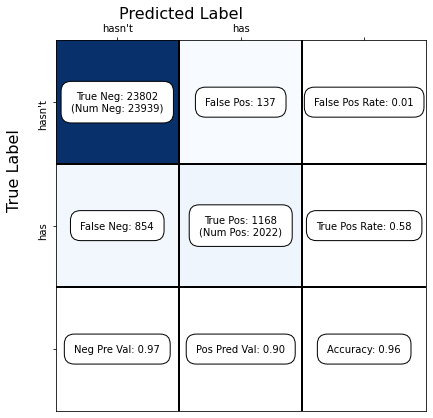

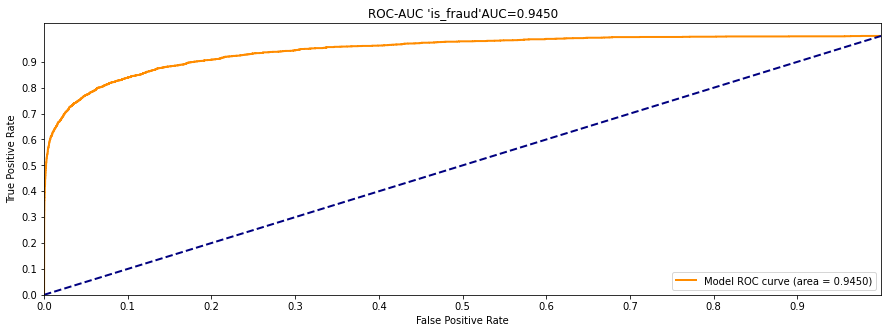

<Figure size 432x288 with 0 Axes>

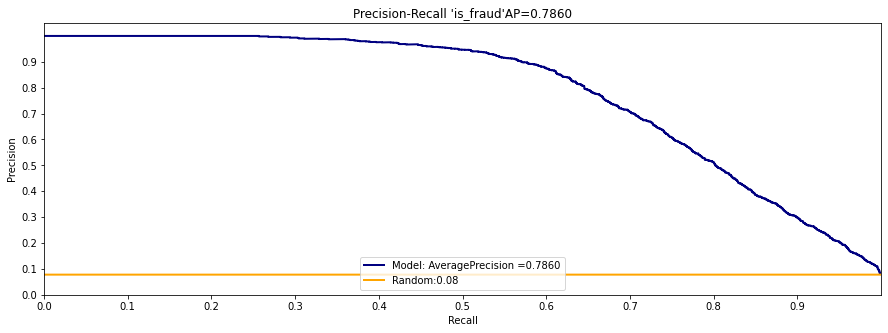

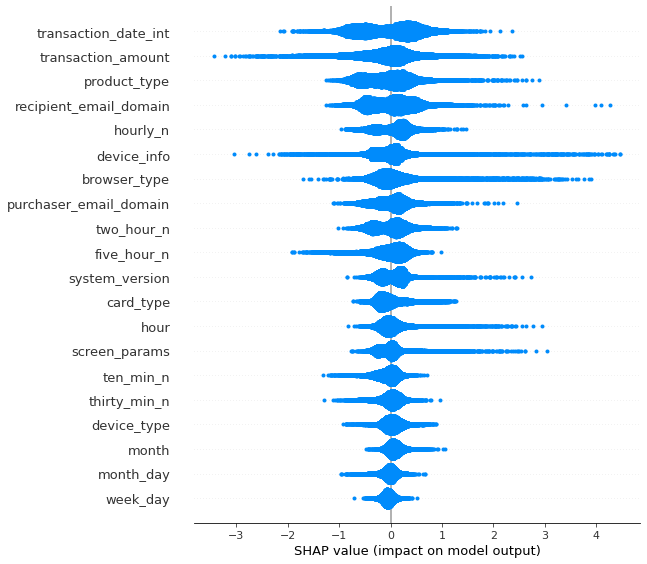

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Metrics:   ROC-AUC  Precision   Recall        F1  Accuracy   logloss  \
is_fraud  0.941591   0.892864  0.56762  0.694027  0.960586  0.122585   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0         0.92125       2.719945  


FixedFormatter should only be used together with FixedLocator


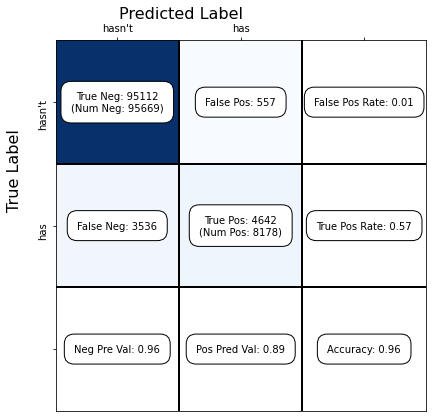

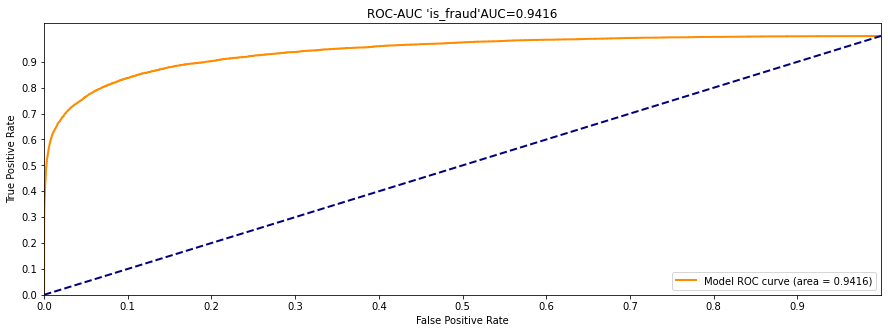

<Figure size 432x288 with 0 Axes>

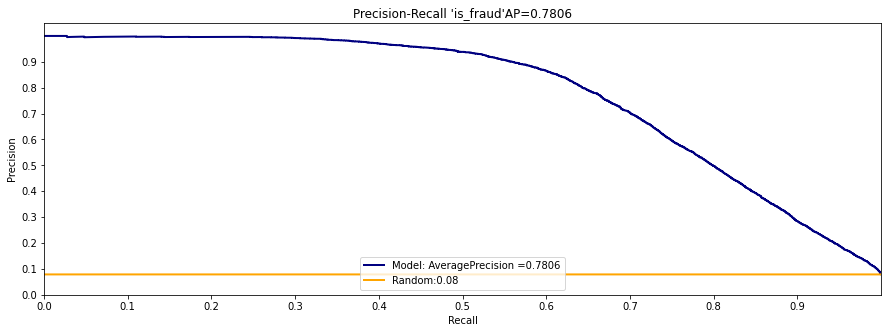

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
FixedFormatter should only be used together with FixedLocator


Metrics:   ROC-AUC  Precision    Recall        F1  Accuracy  logloss  \
is_fraud  0.954429   0.911488  0.552511  0.687989  0.961955  0.11209   

Metrics:  Dummy Precision  Dummy F1  Dummy Accuracy  Dummy logloss  
is_fraud              0.0       0.0        0.924084       2.622062  


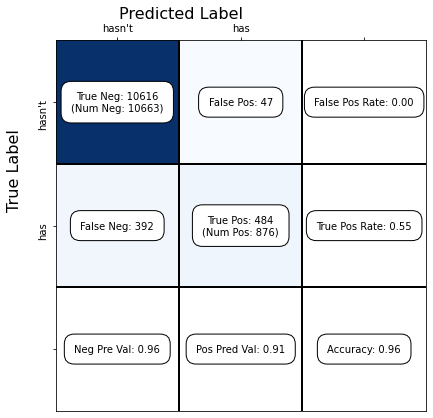

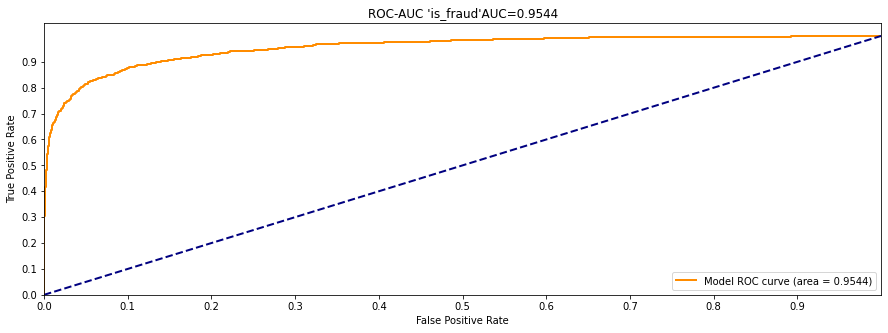

<Figure size 432x288 with 0 Axes>

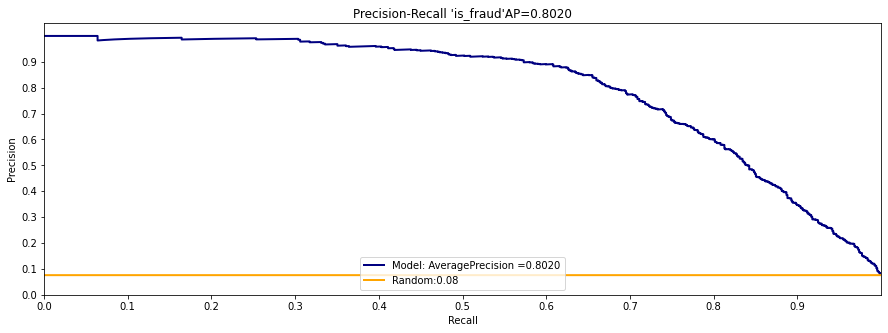

'DONE'

In [88]:
model_params_cat = {
    'loss_function' : 'Logloss',
    'thread_count': 25,
    'learning_rate': 0.1,
    'verbose': 1,
    'cat_features': cat_features
}

fit_params = {
    'num_boost_round': 6000,
    'early_stopping_rounds': 100, 
    'verbose_eval': 1 
}

kfold_params = {
    'shuffle': True,
    'n_splits': 4,
    'random_state': 23
}

label_name = 'is_fraud'
id_col = 'transaction_id'

path_to_save_results_= 'outputs/'
booster = Booster(CatBooster(),
                  model_params_cat,
                  fit_params,
                  kfold_params, 
                  label_name, 
                  id_col,
                  train_df = train,
                  val_df = valid, 
                  test_df = test.drop('is_fraud',axis=1),
                  refit_flag= True,
                  label_df = None,
                  print_params={'Yes!'},
                  path_to_save_model  = path_to_save_results_,
                  path_to_save_results= path_to_save_results_,
                  #weight = weights 
                 )

                  
booster.run()

In [89]:
pd.read_csv('outputs/pivot_models_data.csv')

,learn,validation_0,validation_1,validation_2,ROC-AUC,Precision,Recall,F1,Accuracy,logloss,Dummy Precision,Dummy F1,Dummy Accuracy,Dummy logloss
0,0.057629,0.038283,0.116292,0.121636,0.943408,0.902098,0.567449,0.696670,0.961058,0.121636,0.0,0.0,0.921193,2.721914
1,0.063415,0.043638,0.119922,0.119137,0.941946,0.893487,0.574951,0.699670,0.961444,0.119137,0.0,0.0,0.921886,2.697968
2,0.085469,0.054849,0.120560,0.130157,0.936574,0.880952,0.550913,0.677896,0.958016,0.130157,0.0,0.0,0.919806,2.769807
3,0.046357,0.031613,0.114763,0.119409,0.945002,0.895019,0.577646,0.702134,0.961827,0.119409,0.0,0.0,0.922114,2.690089
4,0.045323,0.031141,0.114669,0.119518,0.954429,0.911488,0.552511,0.687989,0.961955,0.112090,0.0,0.0,0.924084,2.622062
